In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ADANIPORTS_Stocks.csv
/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ADANIPOWER_Stocks.csv
/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ADANITRANS_Stocks.csv
/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ADANIGREEN_Stocks.csv
/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ADANIENT_stocks.csv
/kaggle/input/nse-stocks-datasets-adani-group-of-companies/AWL_Stocks.csv
/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ATGL_Stocks.csv


In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import style

In [4]:
import random

**Reading the data**

In [5]:
df1=pd.read_csv("ADANIENT_stocks.csv")
df2=pd.read_csv("ADANIGREEN_Stocks.csv")
df3=pd.read_csv("/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ADANIPORTS_Stocks.csv")
df4=pd.read_csv("/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ADANIPOWER_Stocks.csv")
df5=pd.read_csv("/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ADANITRANS_Stocks.csv")
df6=pd.read_csv("/kaggle/input/nse-stocks-datasets-adani-group-of-companies/ATGL_Stocks.csv")
df7=pd.read_csv("/kaggle/input/nse-stocks-datasets-adani-group-of-companies/AWL_Stocks.csv")

In [6]:
df1.head()

Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  23-Mar-2023      EQ  1,794.00  1,834.00  1,780.00     1,815.40  1,800.00   
1  22-Mar-2023      EQ  1,834.00  1,850.00  1,806.15     1,824.25  1,809.35   
2  21-Mar-2023      EQ  1,836.95  1,861.00  1,804.95     1,804.95  1,821.50   
3  20-Mar-2023      EQ  1,837.00  1,849.95  1,777.40     1,876.55  1,812.00   
4  17-Mar-2023      EQ  1,901.00  1,918.85  1,845.00     1,843.80  1,874.00   

     close      vwap     52W H     52W L   VOLUME              VALUE   \
0  1,794.00  1,806.17  4,190.00  1,017.45  4108804   7,421,203,031.00   
1  1,815.40  1,825.77  4,190.00  1,017.45  3248124   5,930,335,770.35   
2  1,824.25  1,829.30  4,190.00  1,017.45  4094018   7,489,199,702.80   
3  1,804.95  1,805.76  4,190.00  1,017.45  5168139   9,332,429,725.15   
4  1,876.55  1,870.80  4,190.00  1,017.45  5969594  11,167,944,229.35   

   No of trades   
0         169920  
1         130781  
2         158108  
3         227261  
4         263971

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           57 non-null     object
 1   series         57 non-null     object
 2   OPEN           57 non-null     object
 3   HIGH           57 non-null     object
 4   LOW            57 non-null     object
 5   PREV. CLOSE    57 non-null     object
 6   ltp            57 non-null     object
 7   close          57 non-null     object
 8   vwap           57 non-null     object
 9   52W H          57 non-null     object
 10  52W L          57 non-null     object
 11  VOLUME         57 non-null     int64 
 12  VALUE          57 non-null     object
 13  No of trades   57 non-null     int64 
dtypes: int64(2), object(12)
memory usage: 6.4+ KB


Setting Company Name as Index and changing the Datatype of Date column to 'datetime64'

In [8]:
def set_ind(df,cmp_name):
    df[df.columns[0]] = df[df.columns[0]].apply(pd.to_datetime)
    df['Company']=cmp_name
    df.set_index('Company',inplace=True)

In [9]:
set_ind(df1,'ADANI ENTERPRISES')
set_ind(df2,'ADANI GREEN')
set_ind(df3,'ADANI PORTS')
set_ind(df4,'ADANI POWER')
set_ind(df5,'ADANI TRANSMISSION')
set_ind(df6,'ADANI TOTAL GAS LIMITED')
set_ind(df7,'ADANI WILMAR')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, ADANI ENTERPRISES to ADANI ENTERPRISES
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           57 non-null     datetime64[ns]
 1   series         57 non-null     object        
 2   OPEN           57 non-null     object        
 3   HIGH           57 non-null     object        
 4   LOW            57 non-null     object        
 5   PREV. CLOSE    57 non-null     object        
 6   ltp            57 non-null     object        
 7   close          57 non-null     object        
 8   vwap           57 non-null     object        
 9   52W H          57 non-null     object        
 10  52W L          57 non-null     object        
 11  VOLUME         57 non-null     int64         
 12  VALUE          57 non-null     object        
 13  No of trades   57 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(11)
memory 

**Renaming the columns**

In [11]:
df1.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [12]:
dict={}
for i in df1.columns:
    dict[i]=i[:-1]

In [13]:
dict

{'Date ': 'Date',
 'series ': 'series',
 'OPEN ': 'OPEN',
 'HIGH ': 'HIGH',
 'LOW ': 'LOW',
 'PREV. CLOSE ': 'PREV. CLOSE',
 'ltp ': 'ltp',
 'close ': 'close',
 'vwap ': 'vwap',
 '52W H ': '52W H',
 '52W L ': '52W L',
 'VOLUME ': 'VOLUME',
 'VALUE ': 'VALUE',
 'No of trades ': 'No of trades'}

In [14]:
def rename_col(df,dict):
    df.rename(columns = dict, inplace = True)

In [15]:
rename_col(df1,dict)
rename_col(df2,dict)
rename_col(df3,dict)
rename_col(df4,dict)
rename_col(df5,dict)
rename_col(df6,dict)
rename_col(df7,dict)


In [16]:
def convert_to_float(x):
    return float(x.replace(',',''))

In [17]:
dfs=[df1,df2,df3,df3,df4,df5,df6,df7]
for df in dfs:
    for col in df.columns[2:]:
        if df[col].dtype=='O':  # Check whether the column is object type or not
            df[col] = df[col].apply(convert_to_float)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, ADANI ENTERPRISES to ADANI ENTERPRISES
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          57 non-null     datetime64[ns]
 1   series        57 non-null     object        
 2   OPEN          57 non-null     float64       
 3   HIGH          57 non-null     float64       
 4   LOW           57 non-null     float64       
 5   PREV. CLOSE   57 non-null     float64       
 6   ltp           57 non-null     float64       
 7   close         57 non-null     float64       
 8   vwap          57 non-null     float64       
 9   52W H         57 non-null     float64       
 10  52W L         57 non-null     float64       
 11  VOLUME        57 non-null     int64         
 12  VALUE         57 non-null     float64       
 13  No of trades  57 non-null     int64         
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usag

In [19]:
df1.head()

Date series     OPEN     HIGH      LOW  PREV. CLOSE  \
Company                                                                       
ADANI ENTERPRISES 2023-03-23     EQ  1794.00  1834.00  1780.00      1815.40   
ADANI ENTERPRISES 2023-03-22     EQ  1834.00  1850.00  1806.15      1824.25   
ADANI ENTERPRISES 2023-03-21     EQ  1836.95  1861.00  1804.95      1804.95   
ADANI ENTERPRISES 2023-03-20     EQ  1837.00  1849.95  1777.40      1876.55   
ADANI ENTERPRISES 2023-03-17     EQ  1901.00  1918.85  1845.00      1843.80   

                       ltp    close     vwap   52W H    52W L   VOLUME  \
Company                                                                  
ADANI ENTERPRISES  1800.00  1794.00  1806.17  4190.0  1017.45  4108804   
ADANI ENTERPRISES  1809.35  1815.40  1825.77  4190.0  1017.45  3248124   
ADANI ENTERPRISES  1821.50  1824.25  1829.30  4190.0  1017.45  4094018   
ADANI ENTERPRISES  1812.00  1804.95  1805.76  4190.0  1017.45  5168139   
ADANI ENTERPRISES  1874.00  1876.55  1870.80  4190.0  1017.45  5969594   

                          VALUE  No of trades  
Company                                        
ADANI ENTERPRISES  7.421203e+09        169920  
ADANI ENTERPRISES  5.930336e+09        130781  
ADANI ENTERPRISES  7.489200e+09        158108  
ADANI ENTERPRISES  9.332430e+09        227261  
ADANI ENTERPRISES  1.116794e+10        263971

In [20]:
df2.head()

Date series    OPEN    HIGH     LOW  PREV. CLOSE     ltp  \
Company                                                                      
ADANI GREEN 2023-03-23     EQ  982.00  982.35  977.75       935.60  982.35   
ADANI GREEN 2023-03-22     EQ  923.00  935.60  923.00       891.05  935.60   
ADANI GREEN 2023-03-21     EQ  868.00  891.05  865.65       848.65  891.05   
ADANI GREEN 2023-03-20     EQ  797.95  853.30  775.45       816.25  845.55   
ADANI GREEN 2023-03-17     EQ  810.00  816.25  803.25       777.40  816.25   

              close    vwap   52W H  52W L   VOLUME         VALUE  \
Company                                                             
ADANI GREEN  982.35  982.08  3050.0  439.1  1170710  1.149730e+09   
ADANI GREEN  935.60  934.11  3050.0  439.1  1825044  1.704788e+09   
ADANI GREEN  891.05  884.84  3050.0  439.1  3819655  3.379776e+09   
ADANI GREEN  848.65  824.97  3050.0  439.1  6908589  5.699347e+09   
ADANI GREEN  816.25  815.39  3050.0  439.1  3378276  2.754599e+09   

             No of trades  
Company                    
ADANI GREEN         17250  
ADANI GREEN         21384  
ADANI GREEN         82541  
ADANI GREEN        193865  
ADANI GREEN         44161

In [21]:
df3.head()

Date series   OPEN    HIGH     LOW  PREV. CLOSE     ltp  \
Company                                                                     
ADANI PORTS 2023-03-23     EQ  655.0  667.35  652.05       657.15  653.50   
ADANI PORTS 2023-03-22     EQ  669.9  671.90  654.15       664.80  655.85   
ADANI PORTS 2023-03-21     EQ  671.5  674.40  661.20       666.75  665.50   
ADANI PORTS 2023-03-20     EQ  671.0  677.75  659.30       680.35  667.00   
ADANI PORTS 2023-03-17     EQ  688.5  691.75  671.30       679.60  681.00   

              close    vwap   52W H  52W L   VOLUME         VALUE  \
Company                                                             
ADANI PORTS  654.95  659.65  987.85  395.1  4491324  2.962684e+09   
ADANI PORTS  657.15  662.03  987.85  395.1  4457720  2.951154e+09   
ADANI PORTS  664.80  667.25  987.85  395.1  5011027  3.343588e+09   
ADANI PORTS  666.75  666.12  987.85  395.1  5250369  3.497373e+09   
ADANI PORTS  680.35  678.95  987.85  395.1  7625895  5.177624e+09   

             No of trades  
Company                    
ADANI PORTS         79446  
ADANI PORTS         78562  
ADANI PORTS         81539  
ADANI PORTS         94806  
ADANI PORTS        108111

In [22]:
df4.head()

Date series    OPEN   HIGH     LOW  PREV. CLOSE     ltp  \
Company                                                                     
ADANI POWER 2023-03-23     EQ  201.70  211.4  200.30       204.05  201.40   
ADANI POWER 2023-03-22     EQ  203.15  207.7  201.15       199.70  203.45   
ADANI POWER 2023-03-21     EQ  191.90  199.7  186.55       190.20  199.70   
ADANI POWER 2023-03-20     EQ  193.00  196.8  189.95       199.95  189.95   
ADANI POWER 2023-03-17     EQ  203.85  205.3  198.25       198.70  199.80   

              close    vwap  52W H  52W L    VOLUME         VALUE  \
Company                                                             
ADANI POWER  201.40  205.97  432.5  122.3  14688196  3.025263e+09   
ADANI POWER  204.05  204.60  432.5  122.3  10063003  2.058859e+09   
ADANI POWER  199.70  195.58  432.5  122.3  12141316  2.374588e+09   
ADANI POWER  190.20  191.89  432.5  122.3  12119227  2.325516e+09   
ADANI POWER  199.95  201.60  432.5  120.5  11391354  2.296483e+09   

             No of trades  
Company                    
ADANI POWER        118939  
ADANI POWER         88289  
ADANI POWER         90966  
ADANI POWER         98626  
ADANI POWER         89940

In [23]:
df5.head()

Date series     OPEN     HIGH      LOW  PREV. CLOSE  \
Company                                                                        
ADANI TRANSMISSION 2023-03-23     EQ  1038.00  1084.40  1022.10      1032.80   
ADANI TRANSMISSION 2023-03-22     EQ  1014.00  1044.00  1011.30      1006.10   
ADANI TRANSMISSION 2023-03-21     EQ  1019.95  1037.70   972.30      1009.10   
ADANI TRANSMISSION 2023-03-20     EQ   986.10  1054.30   971.25      1022.35   
ADANI TRANSMISSION 2023-03-17     EQ   994.30  1022.35   988.00       973.70   

                        ltp    close     vwap    52W H  52W L   VOLUME  \
Company                                                                  
ADANI TRANSMISSION  1084.40  1084.40  1075.37  4236.75  631.5  1814692   
ADANI TRANSMISSION  1035.25  1032.80  1030.08  4236.75  631.5  1714719   
ADANI TRANSMISSION  1004.40  1006.10  1015.39  4236.75  631.5  2265181   
ADANI TRANSMISSION   998.80  1009.10  1006.12  4236.75  631.5  2491229   
ADANI TRANSMISSION  1022.35  1022.35  1014.44  4236.75  631.5  2455413   

                           VALUE  No of trades  
Company                                         
ADANI TRANSMISSION  1.951472e+09         38184  
ADANI TRANSMISSION  1.766304e+09         54719  
ADANI TRANSMISSION  2.300038e+09         69510  
ADANI TRANSMISSION  2.506484e+09         80205  
ADANI TRANSMISSION  2.490861e+09         64193

In [24]:
df6.head()

Date series   OPEN    HIGH     LOW  PREV. CLOSE  \
Company                                                                         
ADANI TOTAL GAS LIMITED 2023-03-23     EQ  955.0  982.05  954.05       935.30   
ADANI TOTAL GAS LIMITED 2023-03-22     EQ  906.7  935.30  905.00       890.80   
ADANI TOTAL GAS LIMITED 2023-03-21     EQ  853.0  895.50  816.75       852.90   
ADANI TOTAL GAS LIMITED 2023-03-20     EQ  879.0  879.00  852.90       897.75   
ADANI TOTAL GAS LIMITED 2023-03-17     EQ  911.8  925.00  890.00       888.40   

                            ltp   close    vwap   52W H  52W L   VOLUME  \
Company                                                                   
ADANI TOTAL GAS LIMITED  982.05  982.05  978.41  4000.0  650.0  1440643   
ADANI TOTAL GAS LIMITED  935.30  935.30  930.89  4000.0  650.0  1938364   
ADANI TOTAL GAS LIMITED  893.90  890.80  872.59  4000.0  650.0  2290508   
ADANI TOTAL GAS LIMITED  852.90  852.90  860.78  4000.0  650.0  1126835   
ADANI TOTAL GAS LIMITED  896.95  897.75  903.30  4000.0  650.0  1412300   

                                VALUE  No of trades  
Company                                              
ADANI TOTAL GAS LIMITED  1.409535e+09         25998  
ADANI TOTAL GAS LIMITED  1.804399e+09         42201  
ADANI TOTAL GAS LIMITED  1.998671e+09         70169  
ADANI TOTAL GAS LIMITED  9.699624e+08         32981  
ADANI TOTAL GAS LIMITED  1.275733e+09         47712

In [25]:
df7.head()

Date series    OPEN   HIGH     LOW  PREV. CLOSE     ltp  \
Company                                                                      
ADANI WILMAR 2023-03-23     EQ  418.85  435.5  415.00       419.80  421.25   
ADANI WILMAR 2023-03-22     EQ  420.75  428.4  418.05       418.75  419.00   
ADANI WILMAR 2023-03-21     EQ  419.75  425.8  410.25       413.85  418.50   
ADANI WILMAR 2023-03-20     EQ  423.00  423.0  409.30       427.65  413.75   
ADANI WILMAR 2023-03-17     EQ  429.40  439.0  423.90       420.65  427.50   

               close    vwap  52W H   52W L   VOLUME         VALUE  \
Company                                                              
ADANI WILMAR  421.30  426.60  878.0  327.25  3167155  1.351099e+09   
ADANI WILMAR  419.80  422.42  878.0  327.25  1894070  8.001021e+08   
ADANI WILMAR  418.75  418.47  878.0  327.25  2787019  1.166273e+09   
ADANI WILMAR  413.85  415.58  878.0  327.25  2158387  8.969883e+08   
ADANI WILMAR  427.65  429.02  878.0  327.25  2423287  1.039650e+09   

              No of trades  
Company                     
ADANI WILMAR         49950  
ADANI WILMAR         39793  
ADANI WILMAR         45072  
ADANI WILMAR         41974  
ADANI WILMAR         41508

**Exploratory Data Analysis**

Analysing Volume of Stock Traded

In [26]:
def volume_analysis(df,cmp_name):
    plt.figure(figsize=(10,7))
    plt.plot(df['Date'],df['VOLUME'],c='orange')
    plt.title('Volume Of '+cmp_name+' Stock Prices')
    plt.ylabel('Volume')
    plt.show()

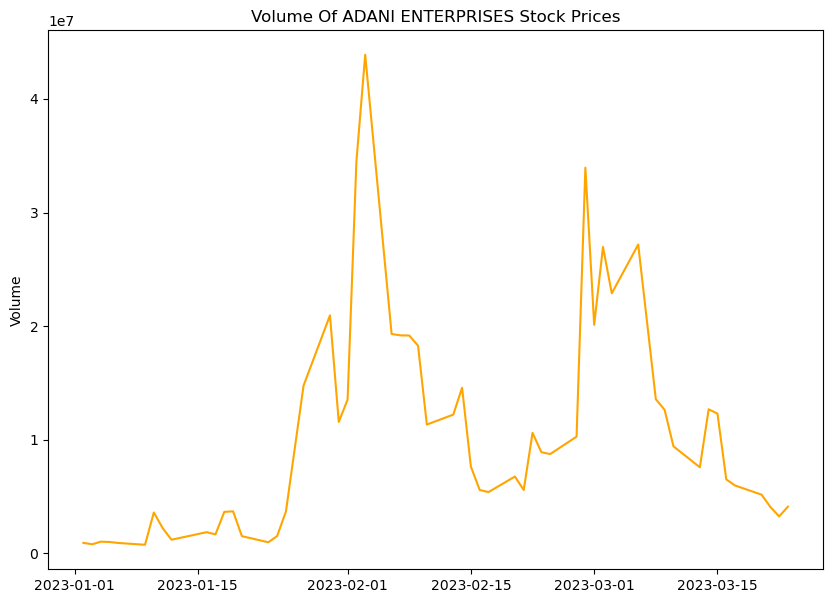

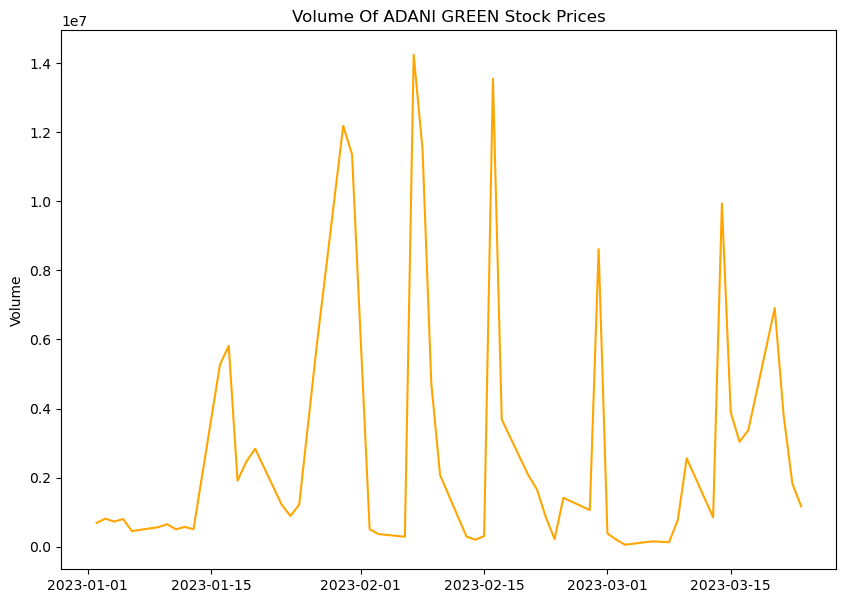

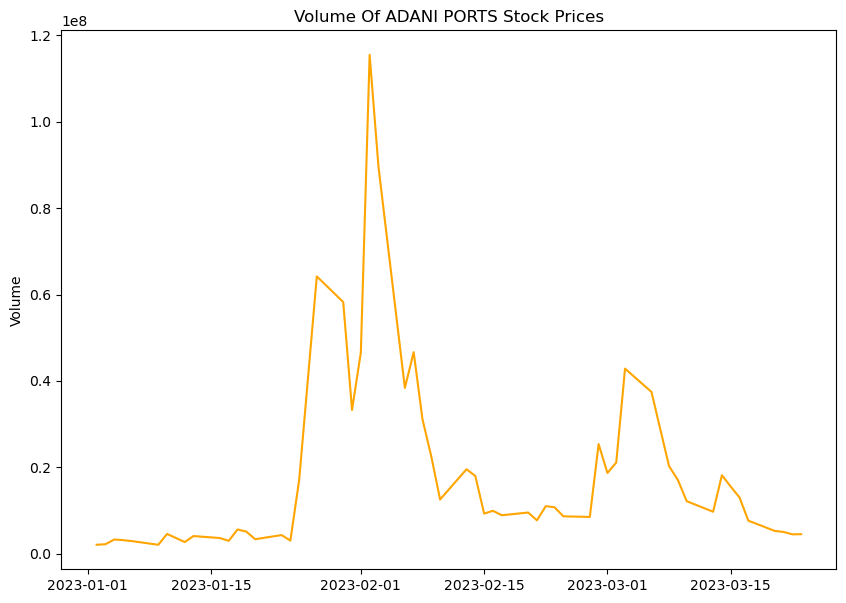

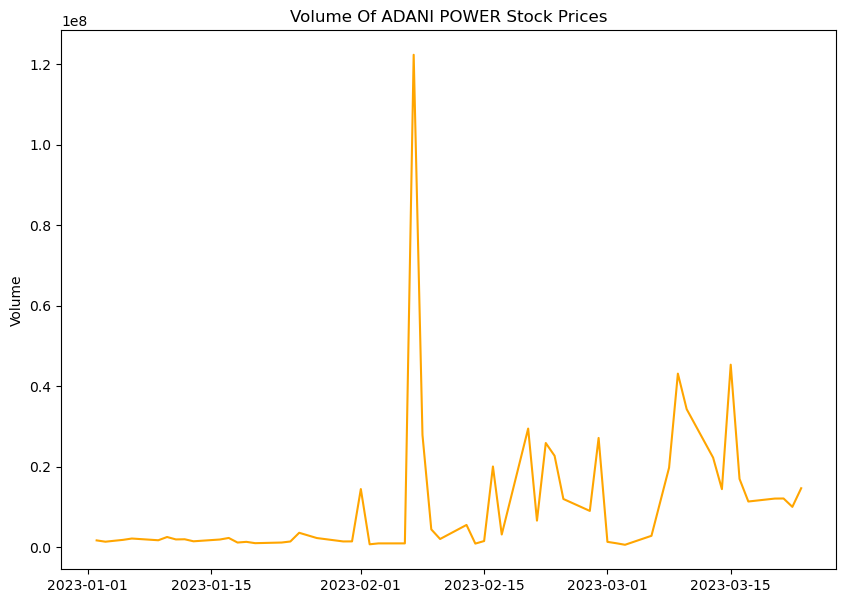

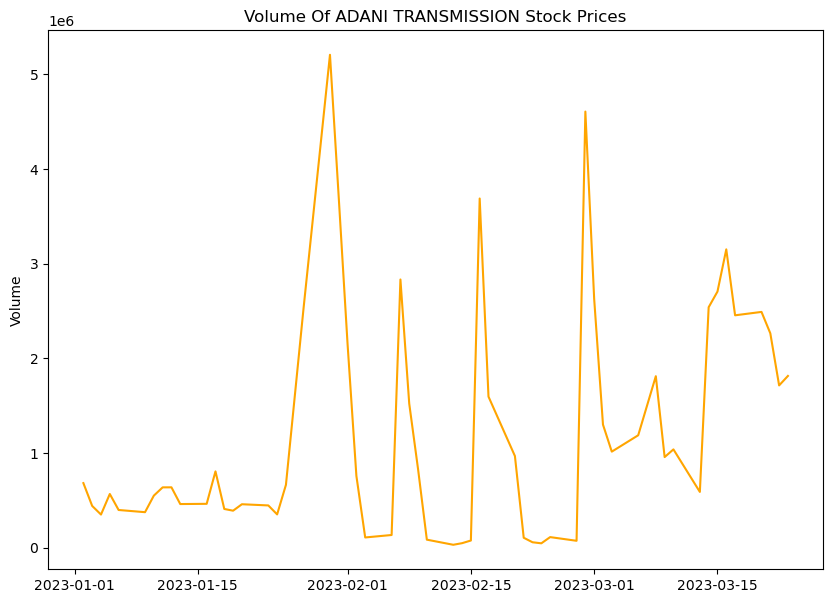

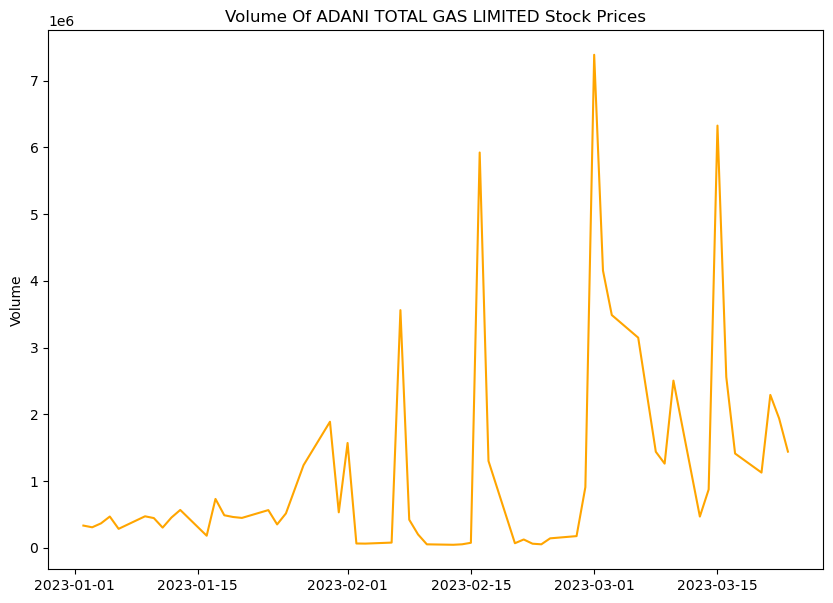

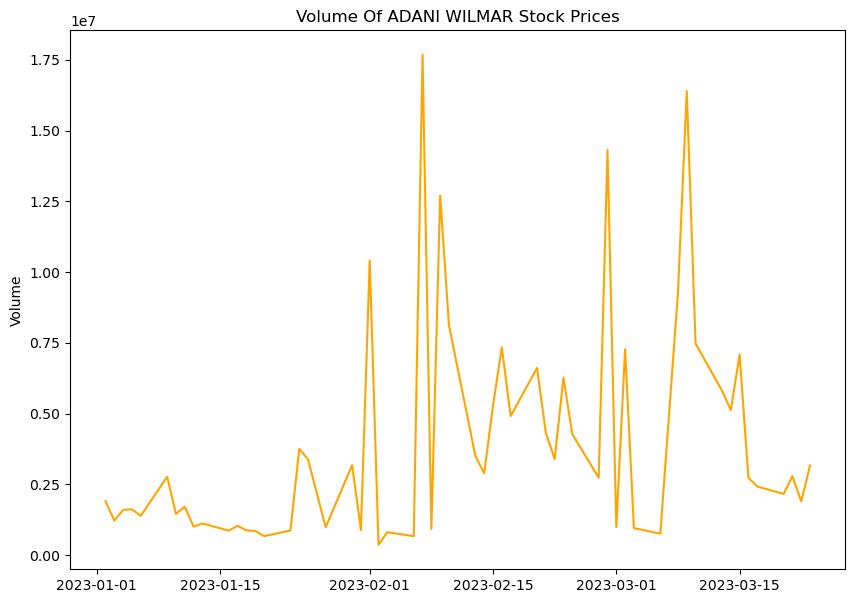

In [27]:
volume_analysis(df1,'ADANI ENTERPRISES')
volume_analysis(df2,'ADANI GREEN')
volume_analysis(df3,'ADANI PORTS')
volume_analysis(df4,'ADANI POWER')
volume_analysis(df5,'ADANI TRANSMISSION')
volume_analysis(df6,'ADANI TOTAL GAS LIMITED')
volume_analysis(df7,'ADANI WILMAR')

Analysing the Prices of stocks of ADANI Group Companies

In [28]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [29]:
def price(df,cmp_name,price_type):
    
    style_name='fivethirtyeight'
    plt.figure(figsize=(16,8))
   
    dict={'OPEN':'orange','HIGH':'blue','LOW':'purple','close':'green','PREV. CLOSE':'red','ltp':'orange','vwap':'green','52W H':'blue','52W L':'pink'}   
    
    plt.plot(df['Date'],df[price_type],c=dict[price_type])
    plt.ylabel(price_type.upper())
    plt.xlabel('Date')
    plt.title(price_type.upper()+" Price of "+cmp_name)
    plt.show()





Showing stock trends for OPEN price






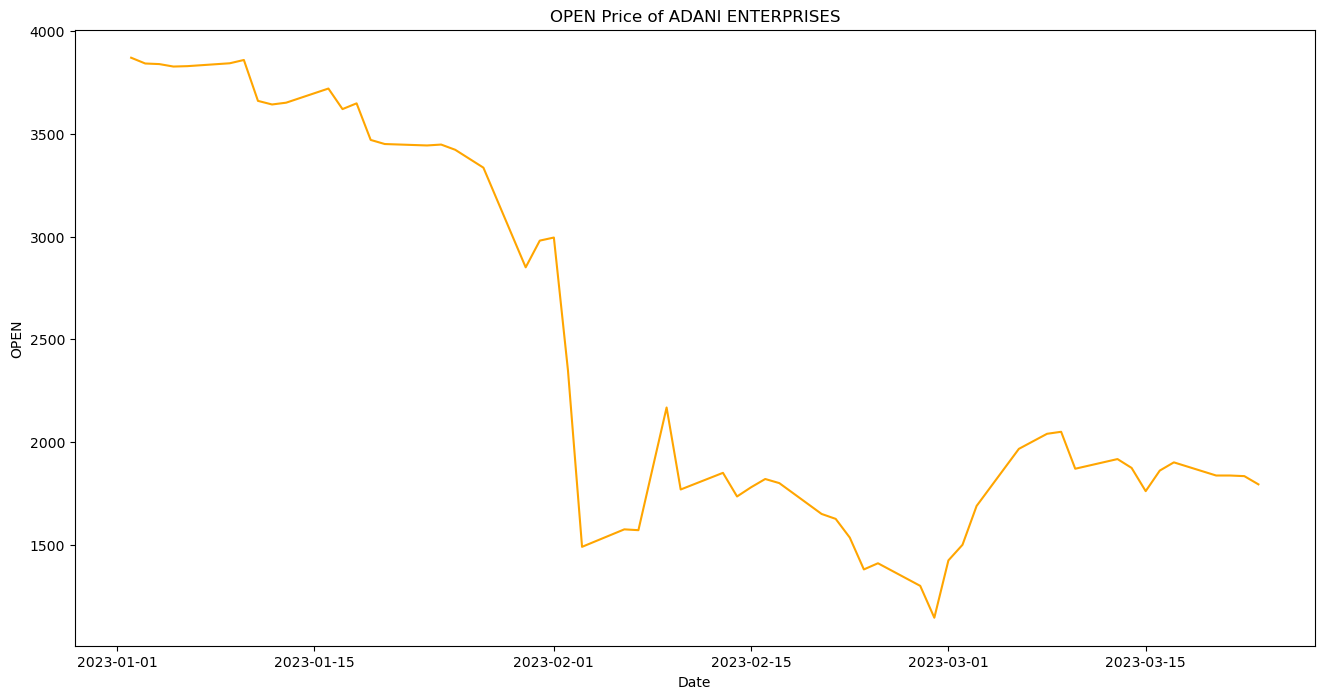

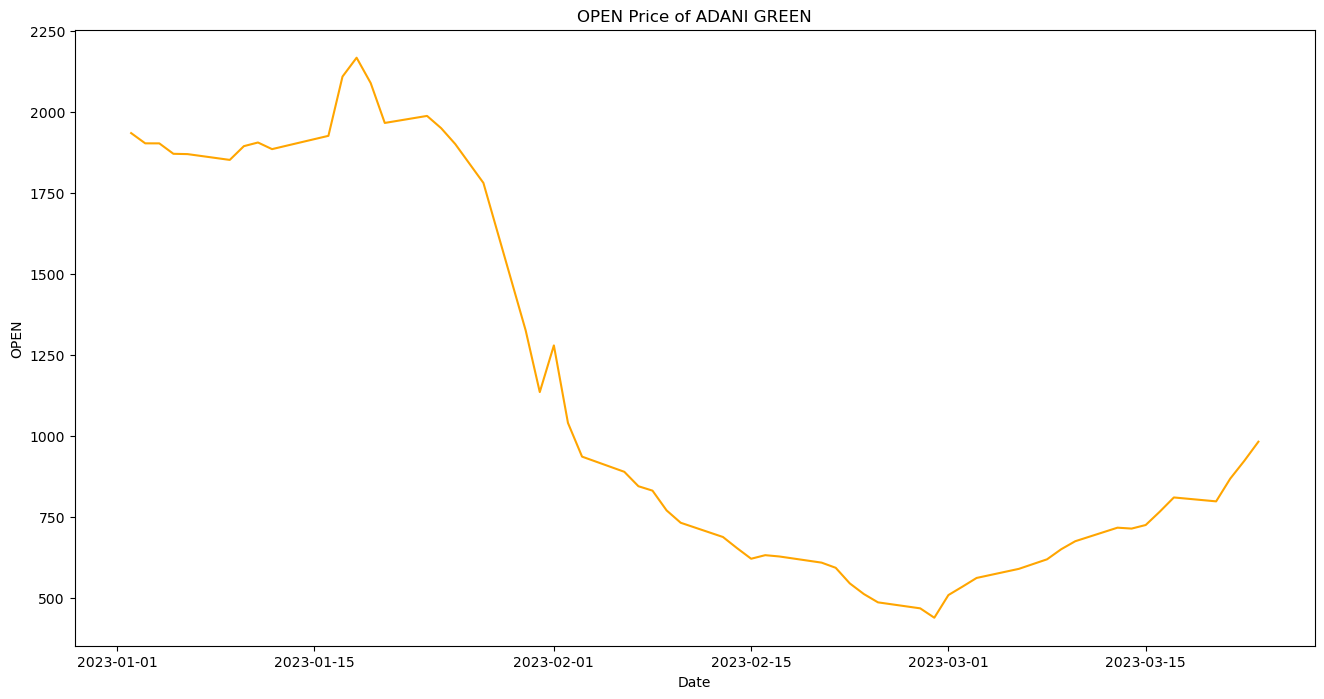

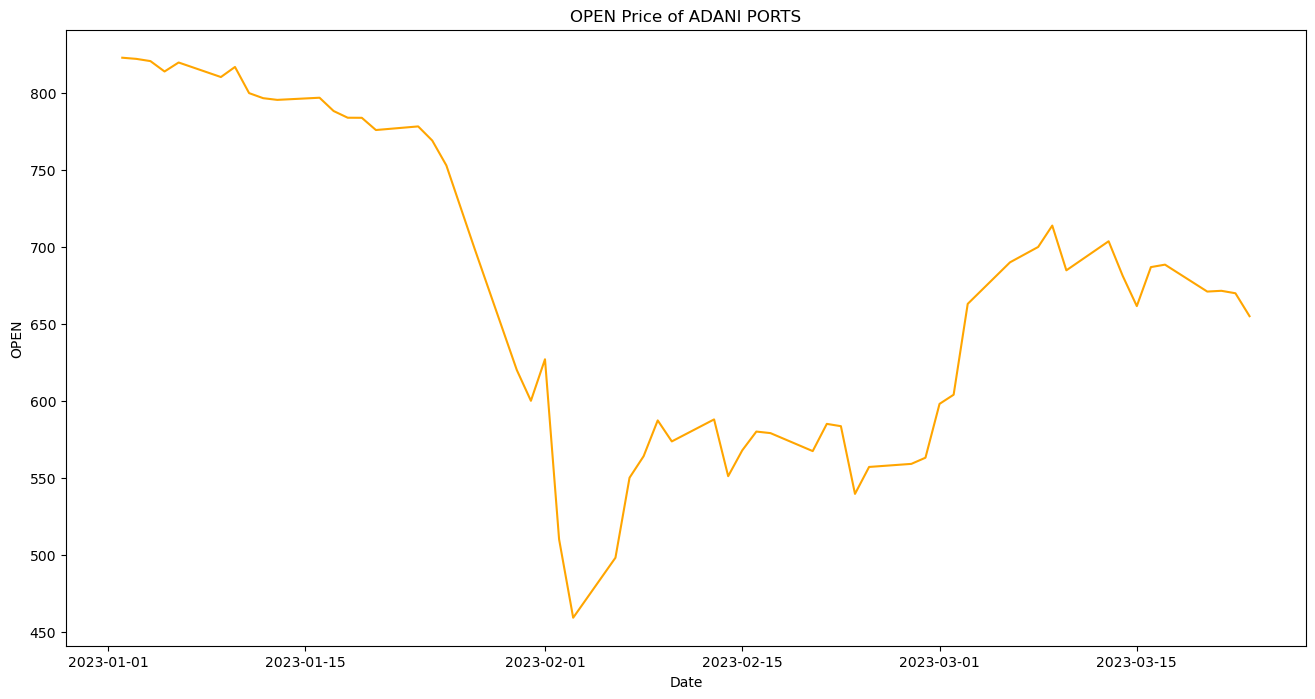

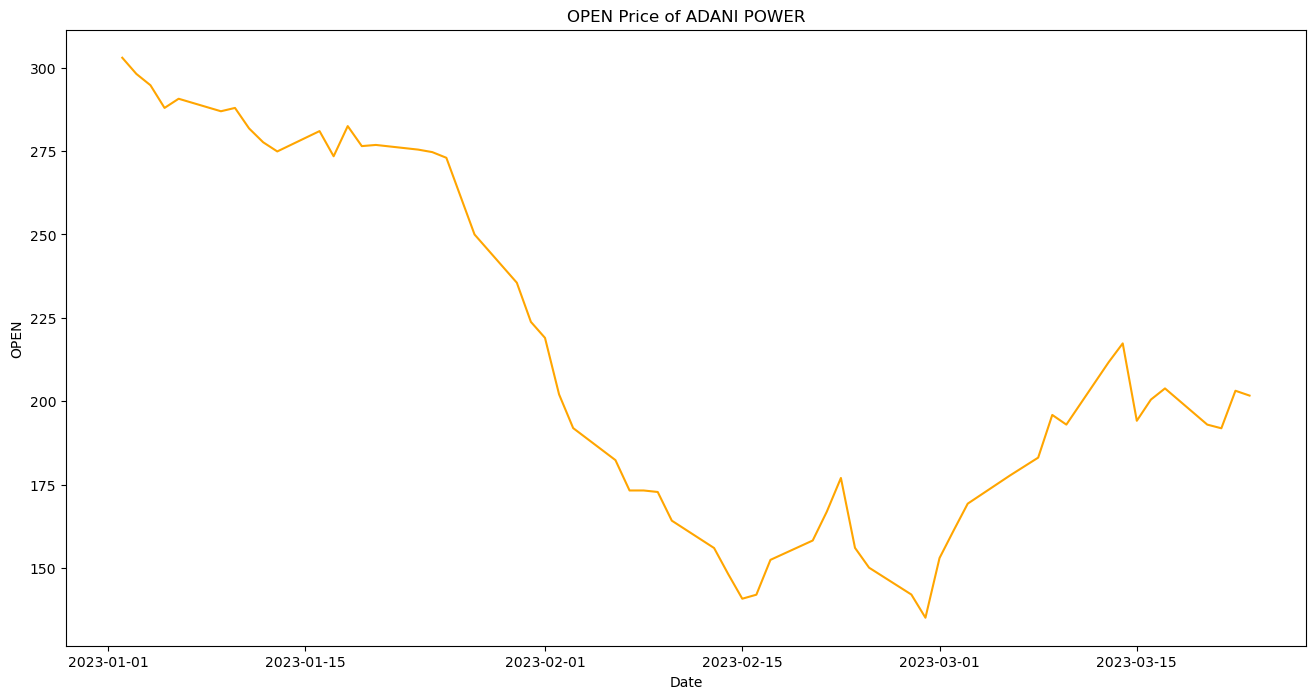

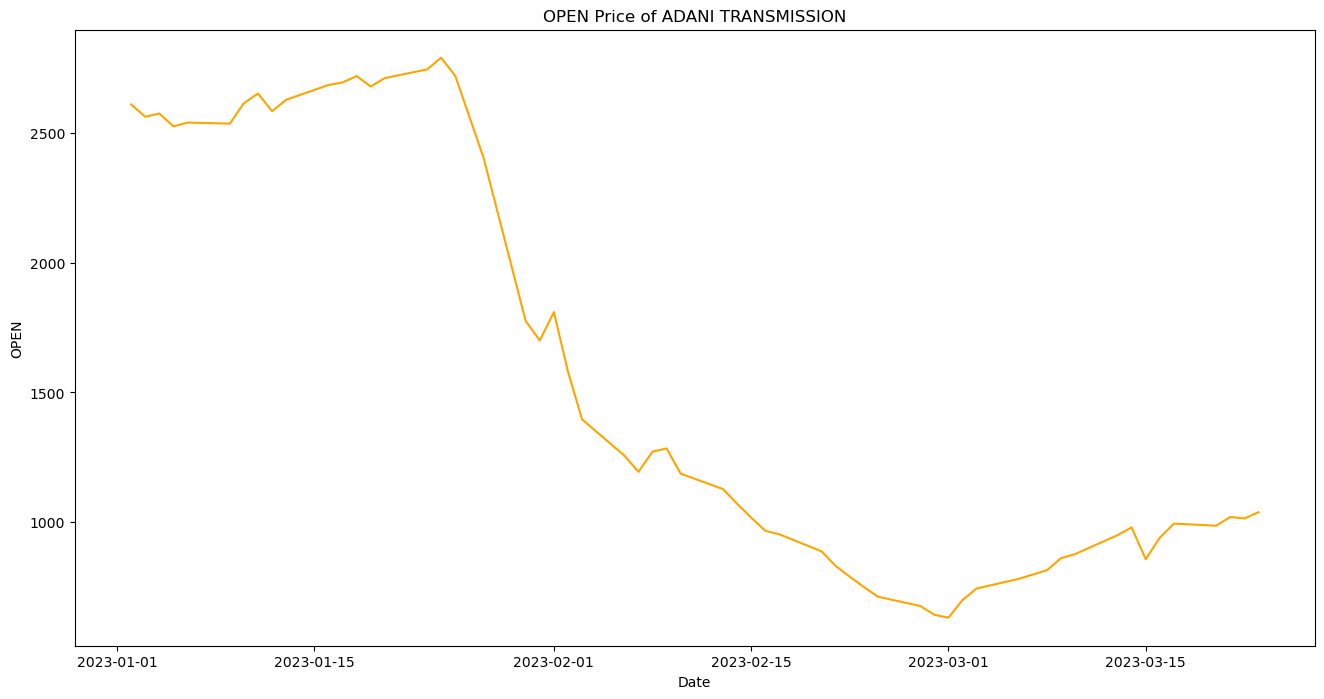

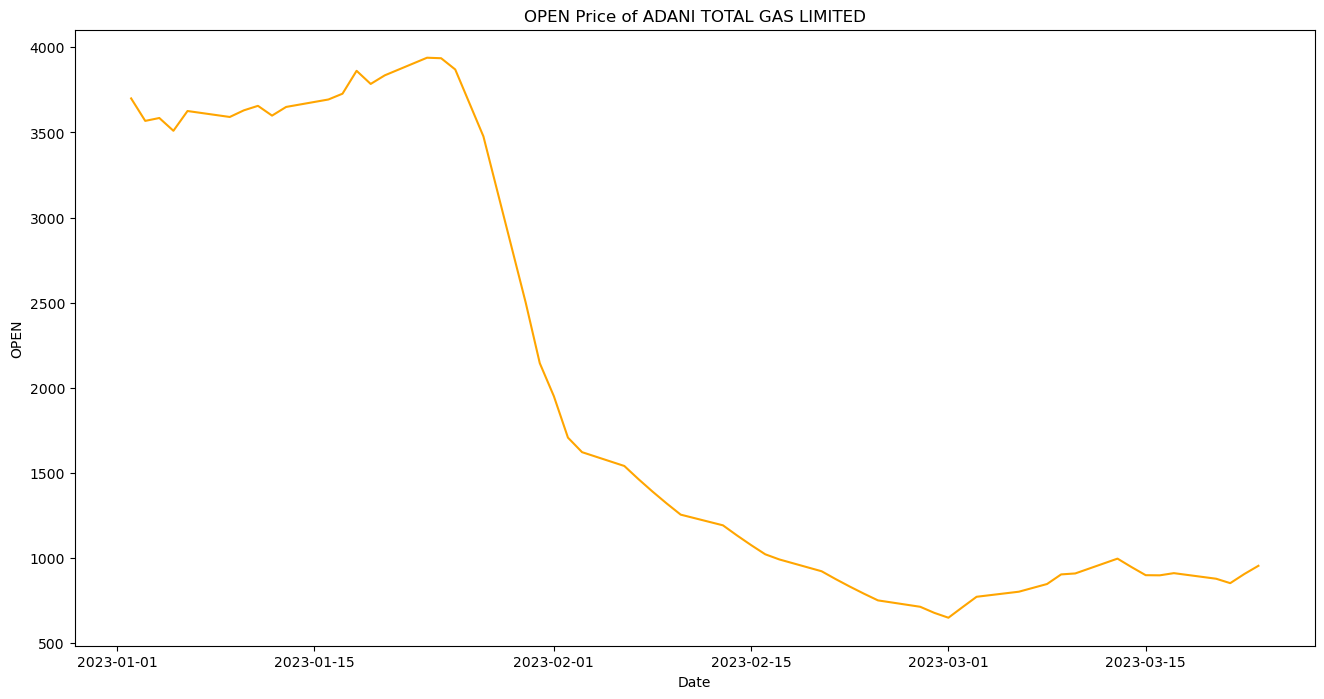

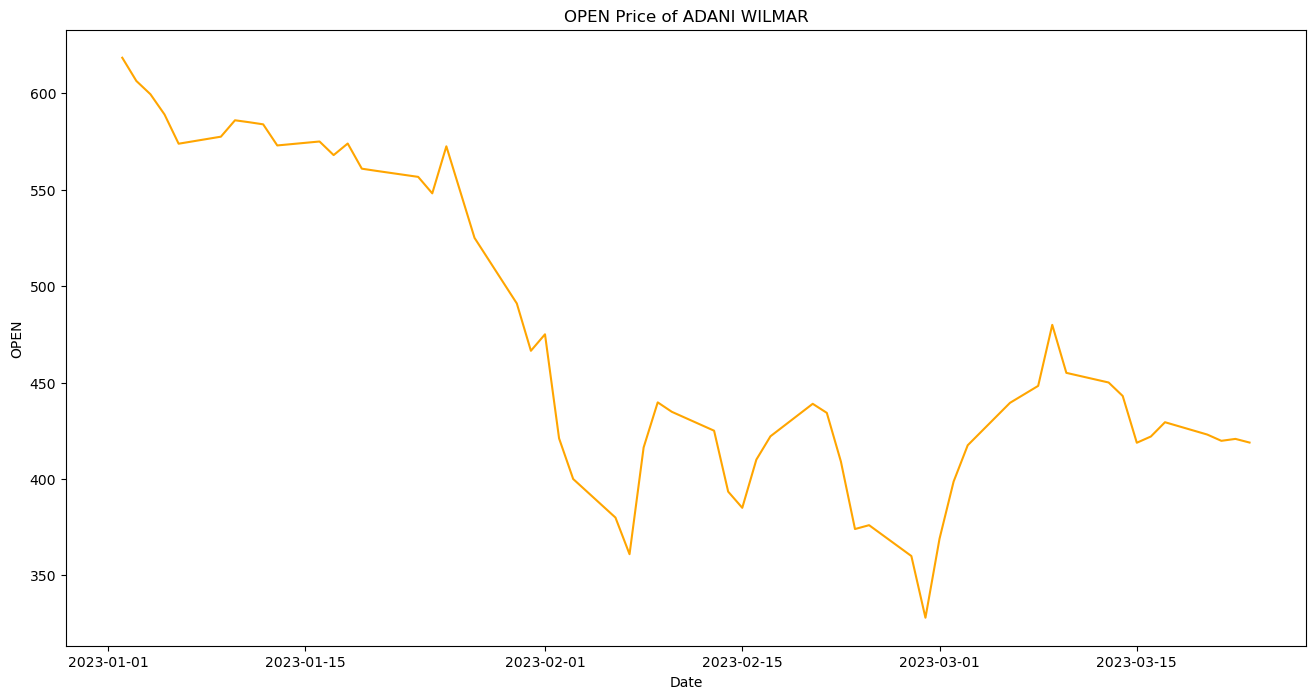





Showing stock trends for HIGH price






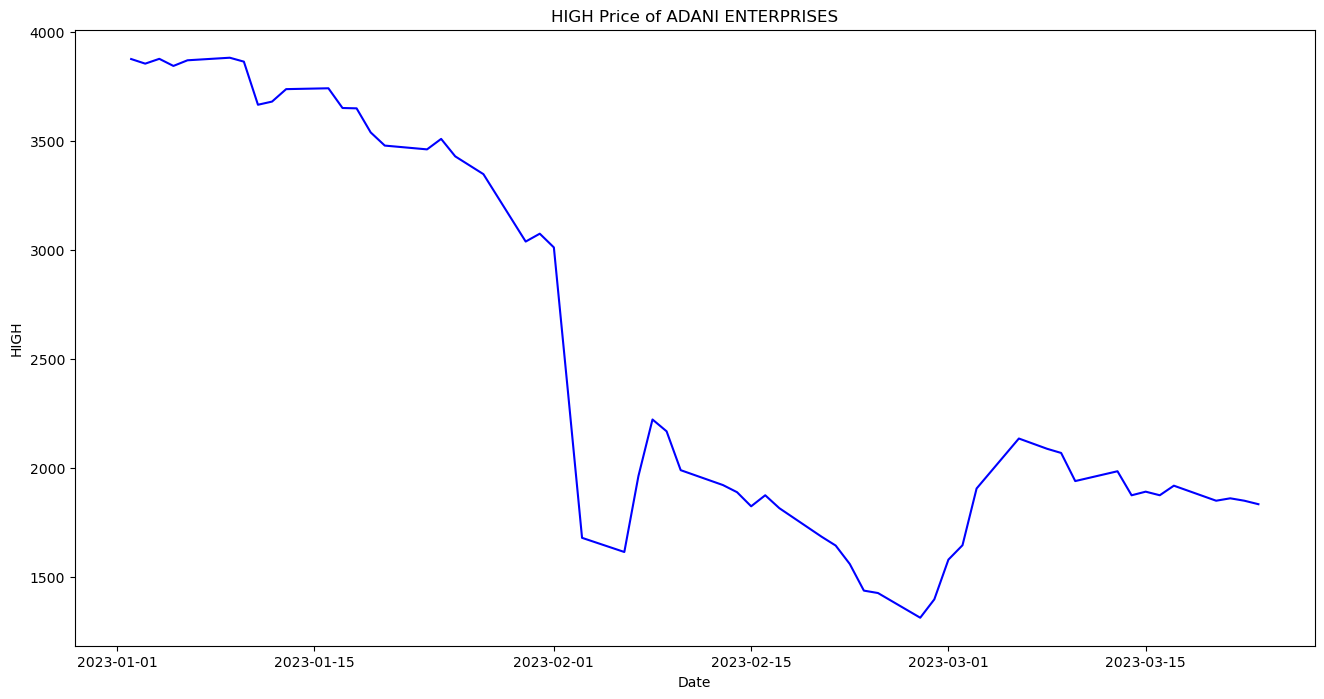

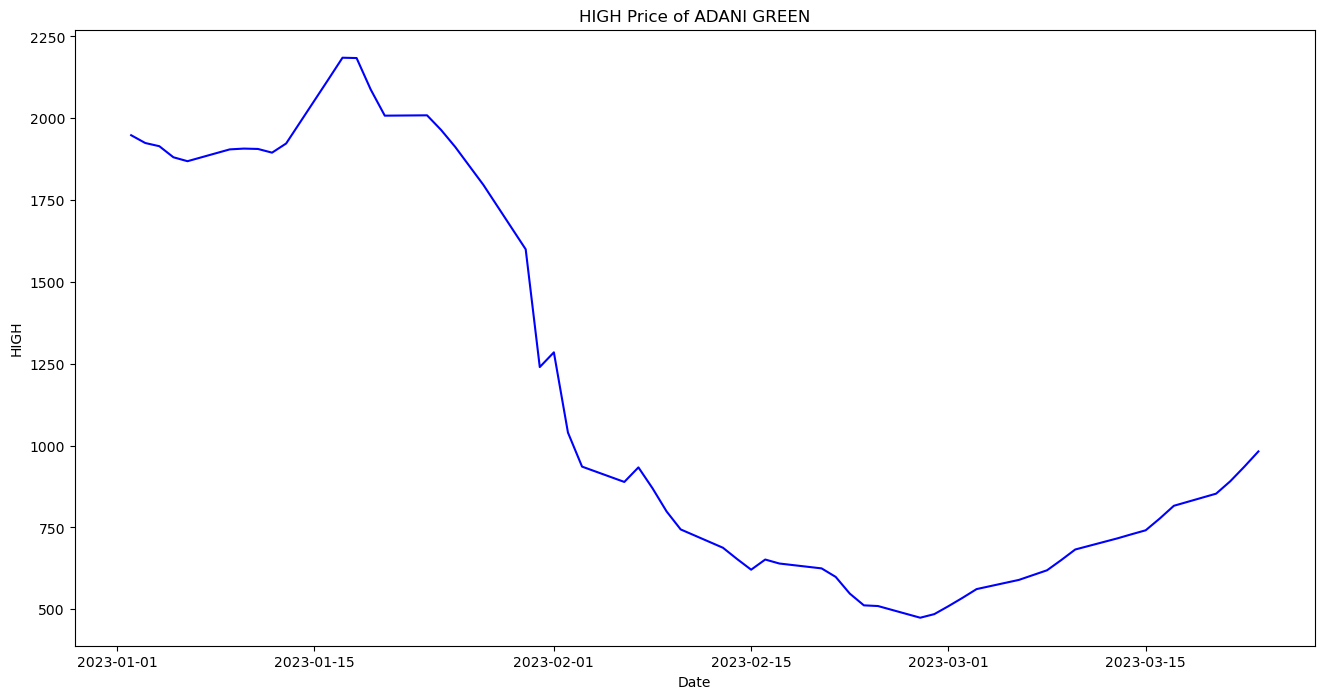

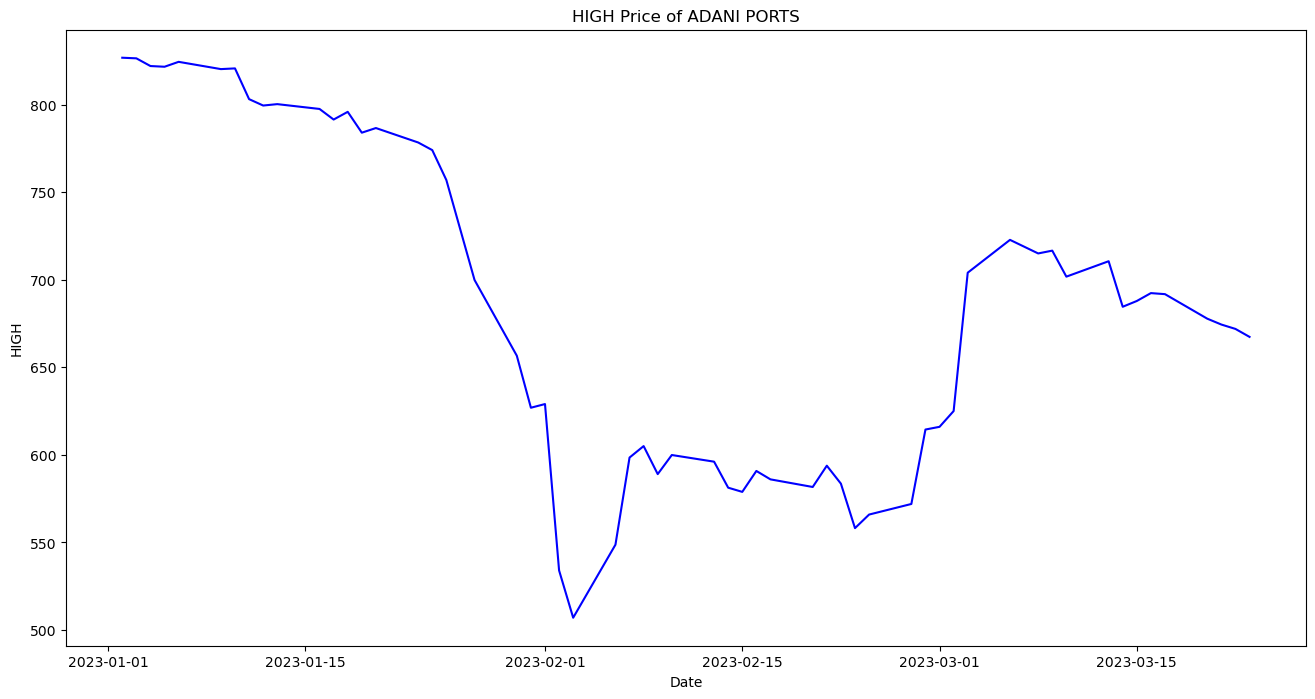

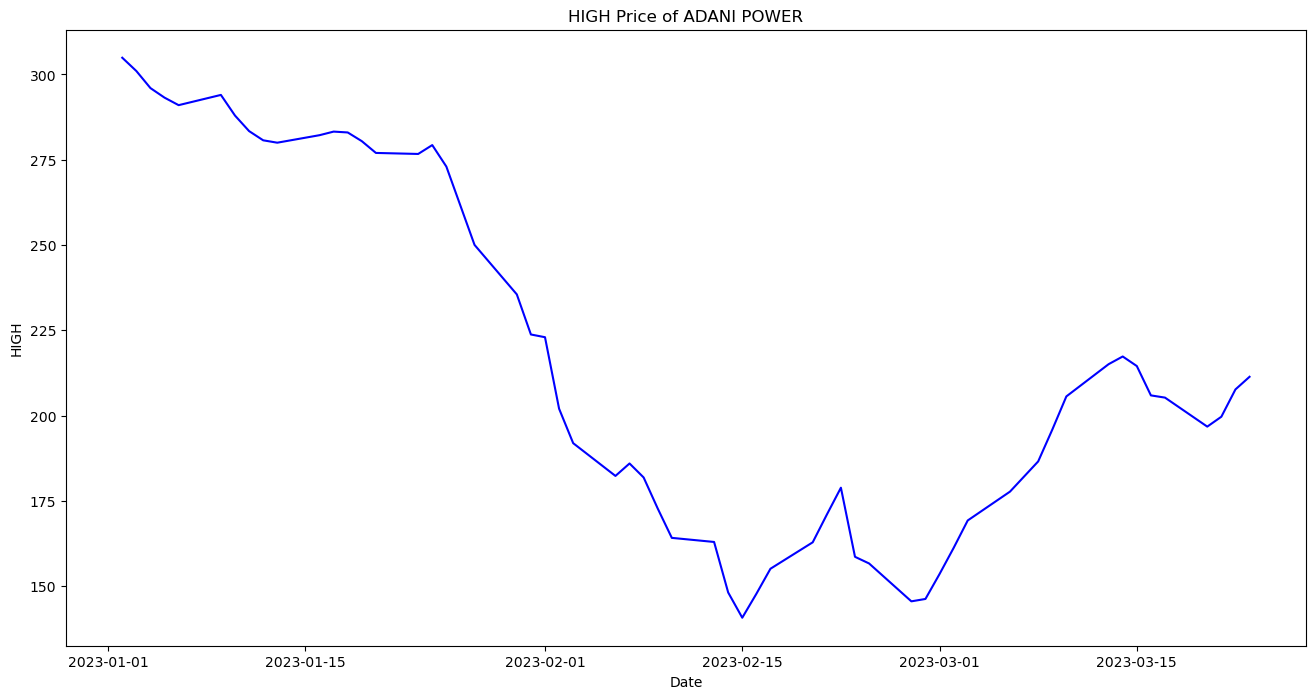

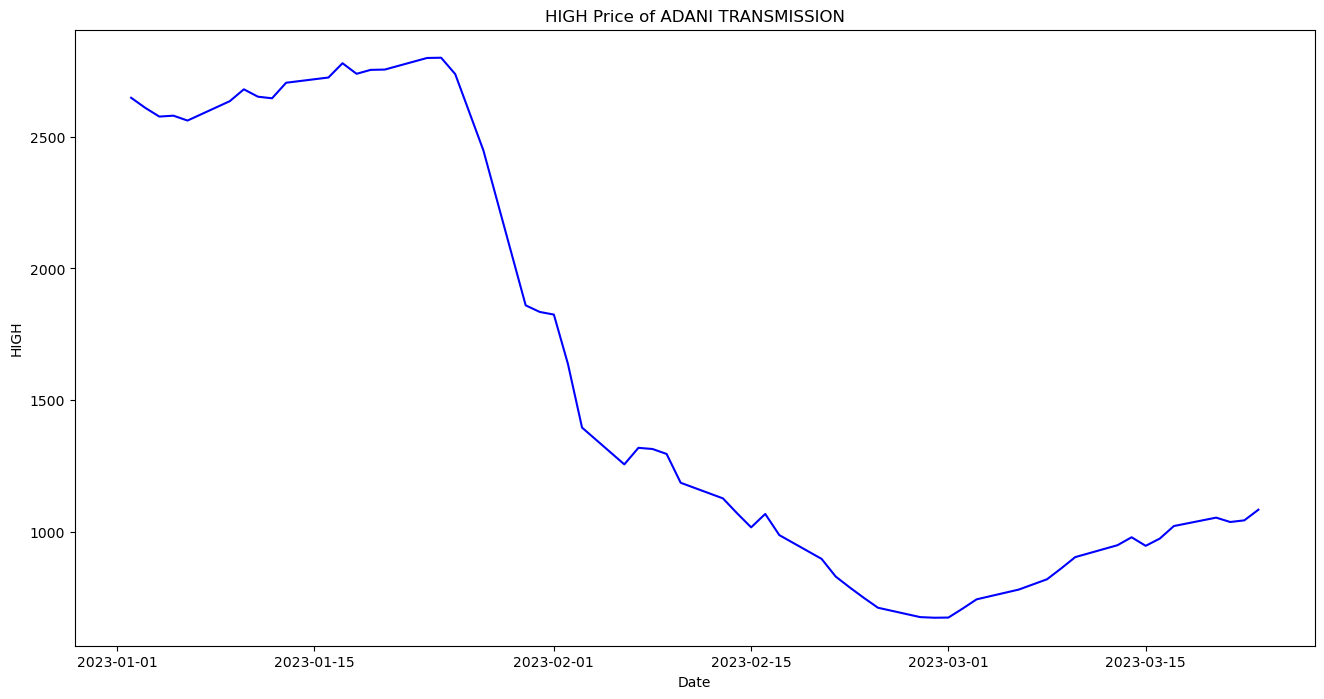

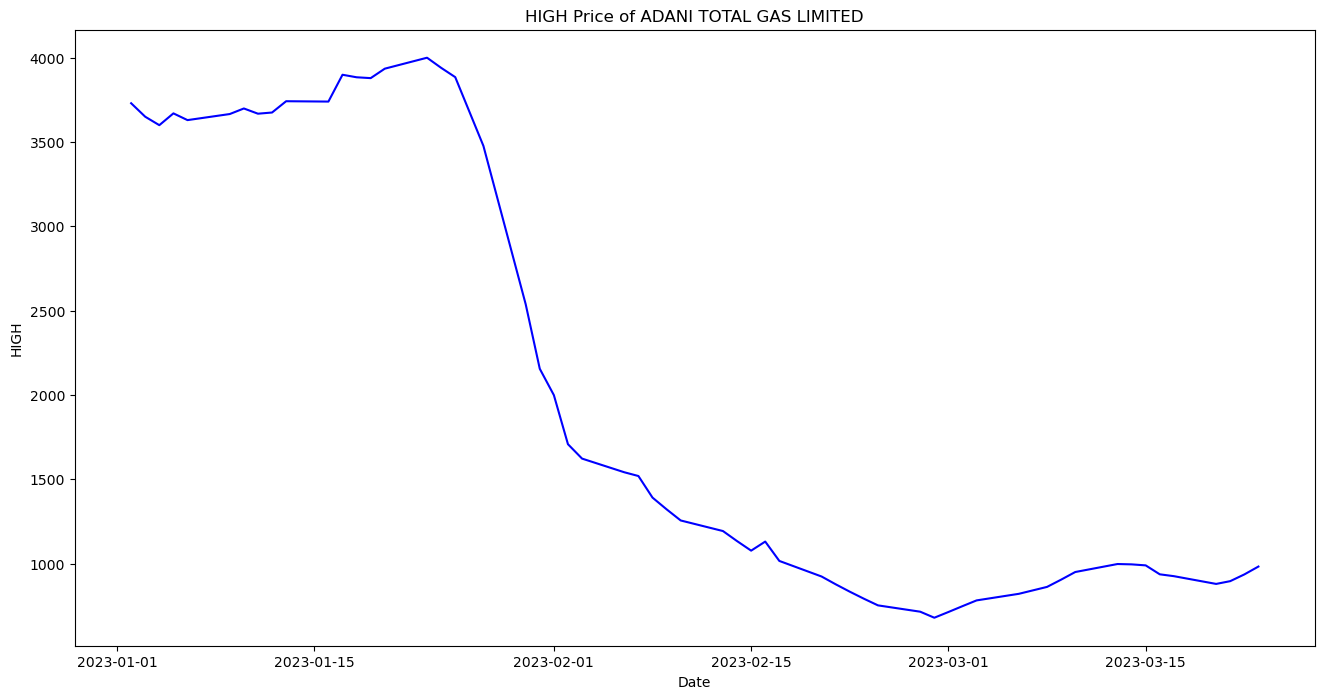

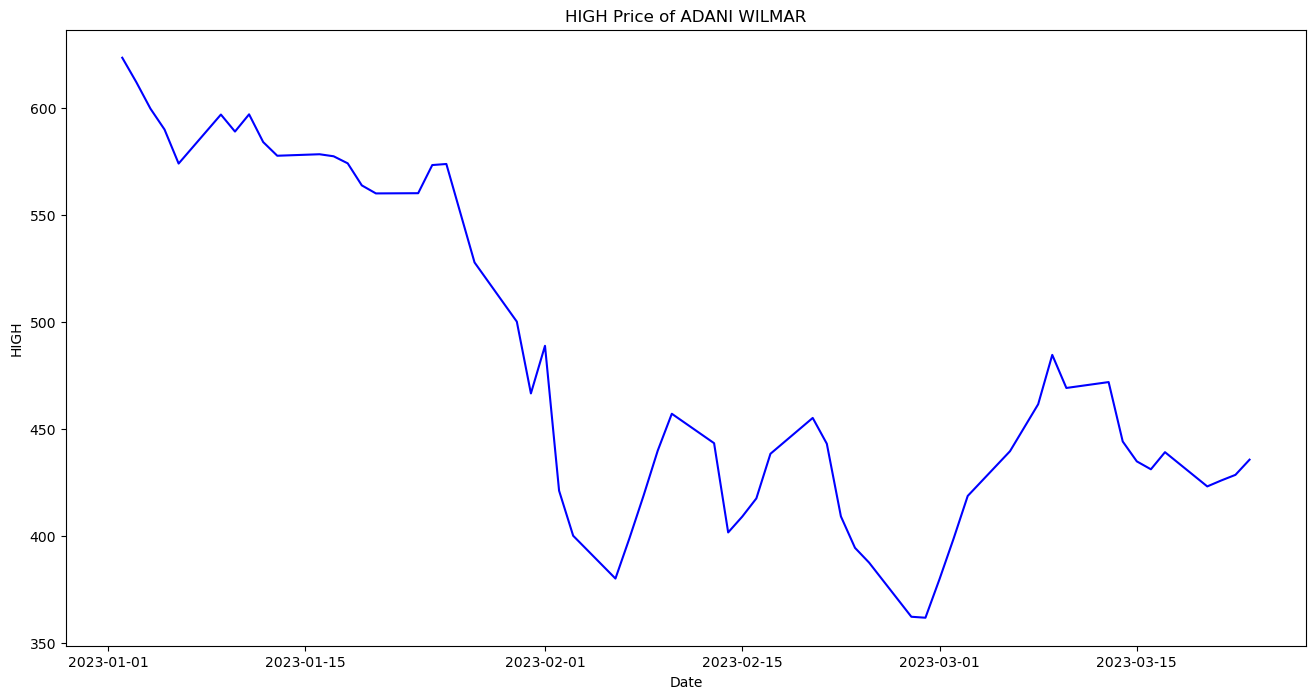





Showing stock trends for LOW price






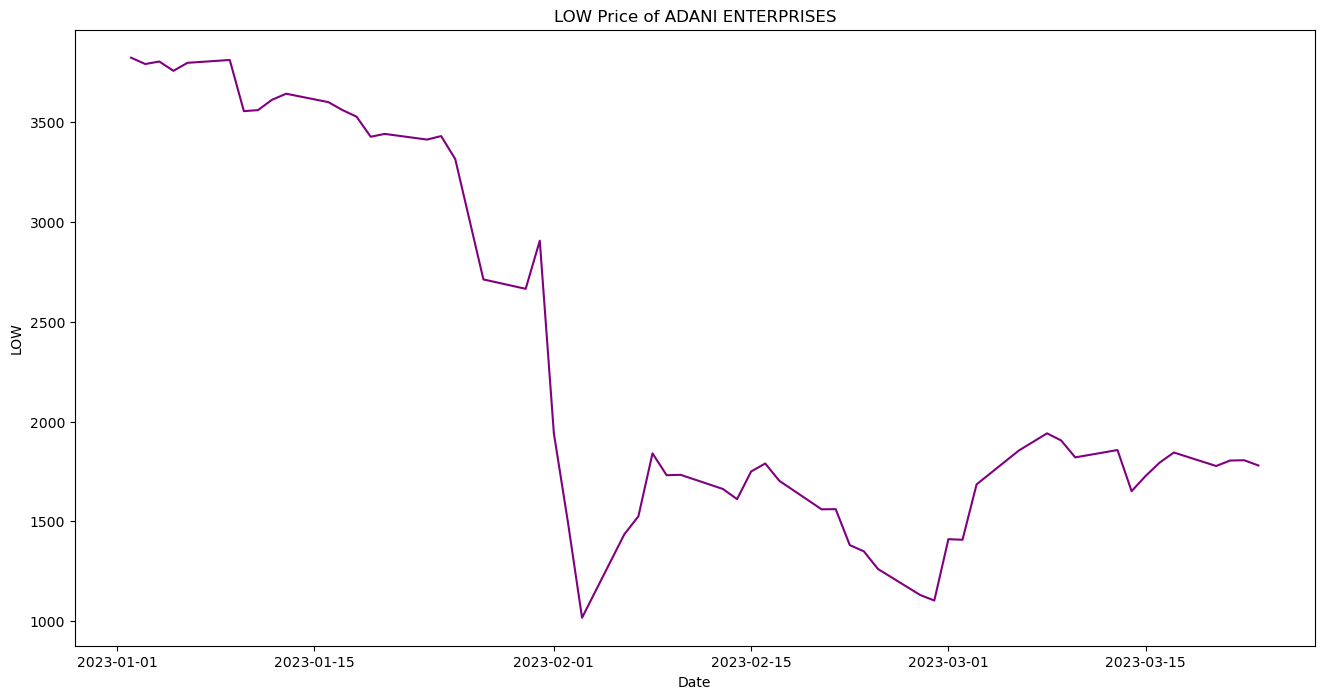

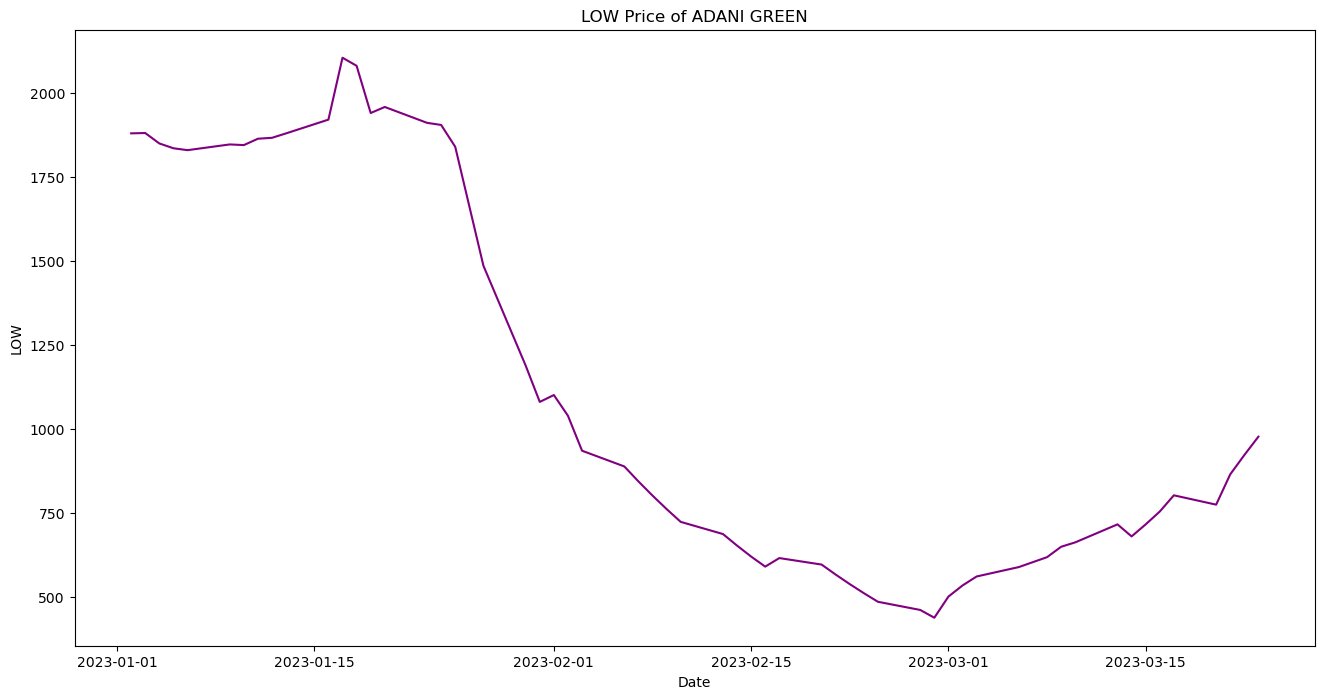

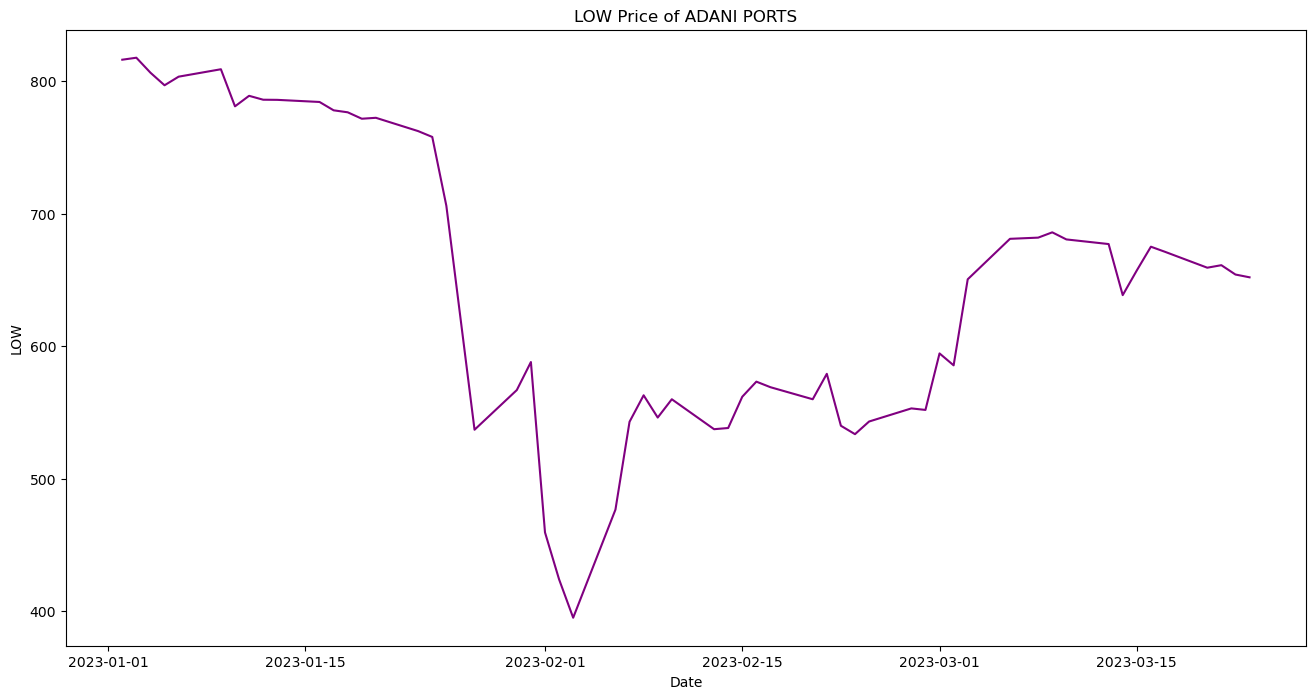

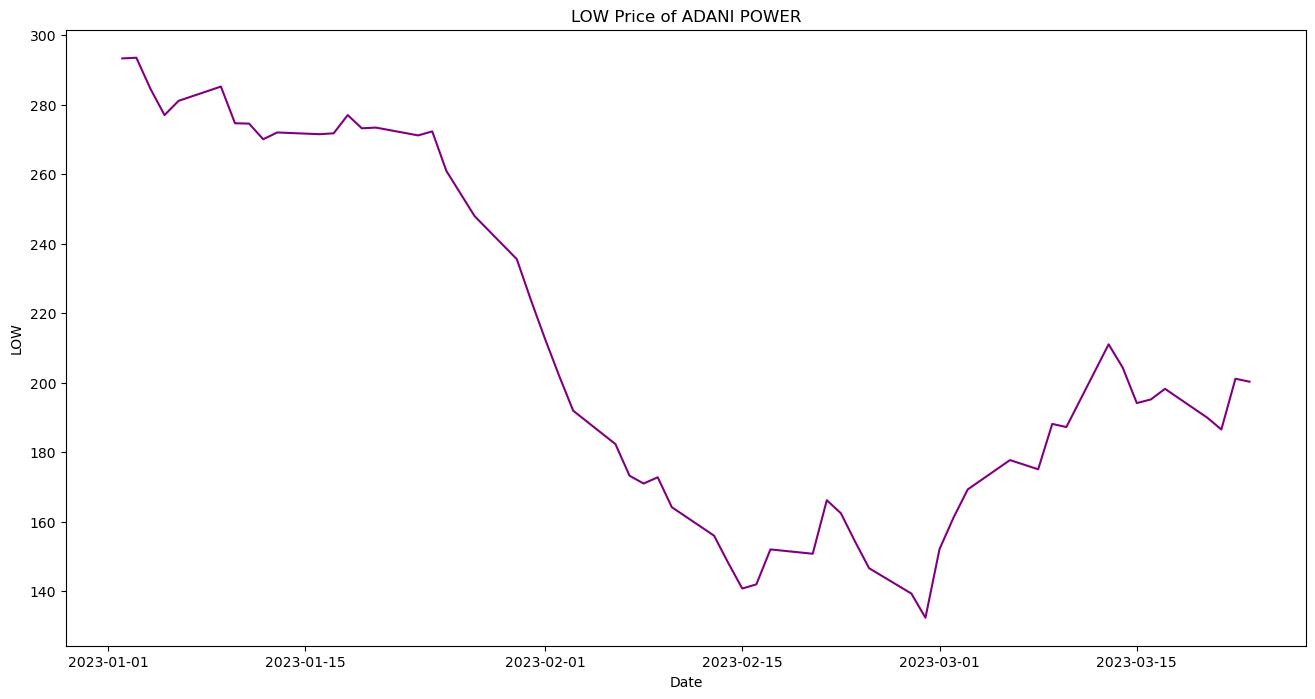

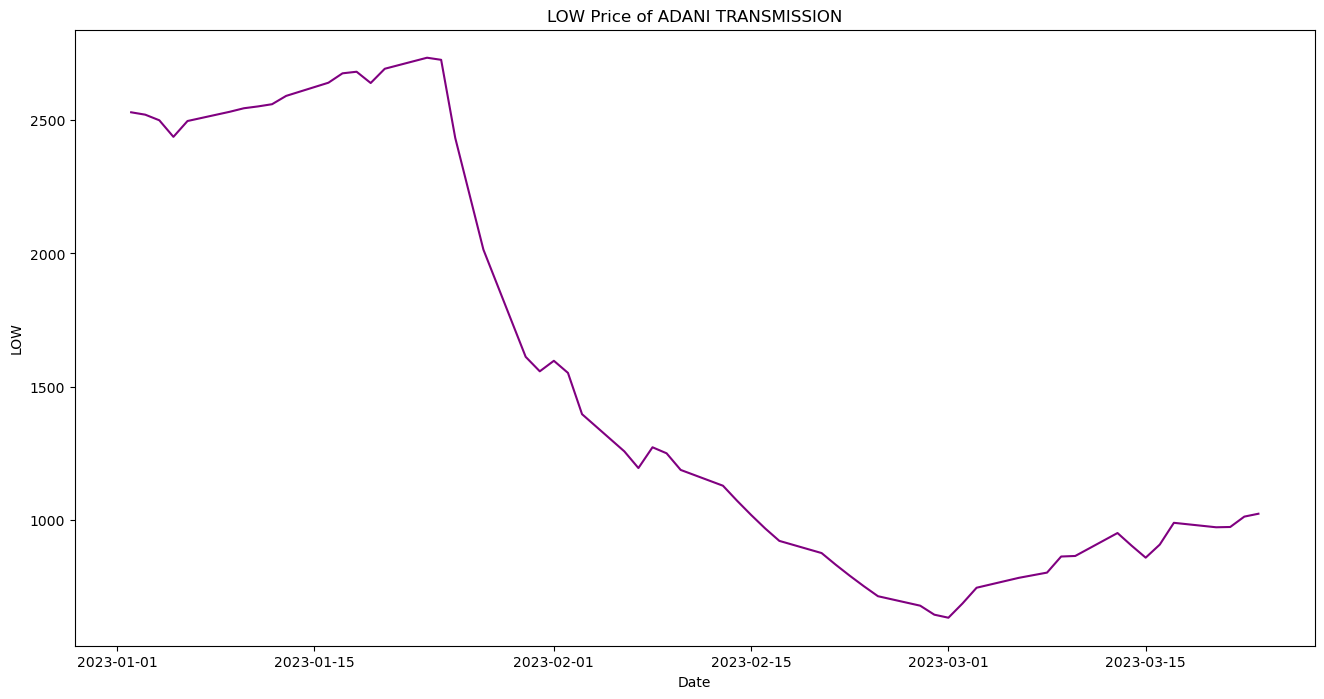

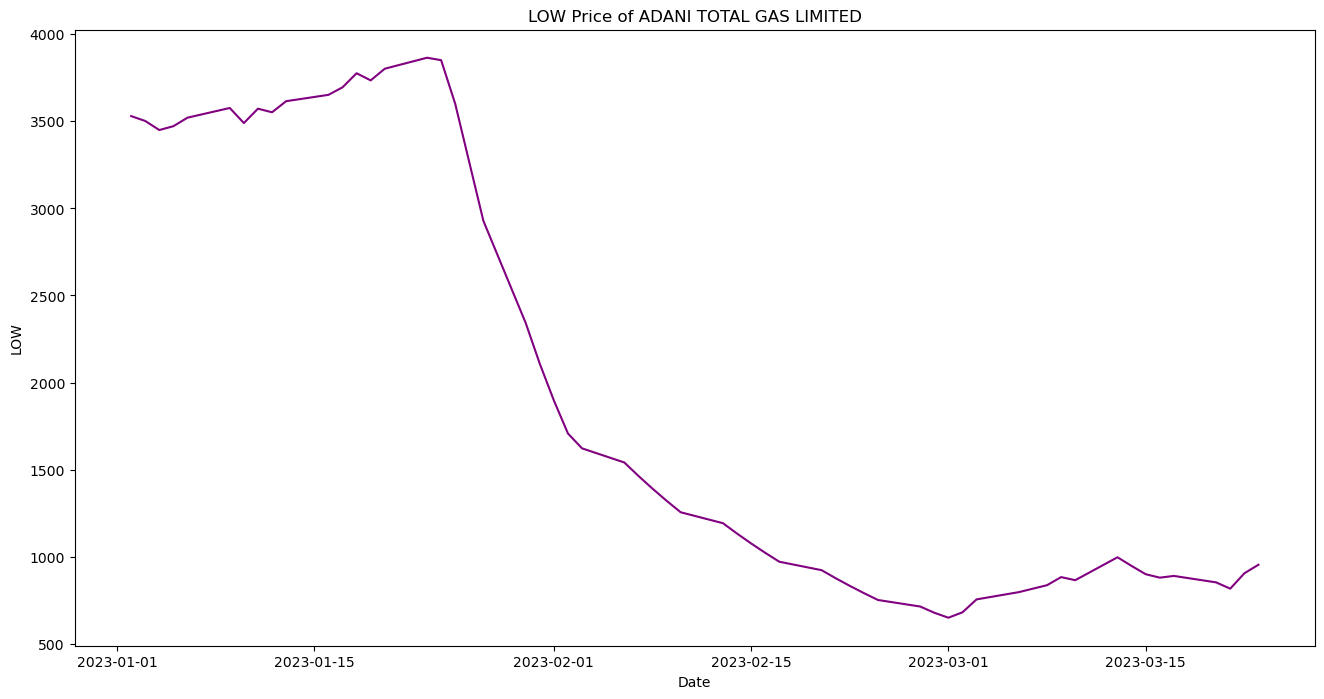

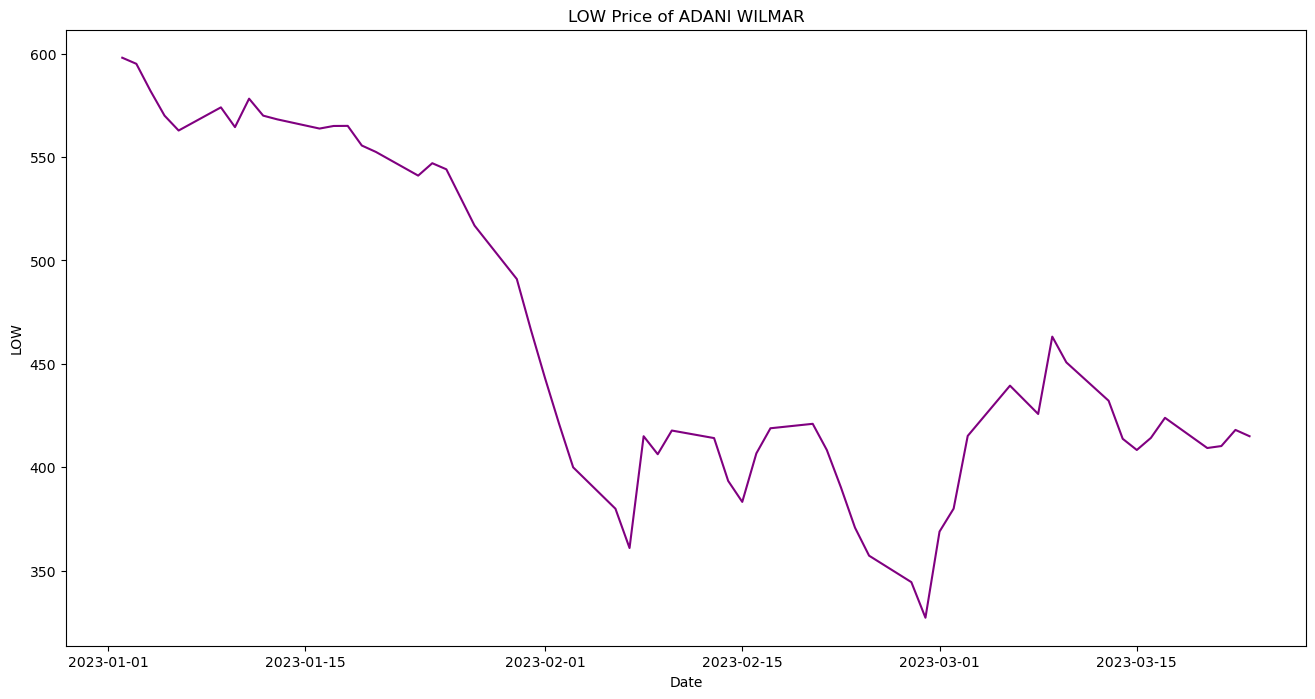





Showing stock trends for CLOSE price






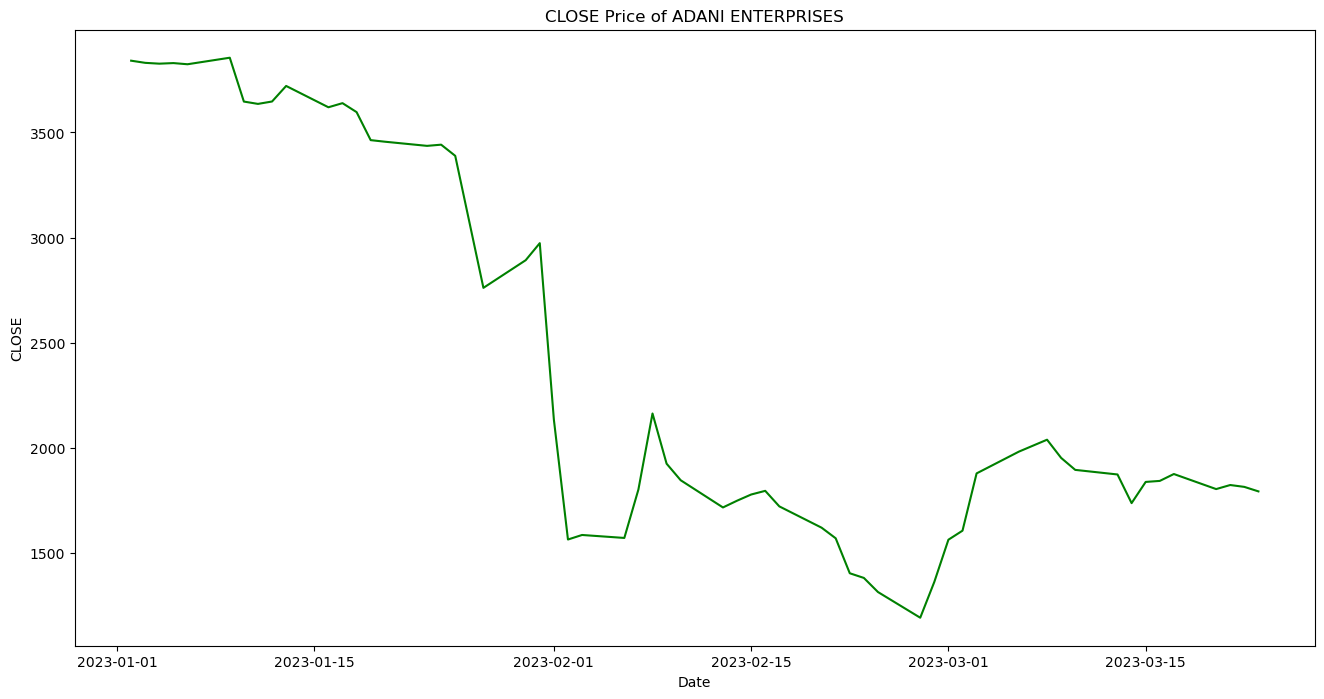

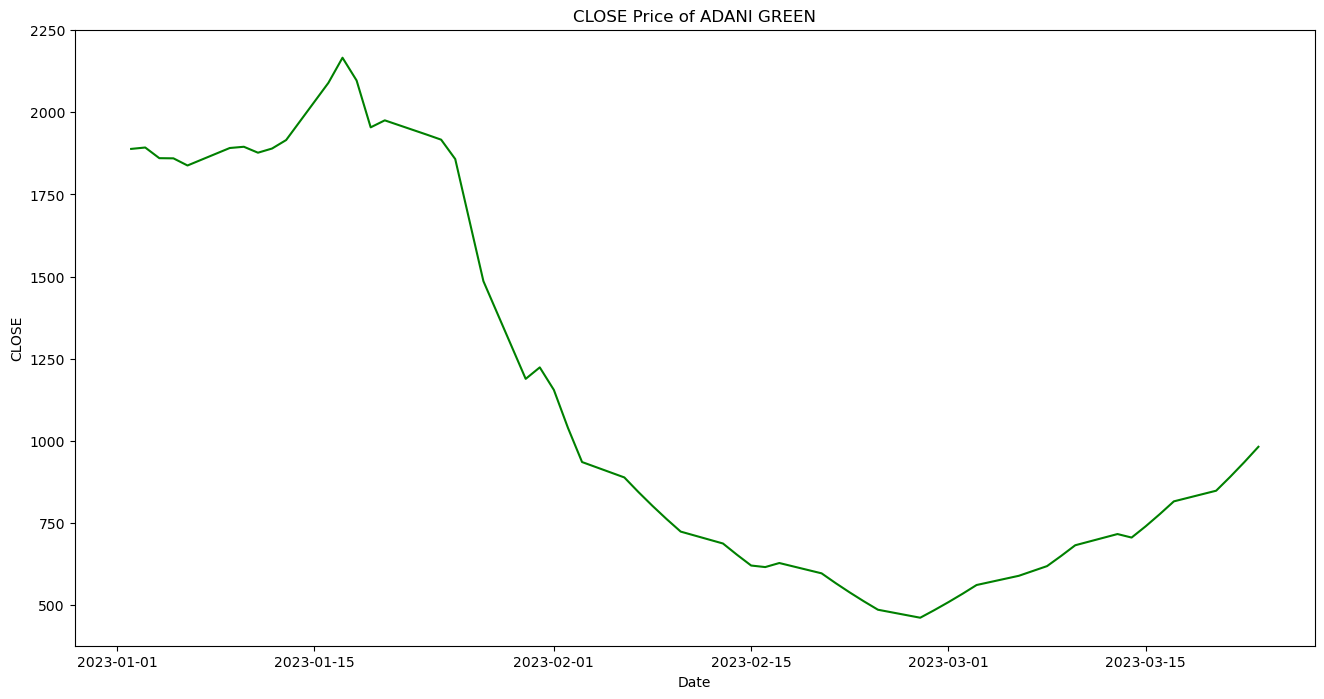

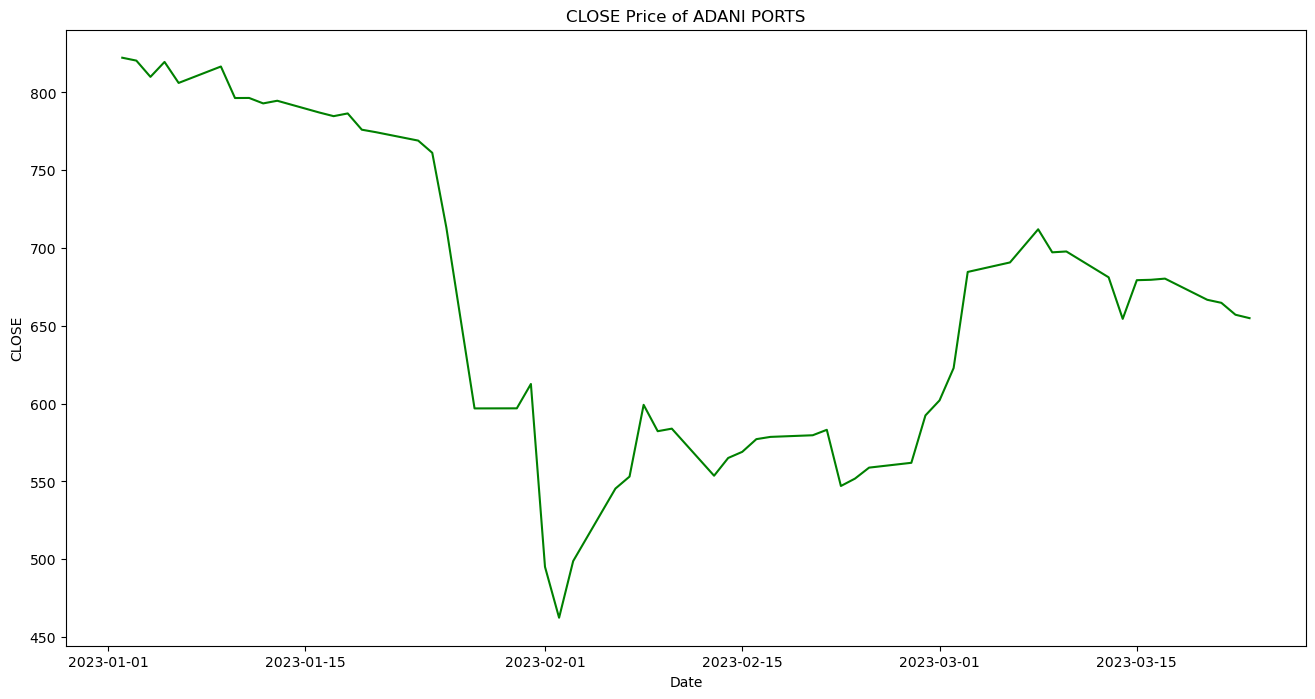

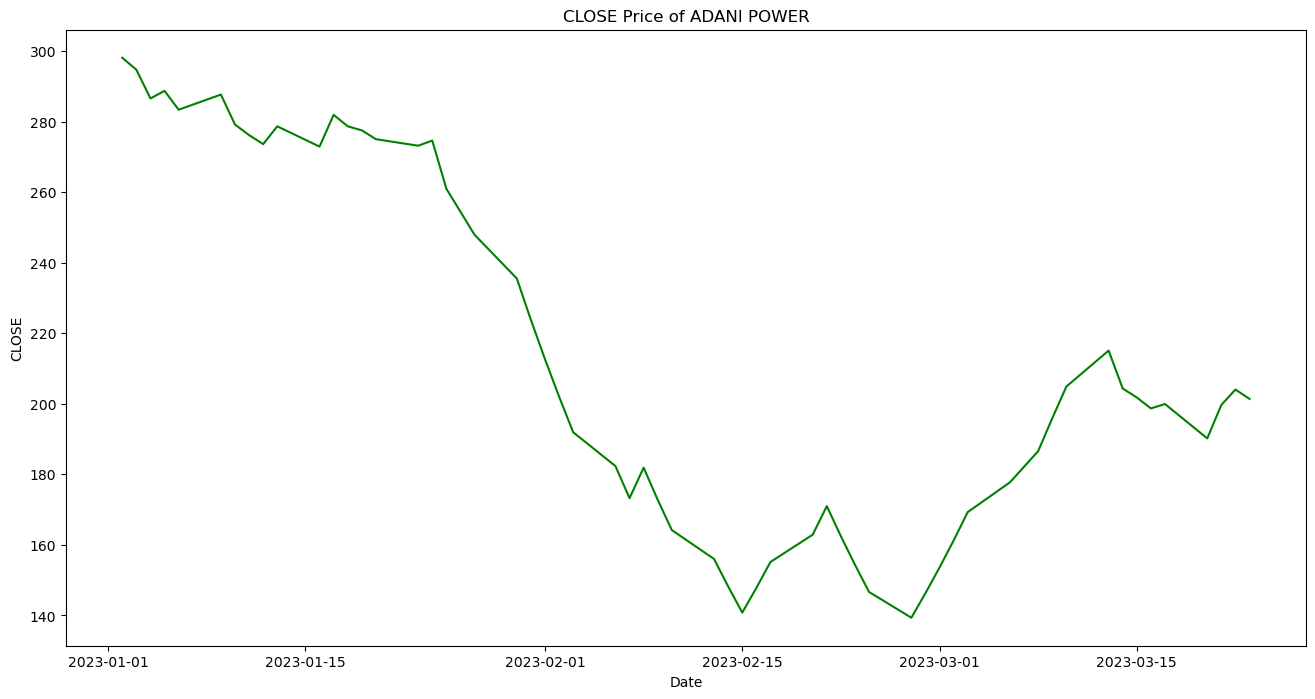

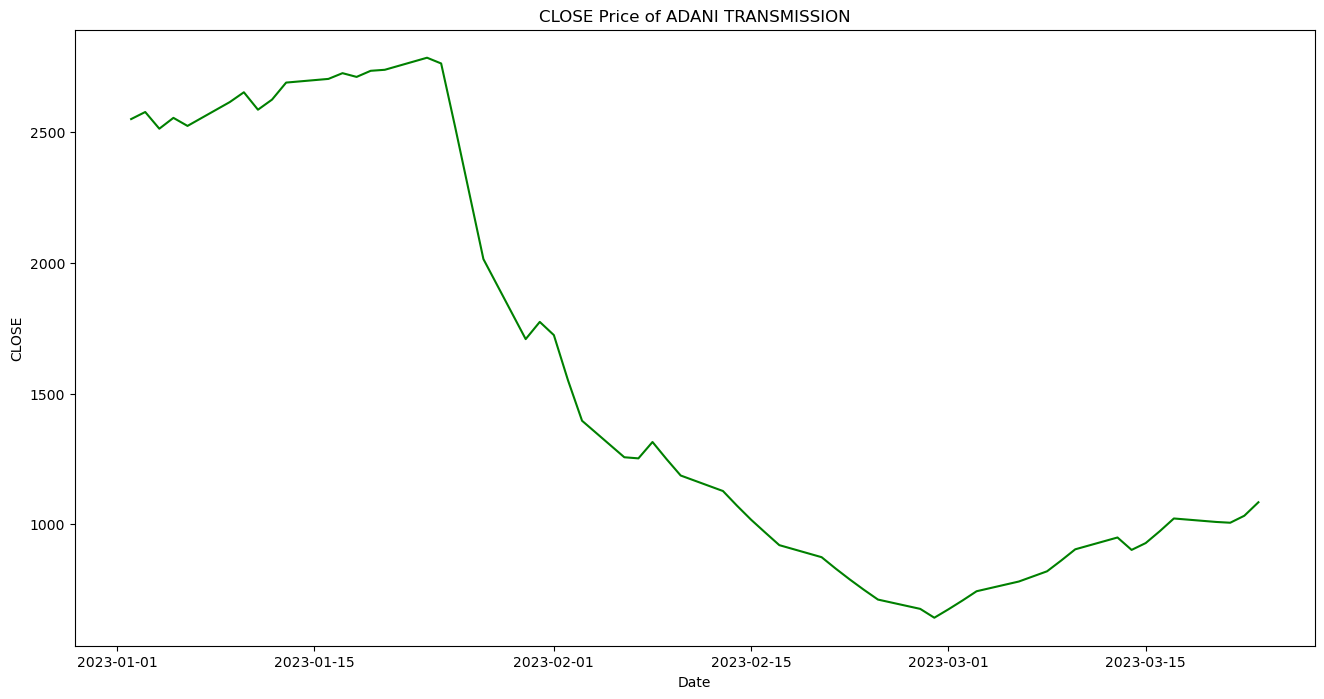

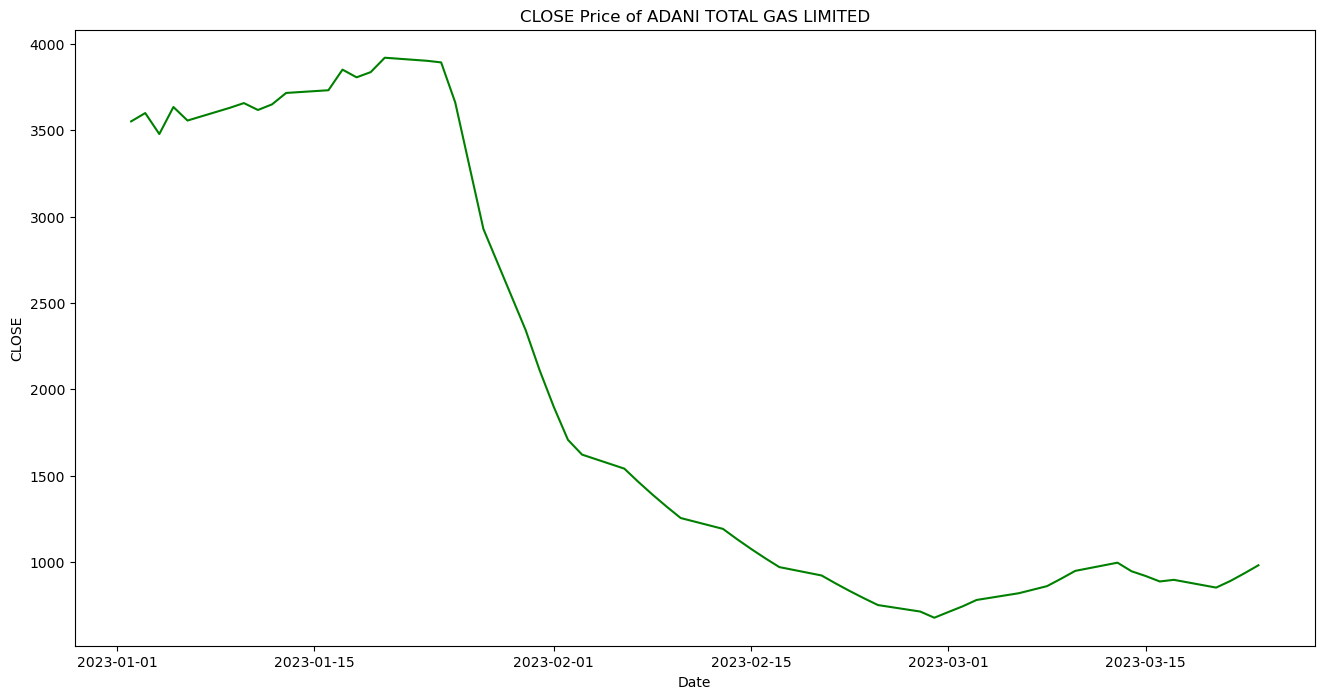

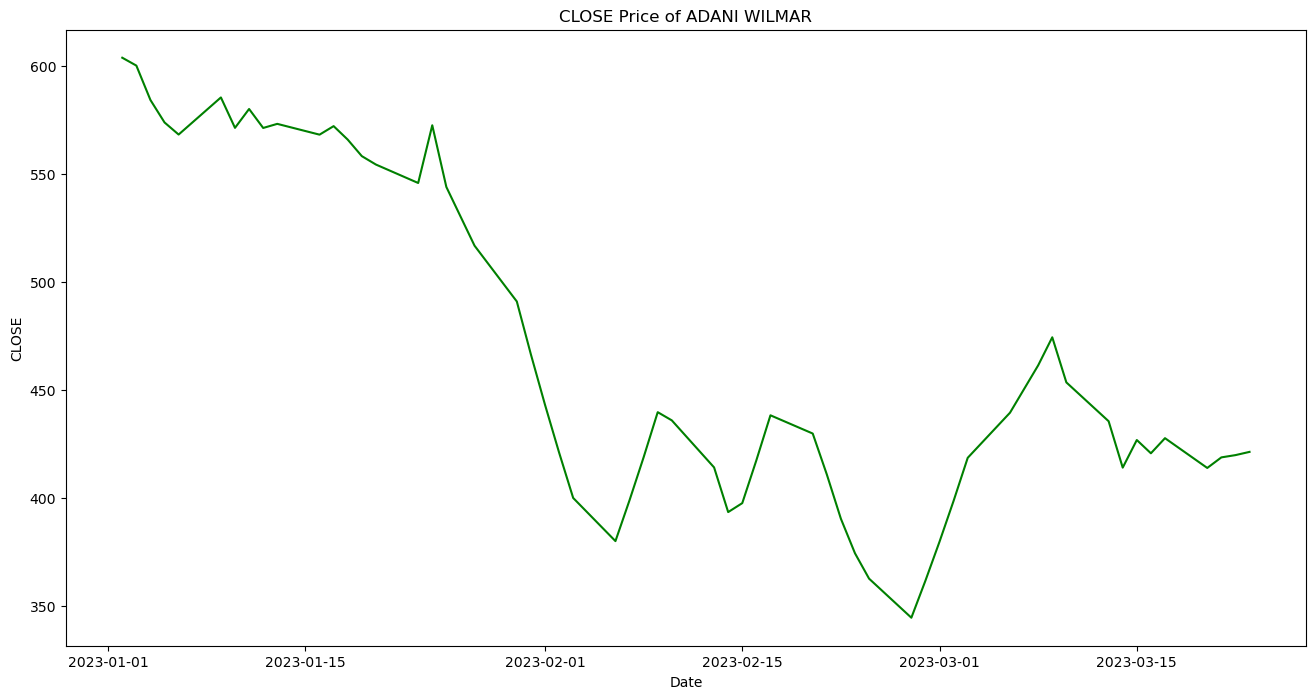





Showing stock trends for PREV. CLOSE price






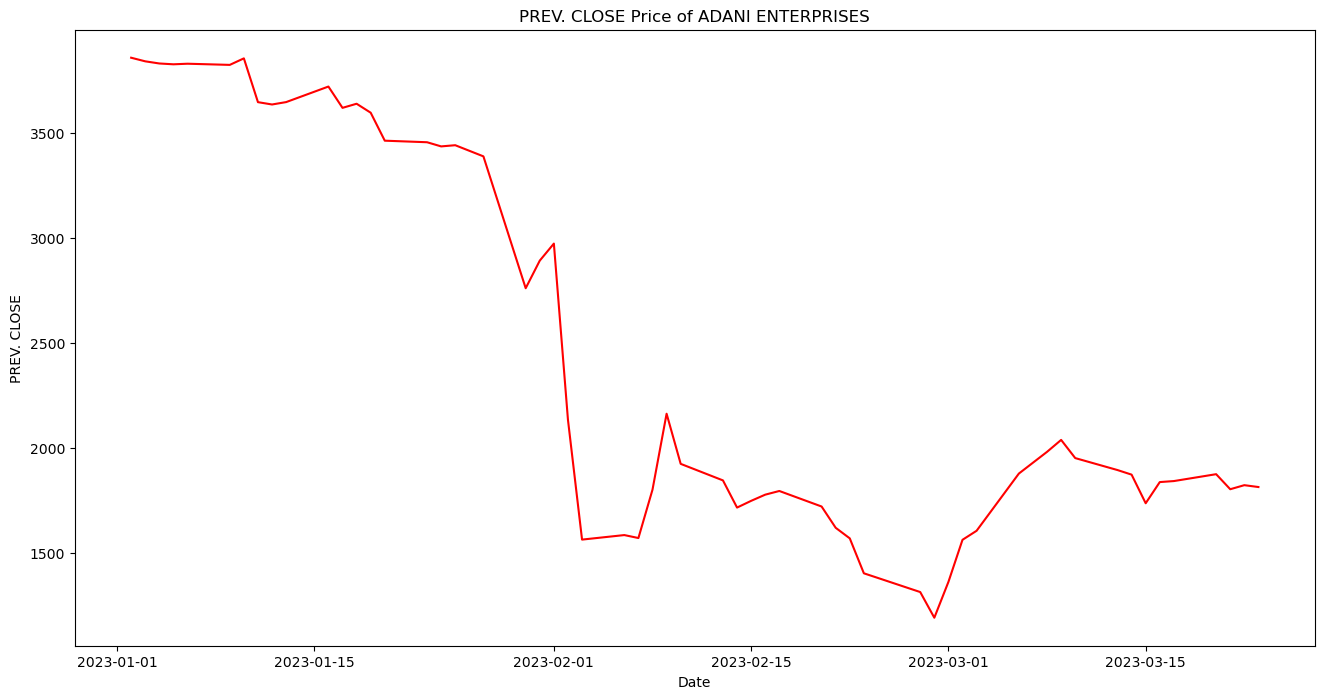

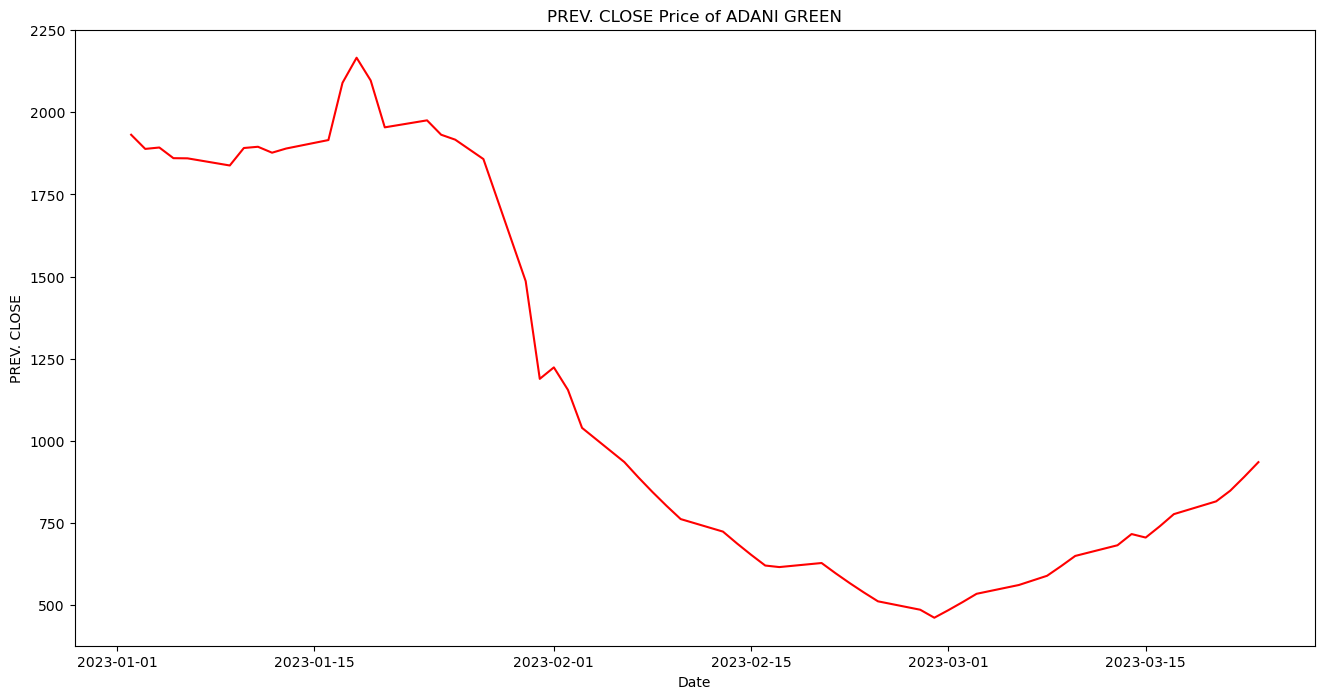

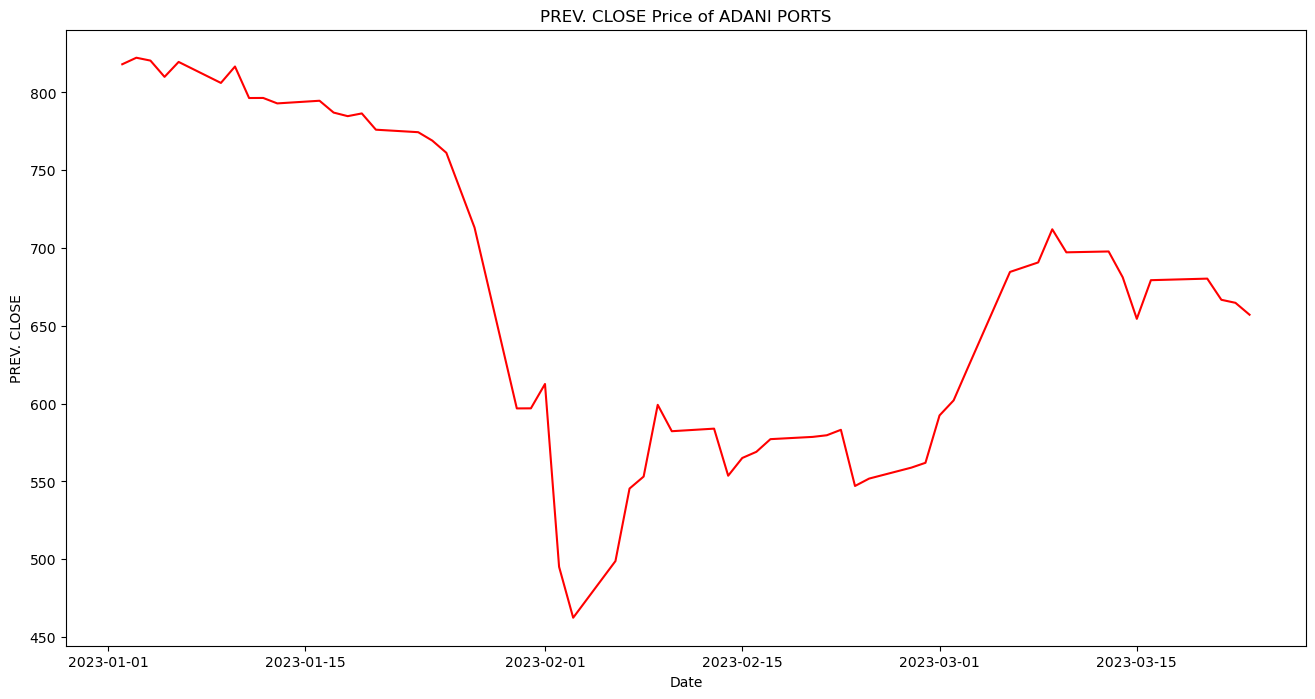

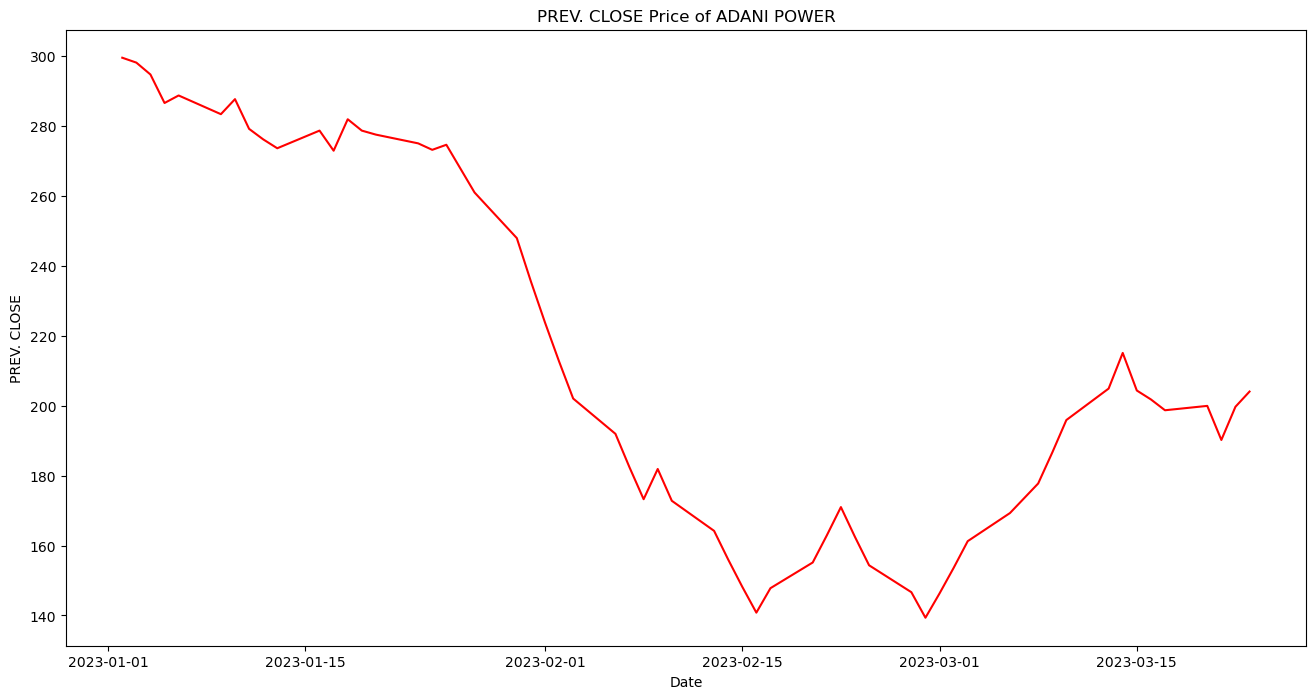

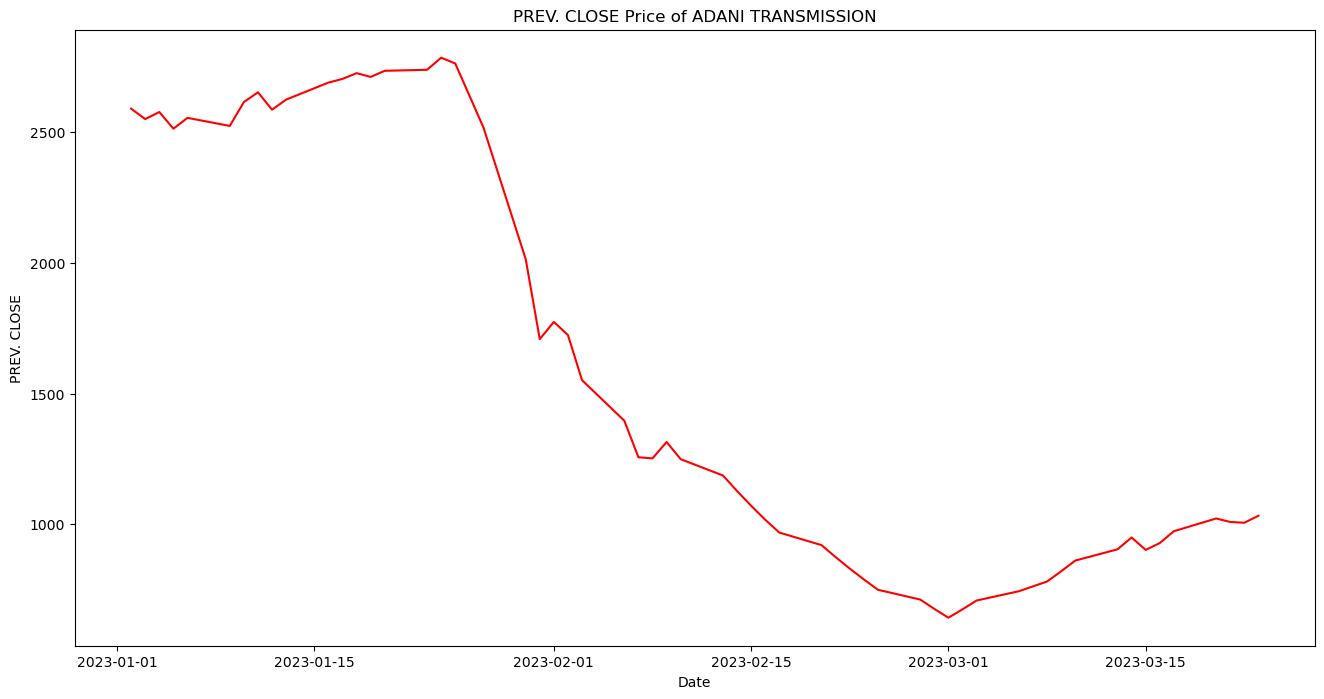

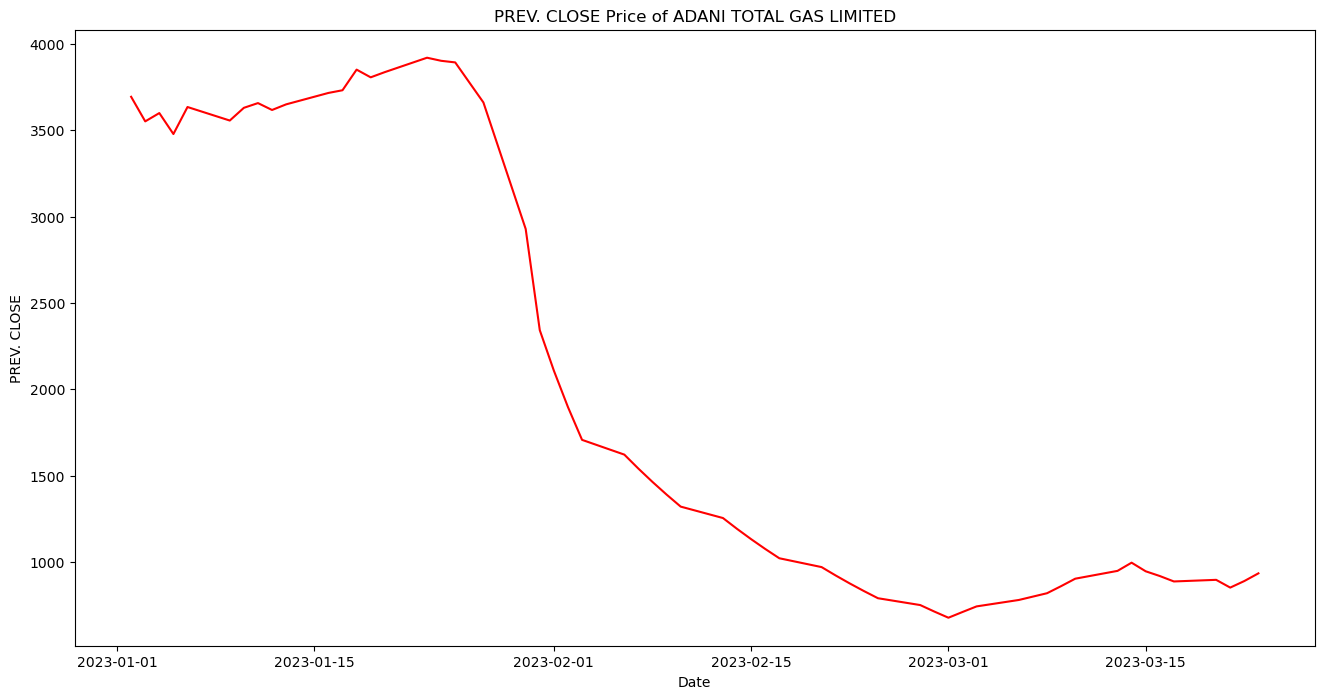

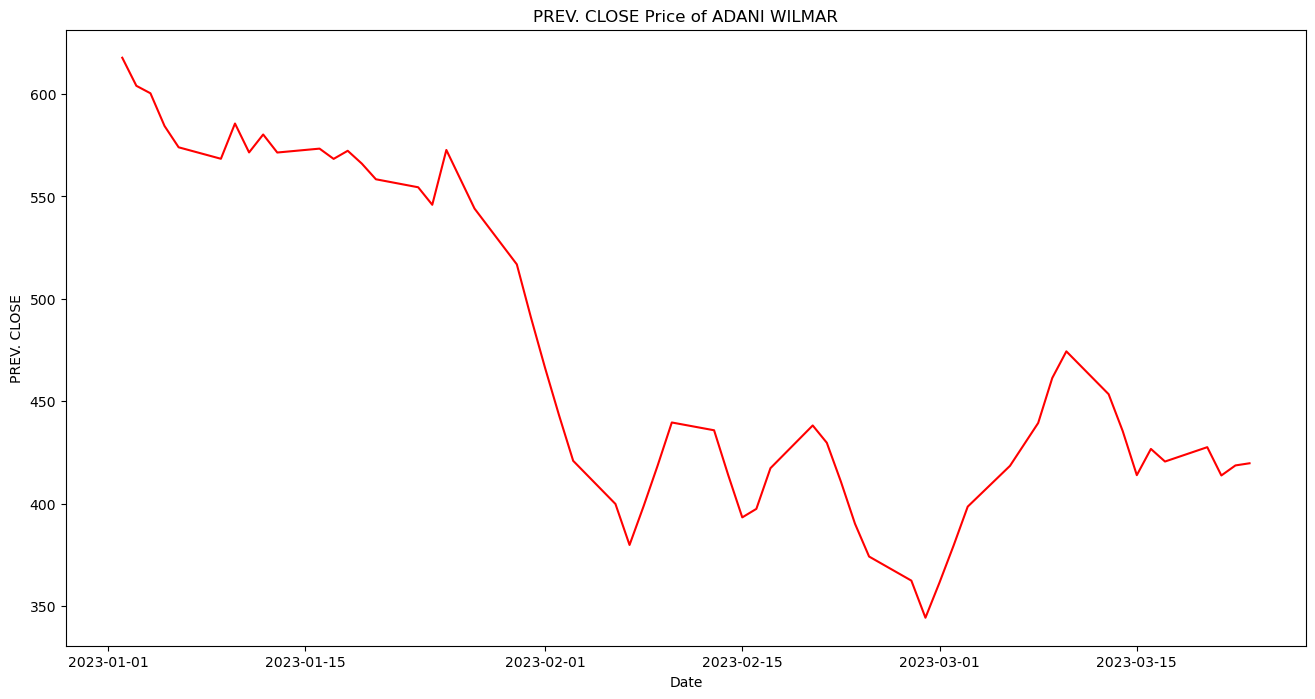





Showing stock trends for LTP price






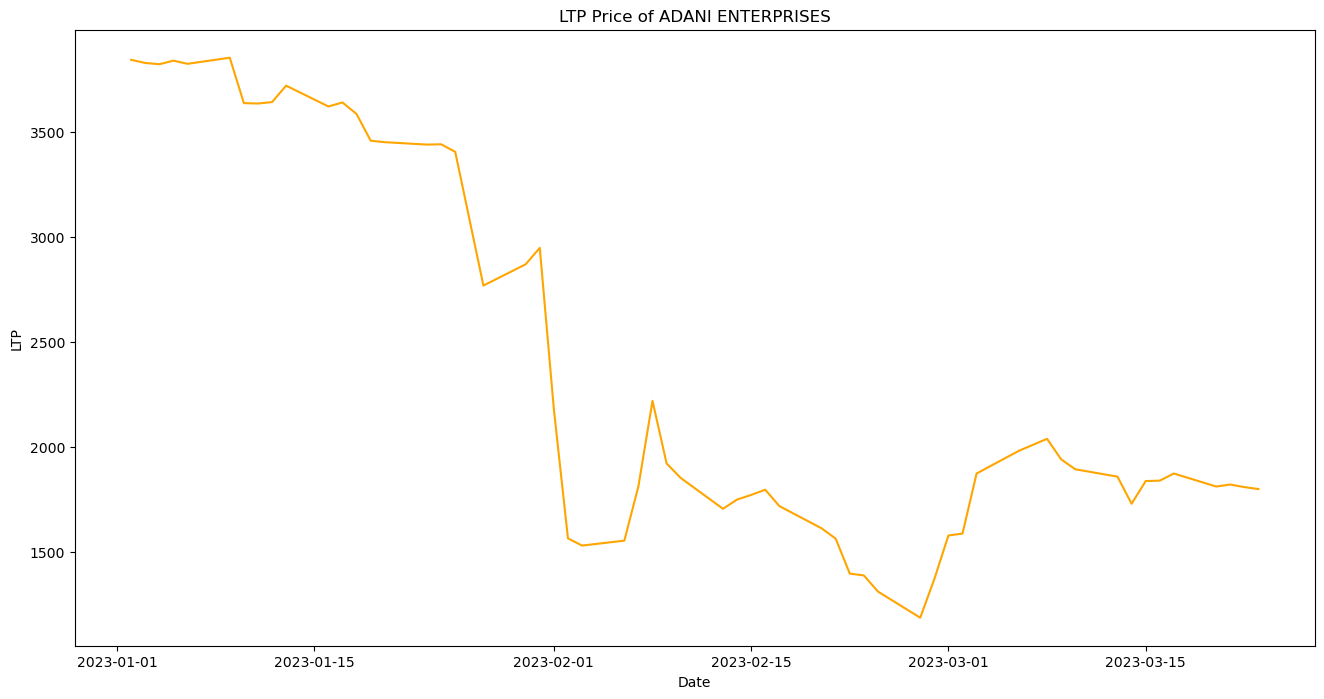

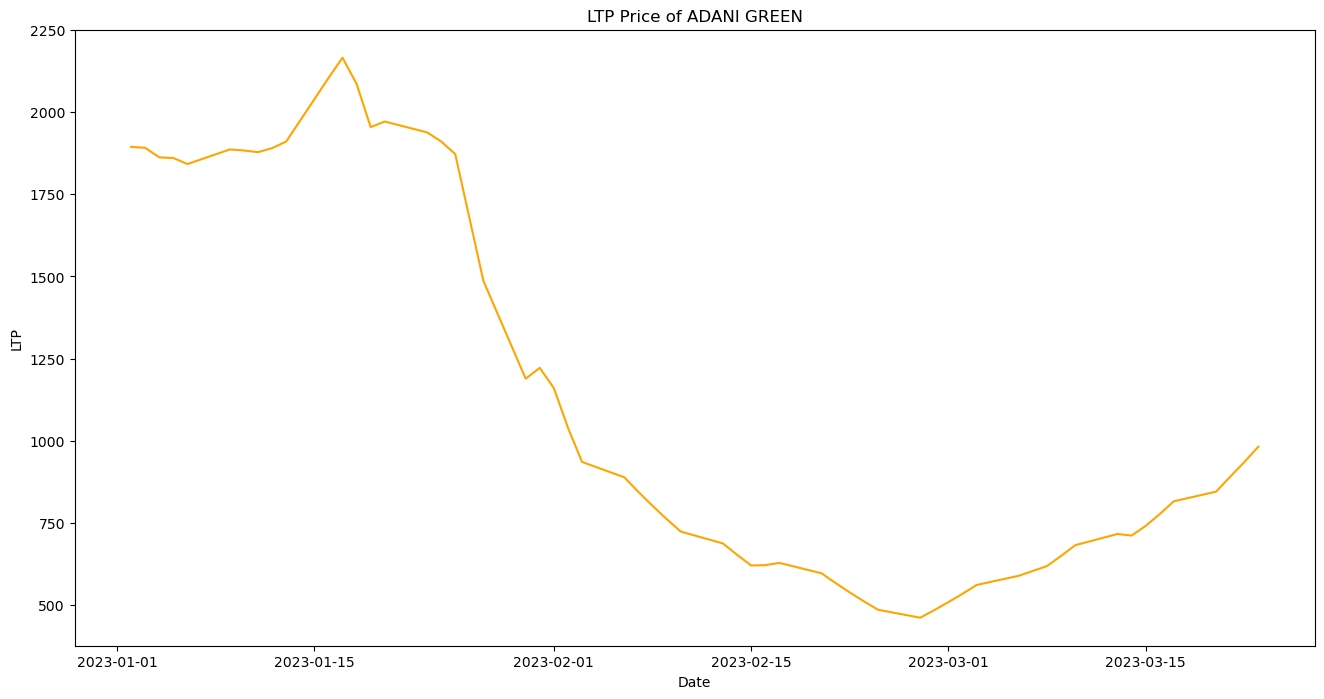

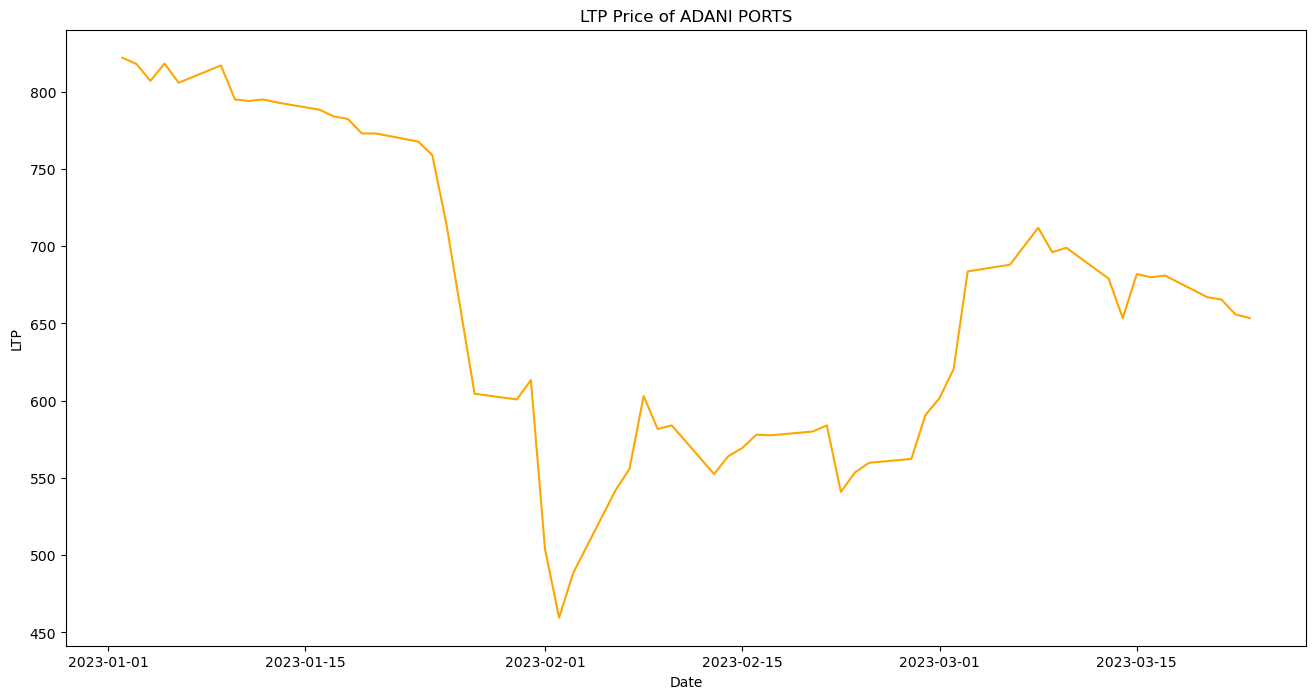

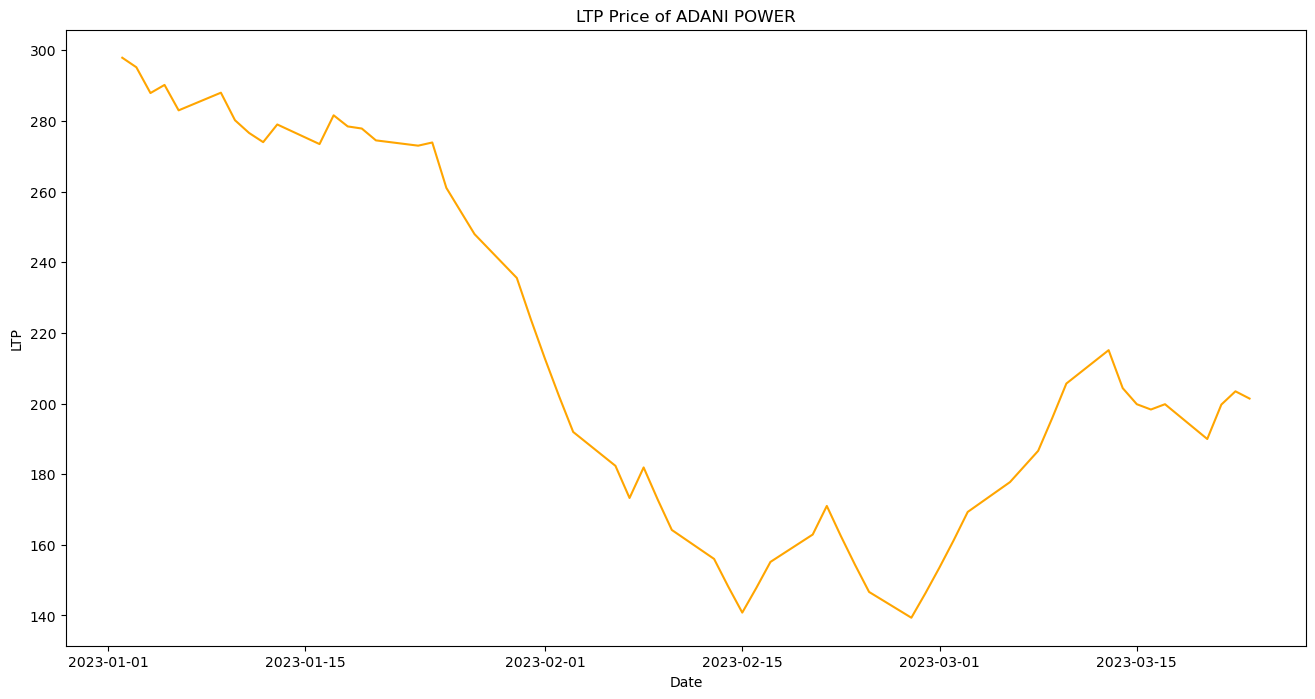

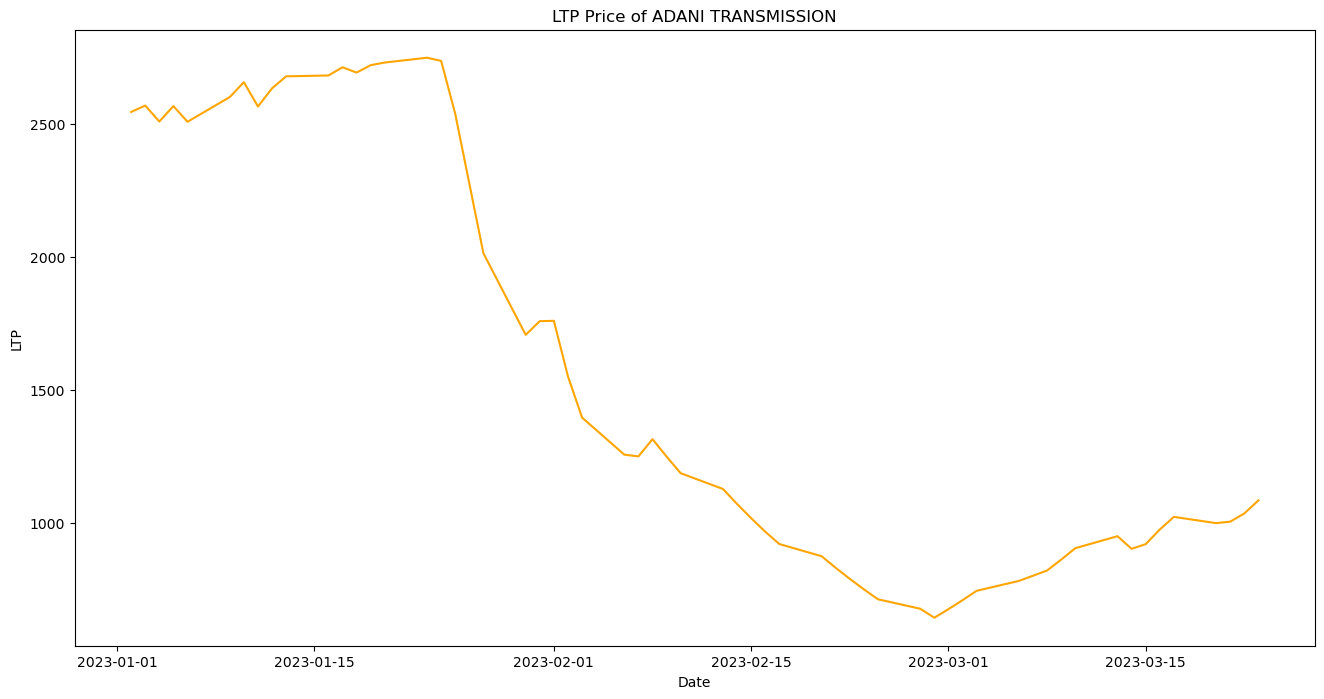

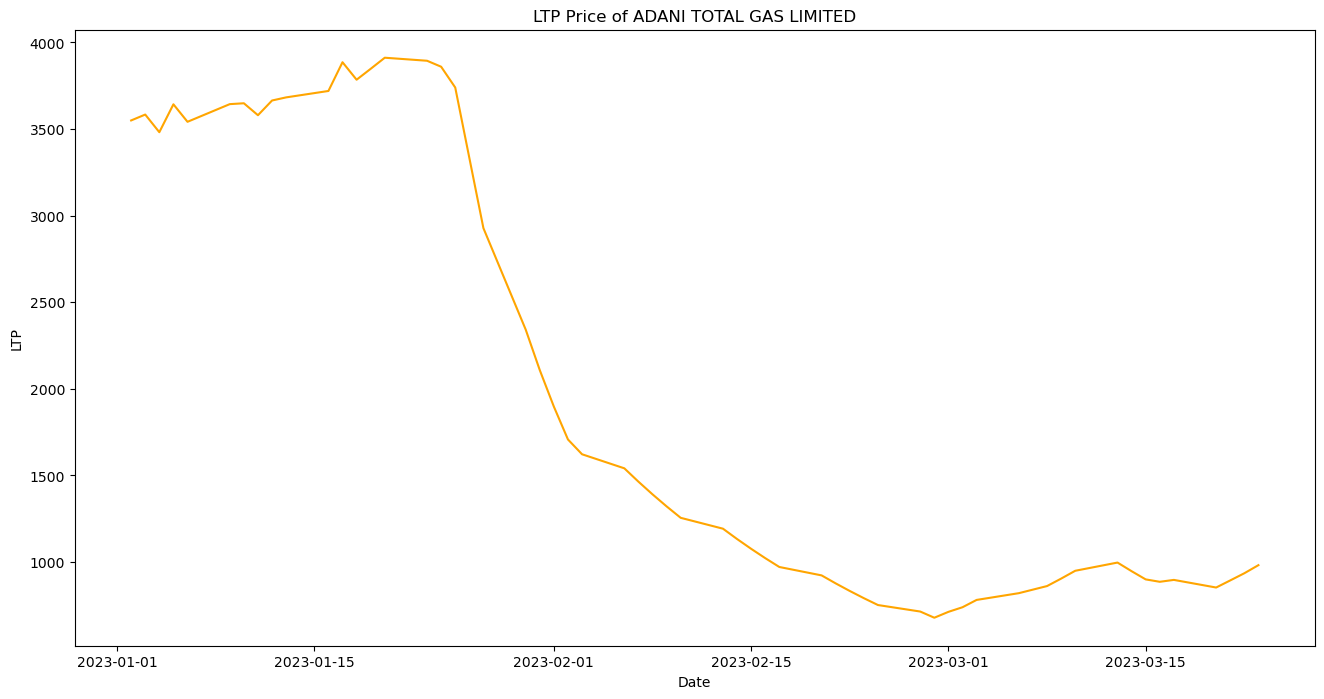

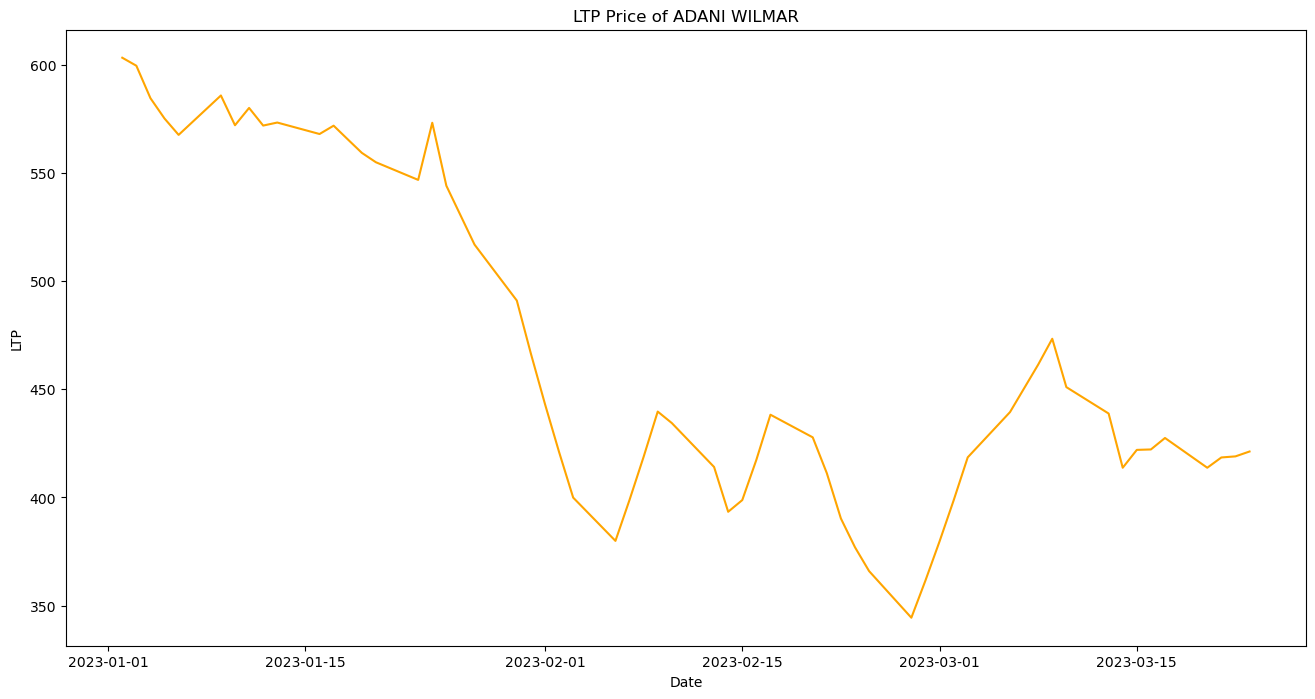





Showing stock trends for VWAP price






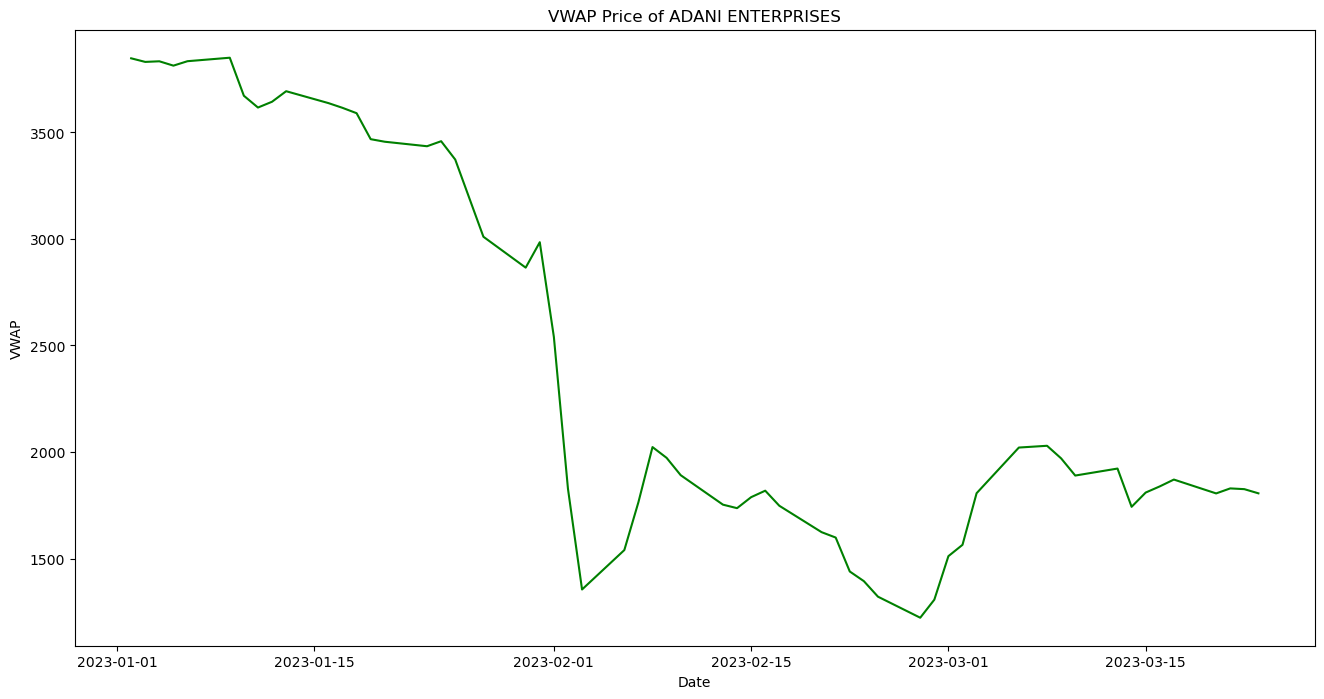

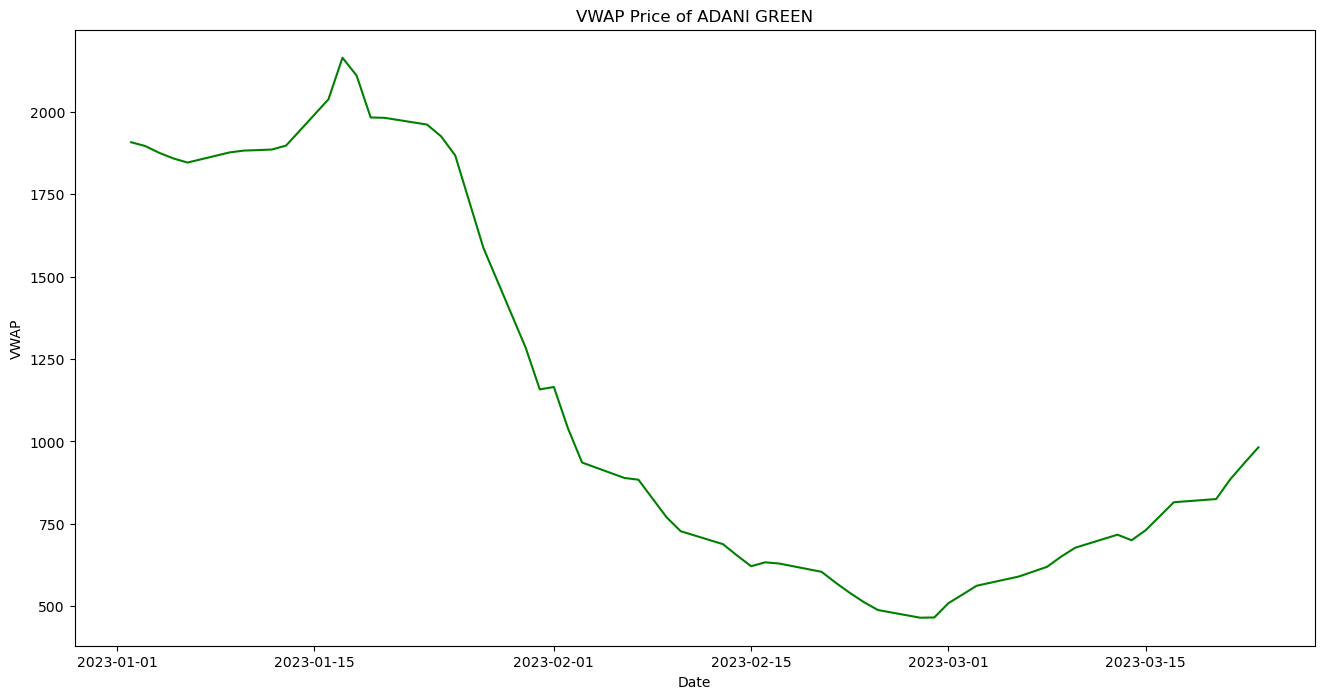

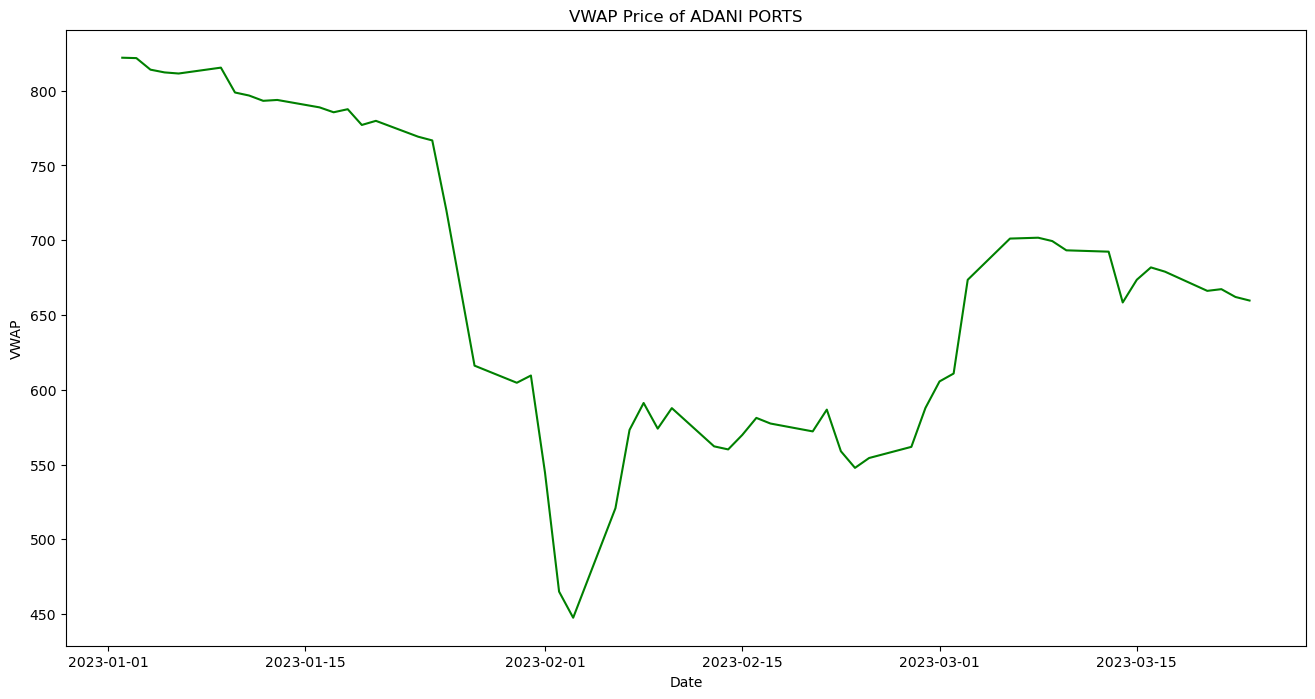

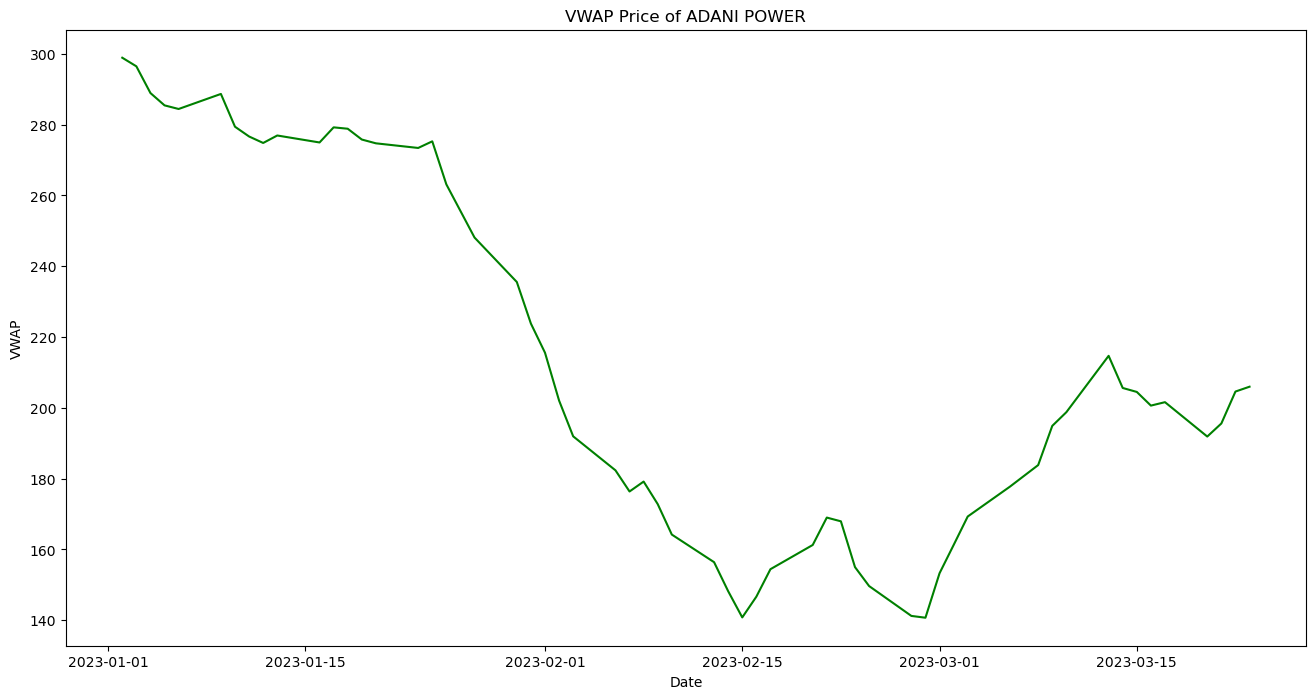

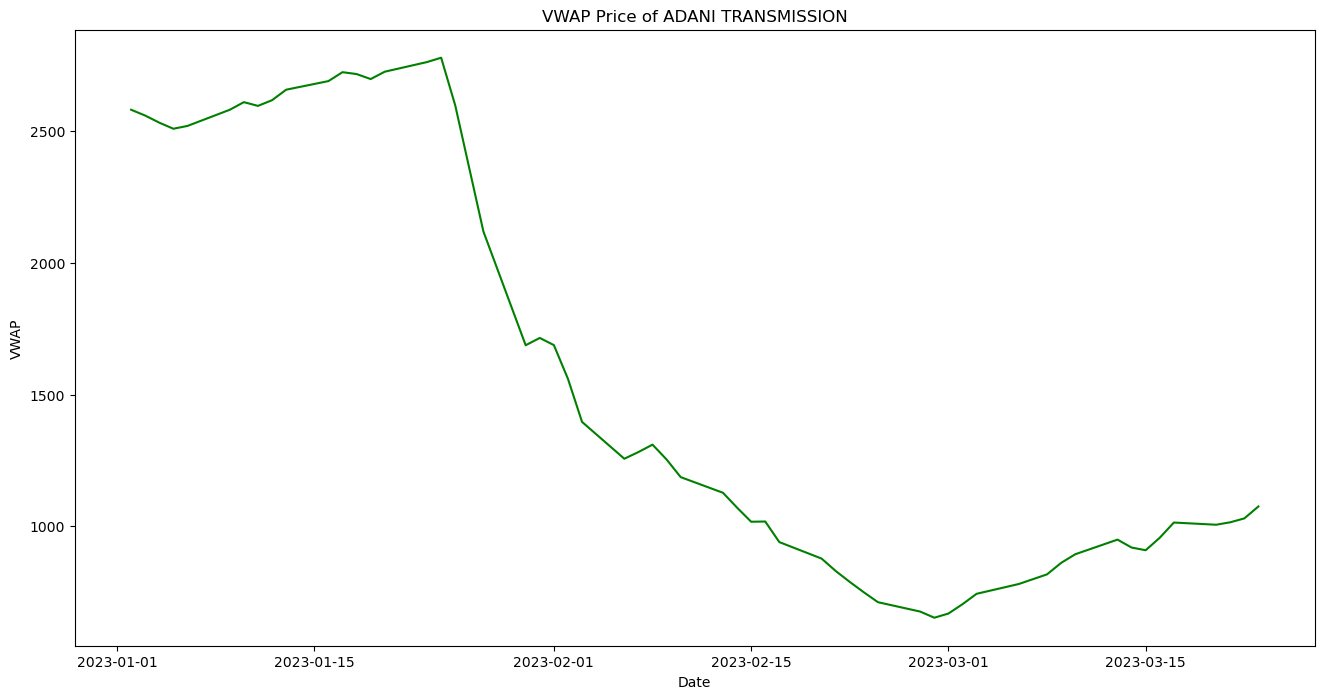

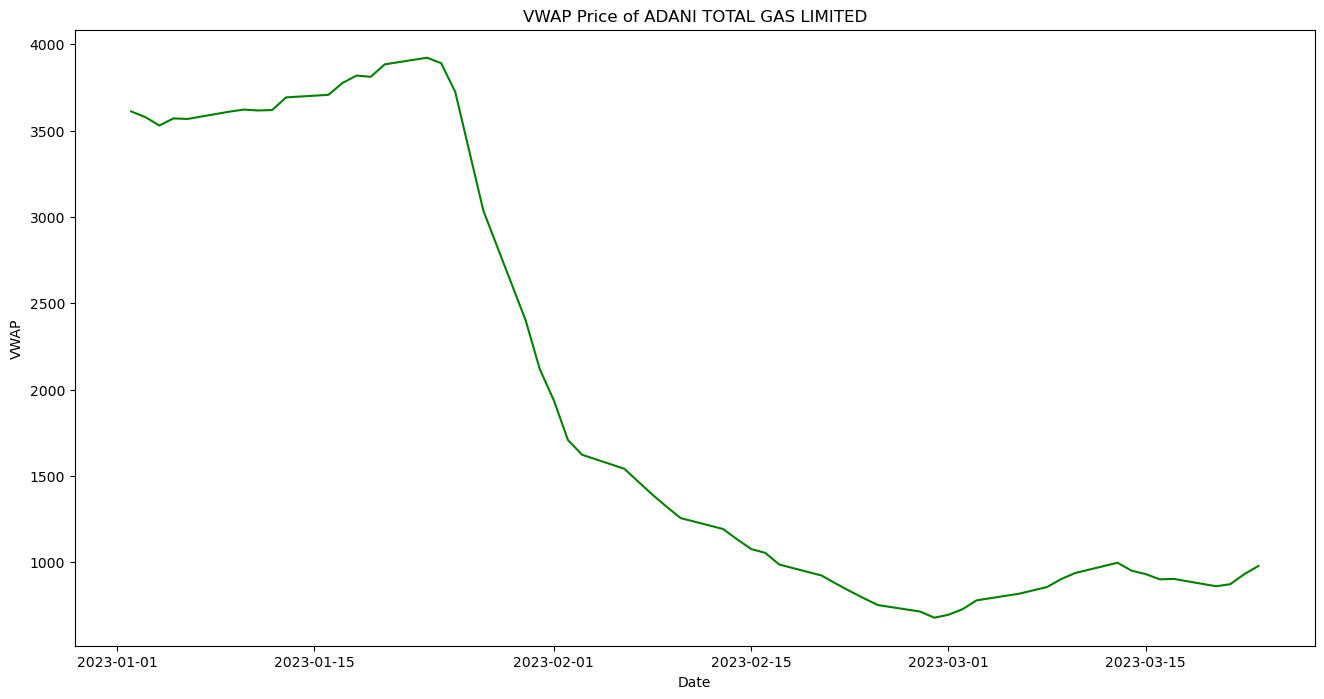

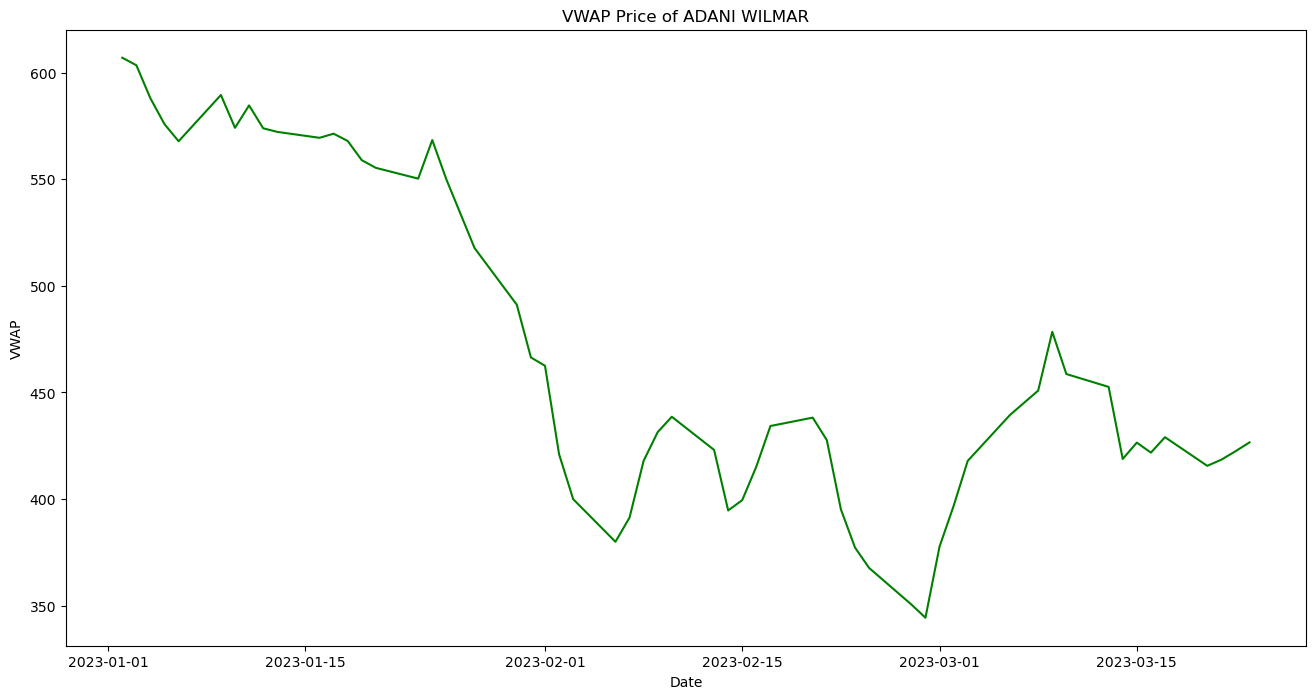





Showing stock trends for 52W H price






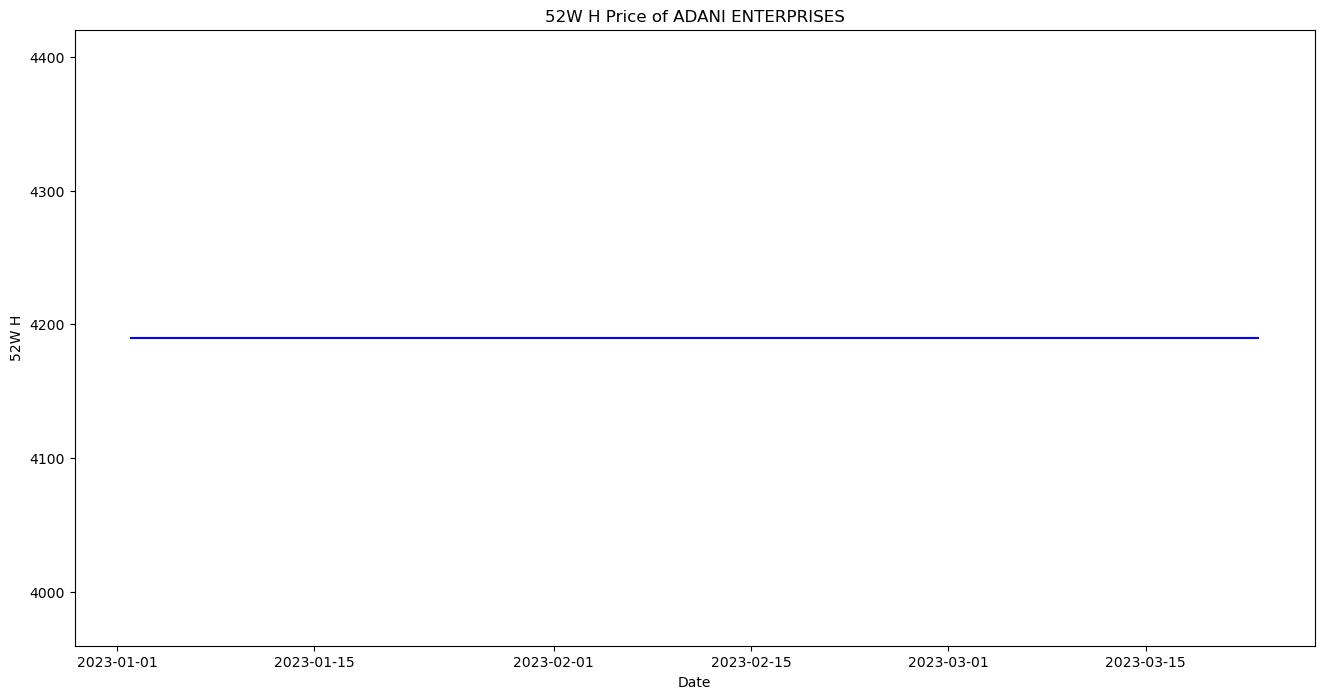

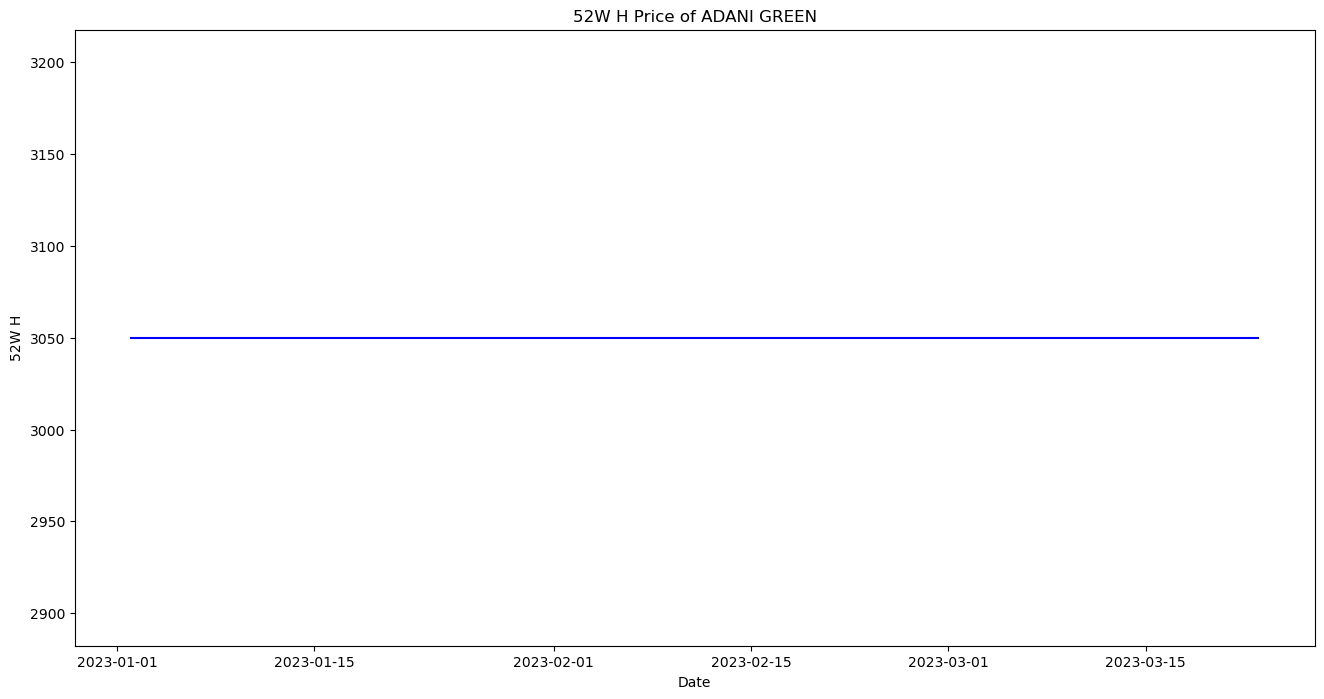

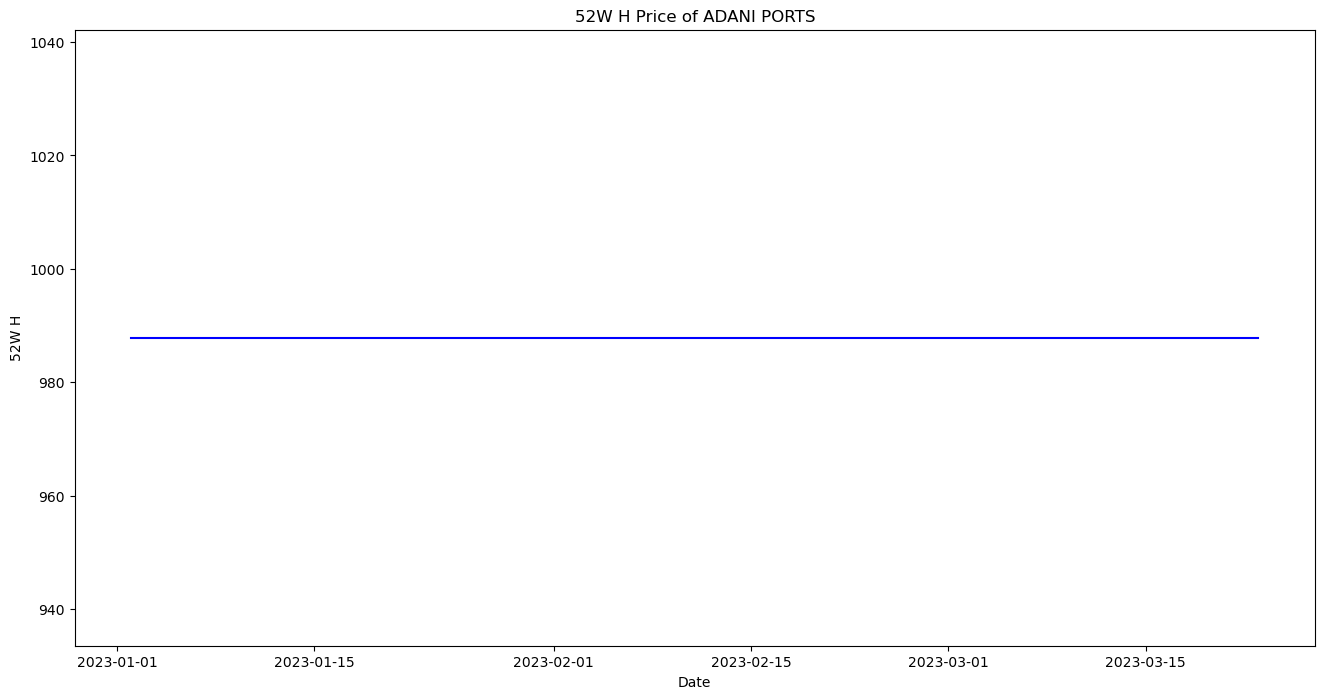

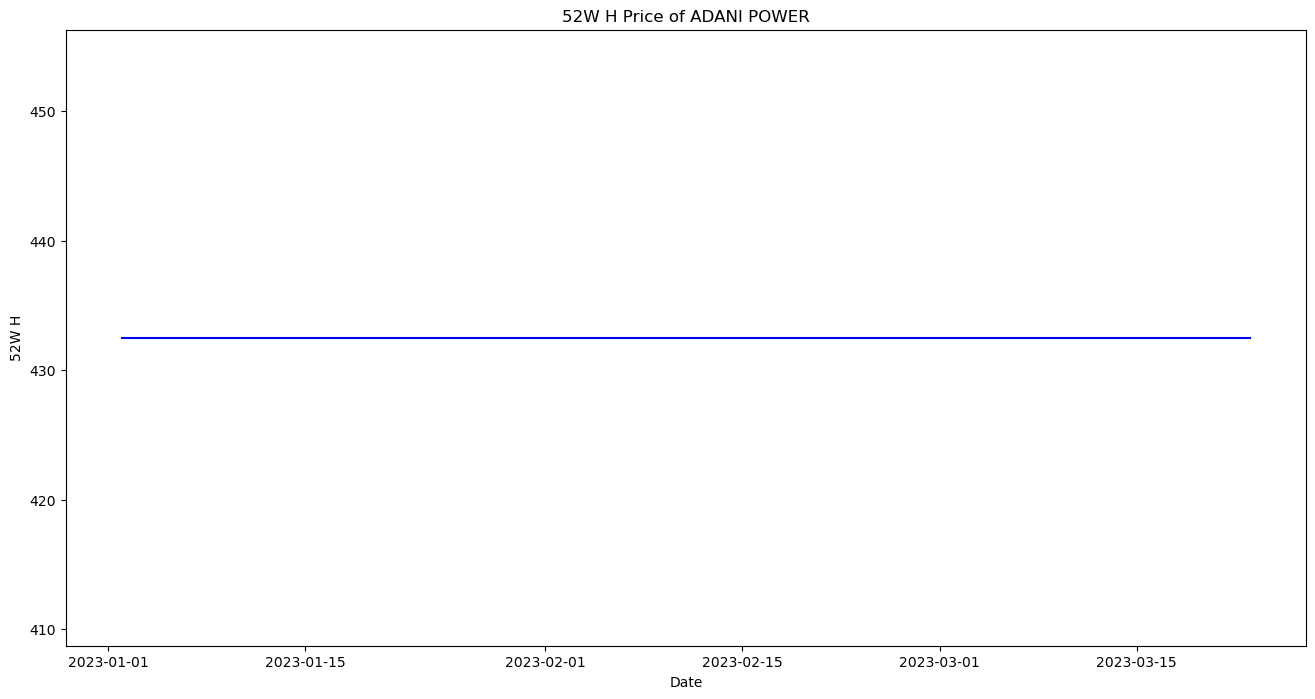

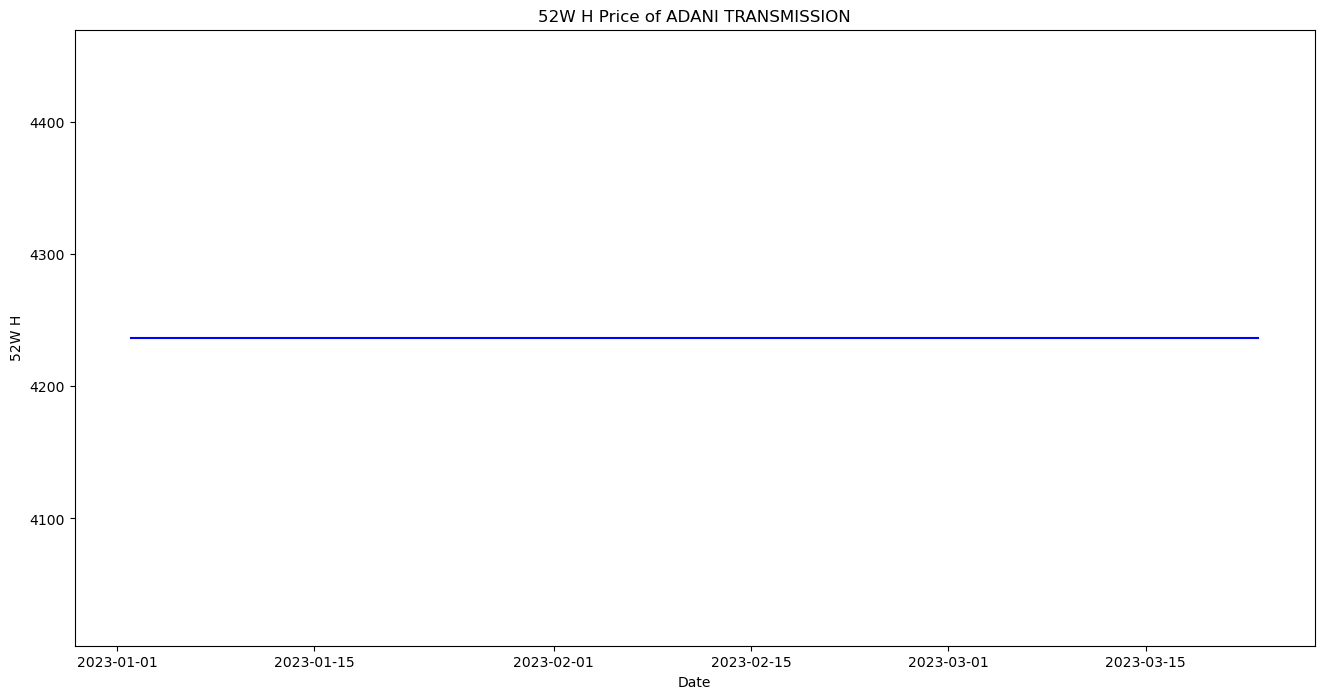

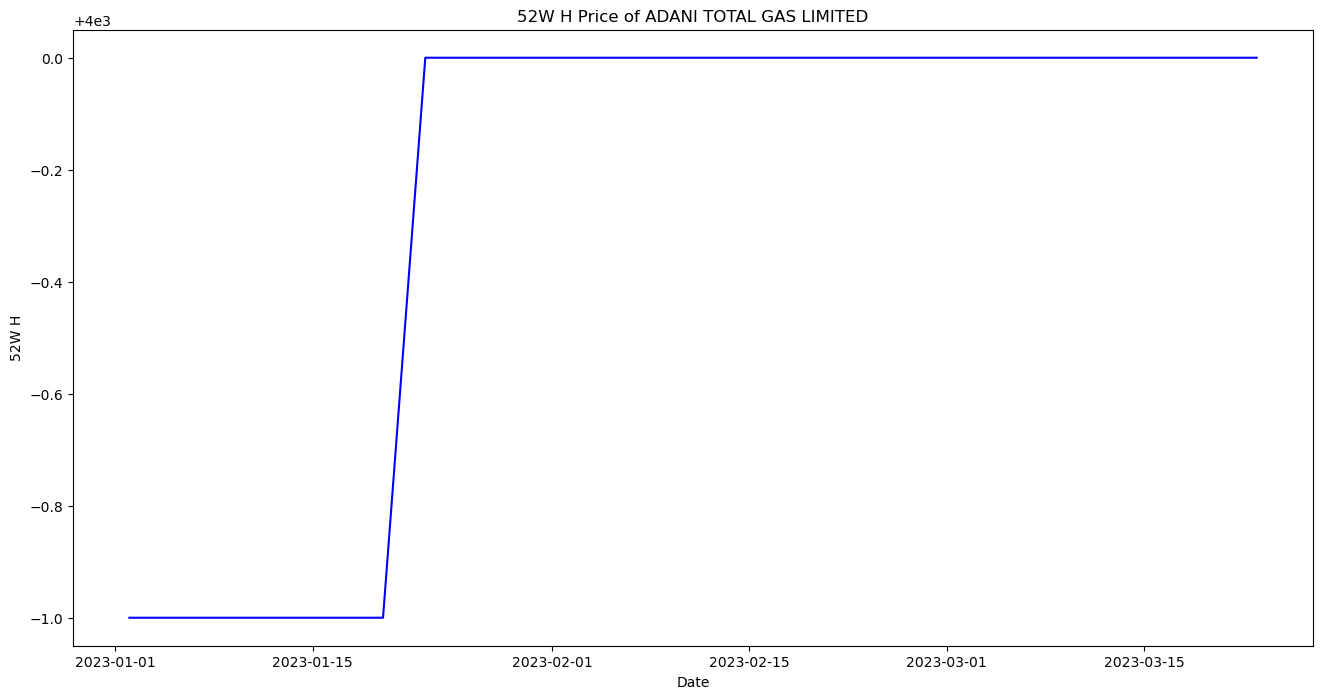

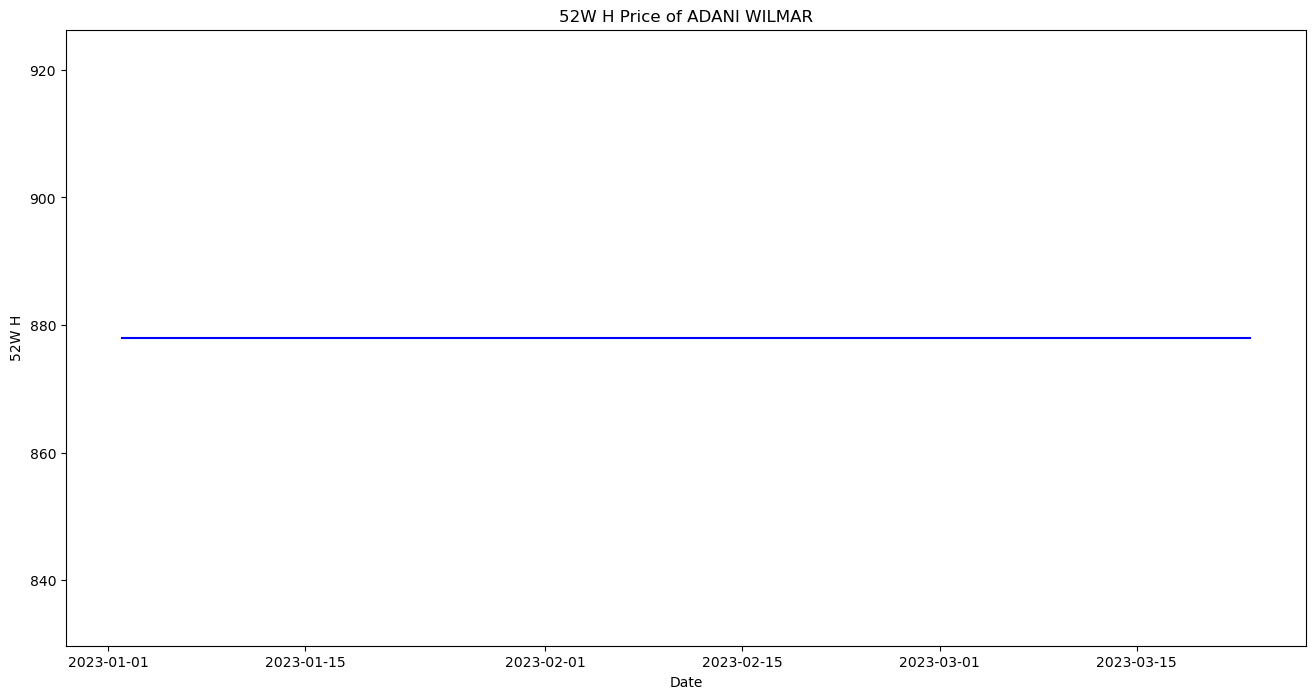





Showing stock trends for 52W L price






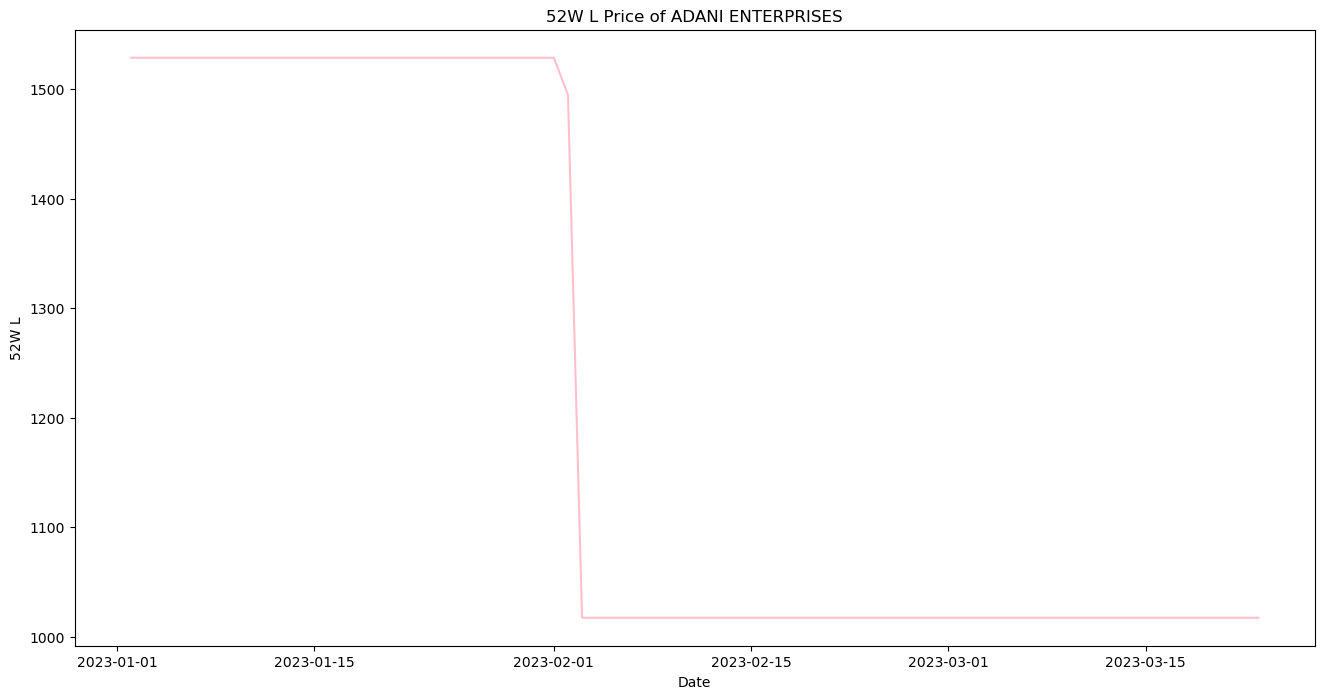

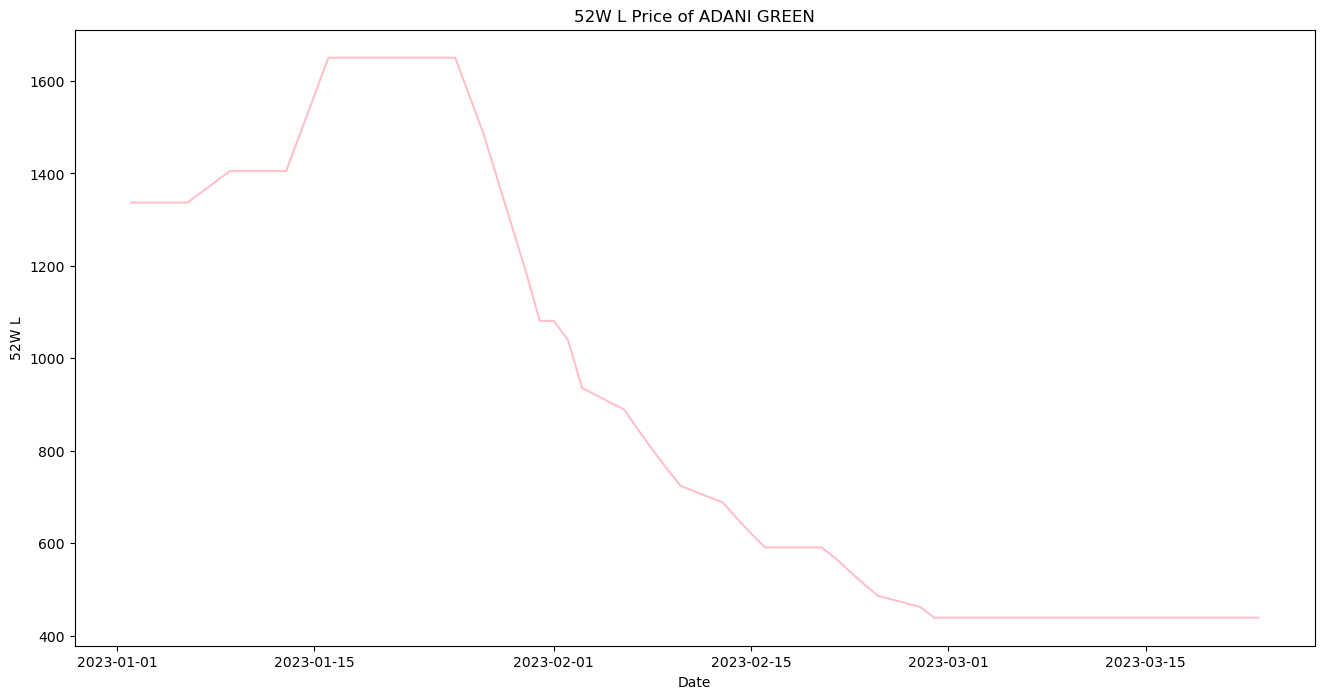

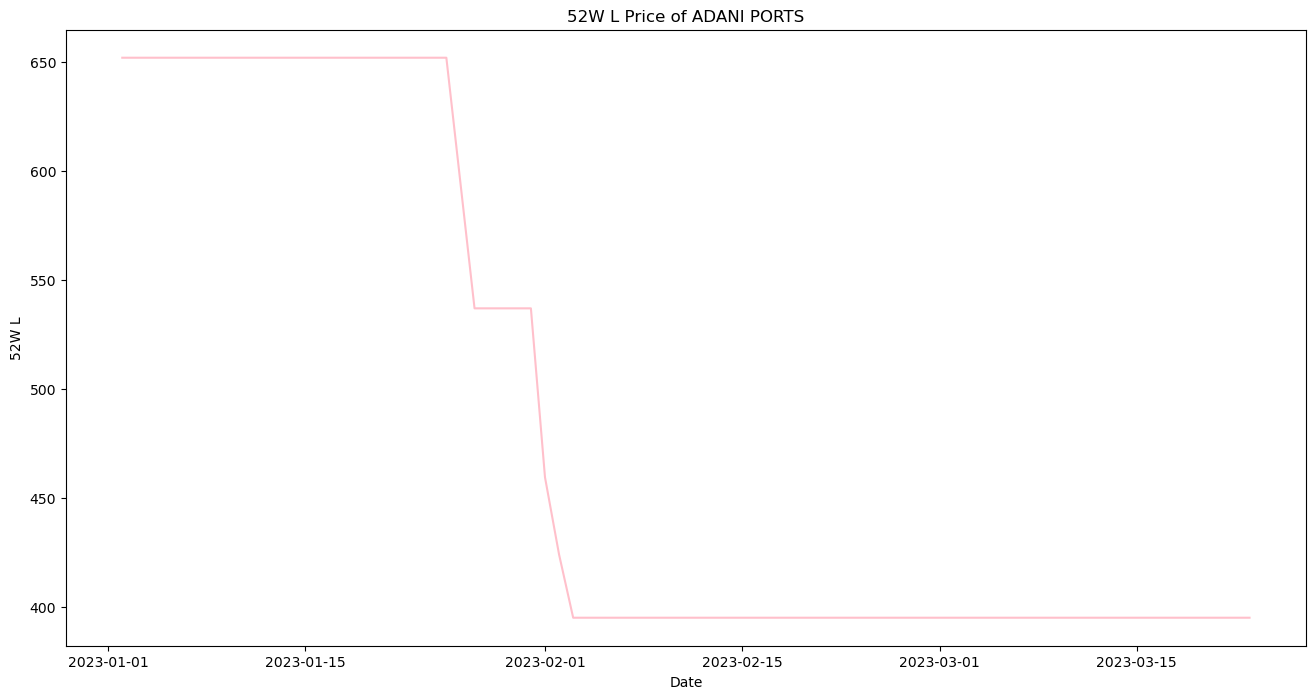

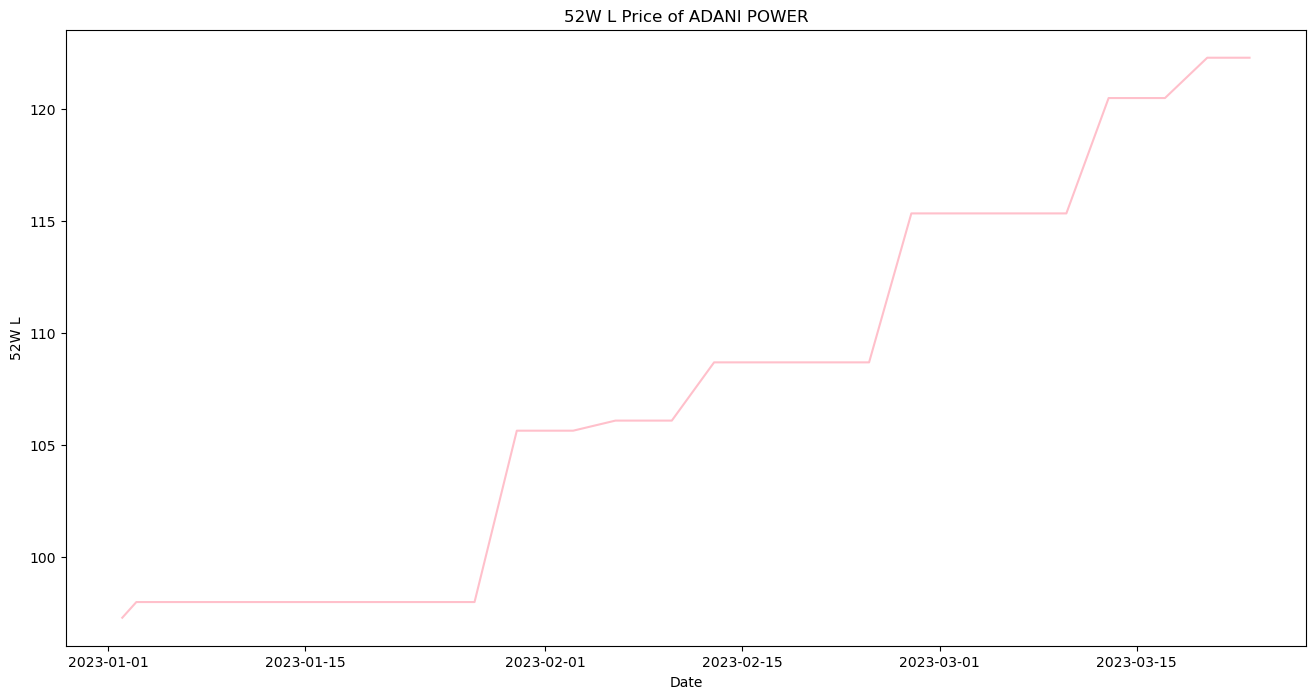

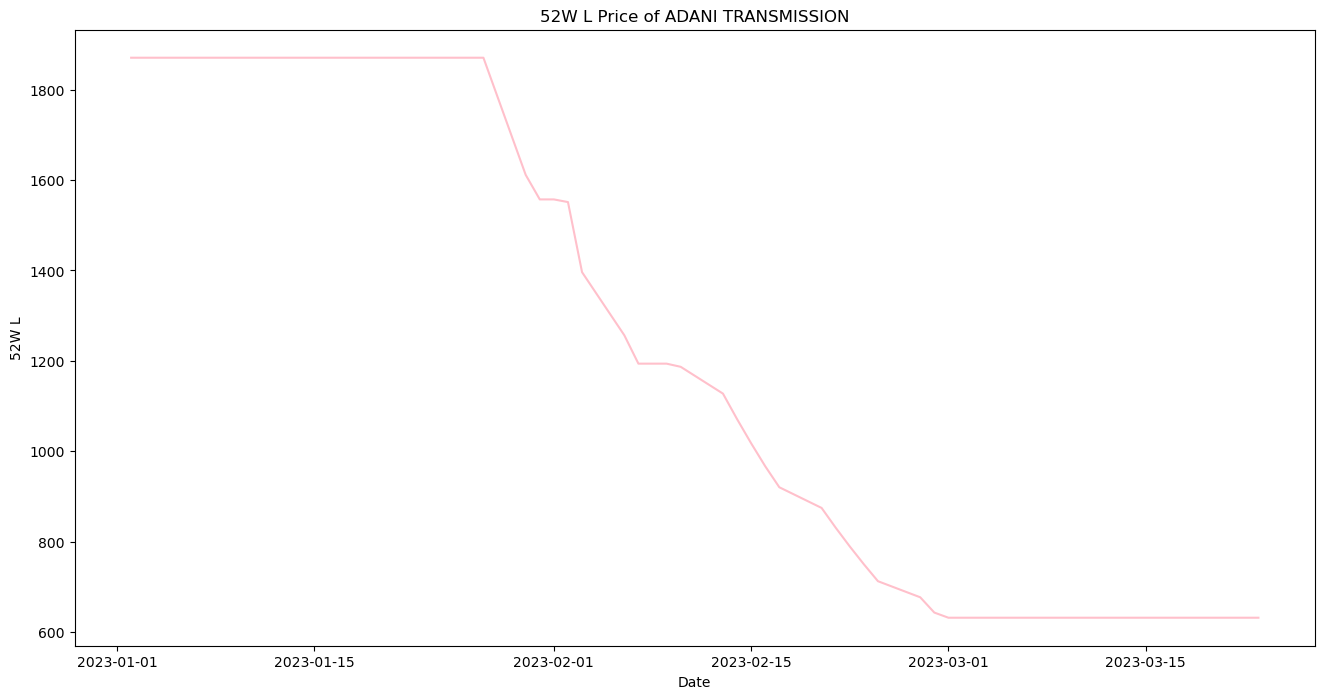

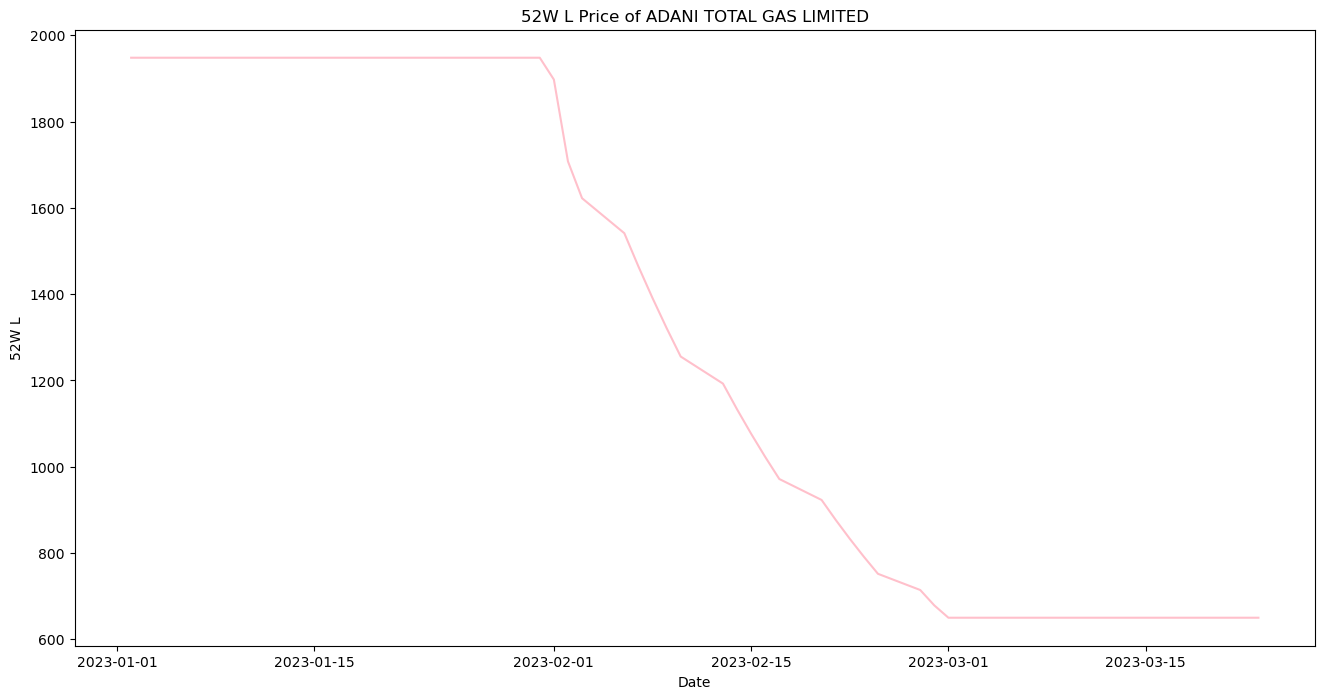

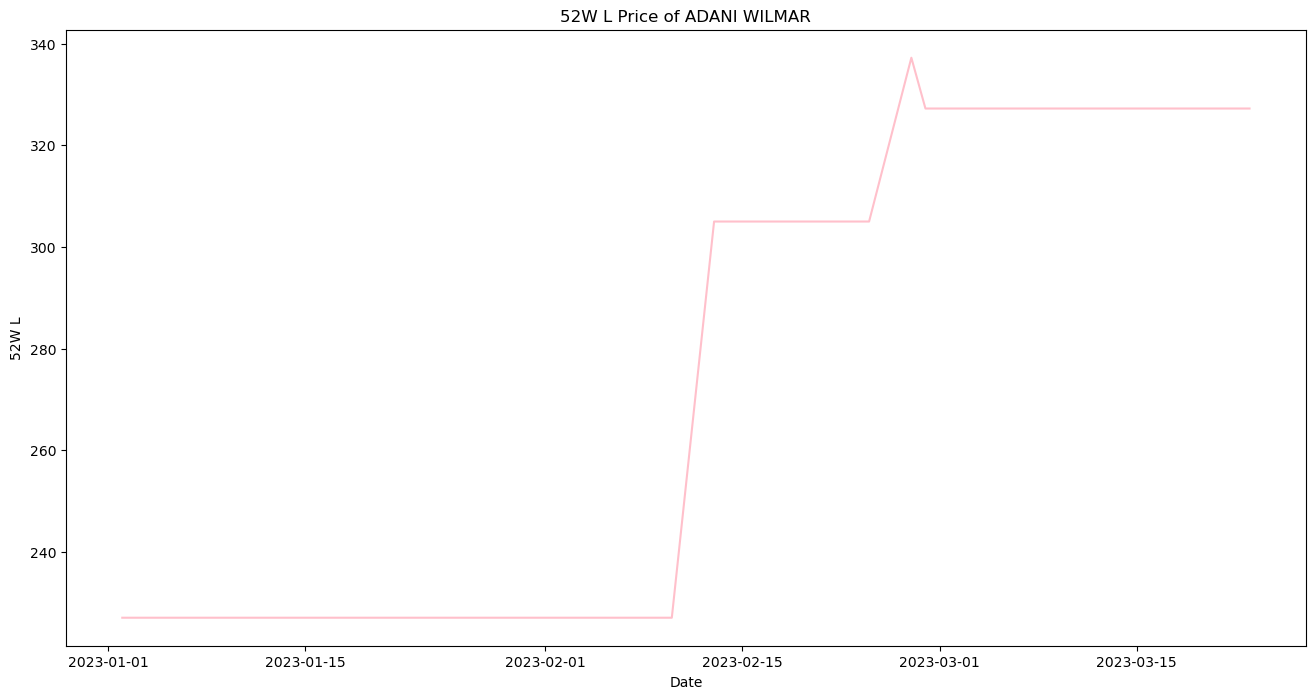

In [30]:
plist=['OPEN','HIGH','LOW','close','PREV. CLOSE','ltp','vwap','52W H','52W L']
for i in plist:
    print('\n\n\n')
    print("Showing stock trends for "+i.upper()+" price")
    print('\n\n\n')
    price(df1,'ADANI ENTERPRISES',i)
    price(df2,'ADANI GREEN',i)
    price(df3,'ADANI PORTS',i)  
    price(df4,'ADANI POWER',i)
    price(df5,'ADANI TRANSMISSION',i)
    price(df6,'ADANI TOTAL GAS LIMITED',i)
    price(df7,'ADANI WILMAR',i)
    

**A comparitive analysis of the high and low prices of stock over the years showing change in the daily range of trading.**

In [31]:
def high_low(df,cmp_name):
    plt.figure(figsize=(20,8))
    df['Daily Range']= df['HIGH']-df['LOW']
    plt.plot(df['Date'],df['Daily Range'],c='blue')
    plt.xlabel("Years")
    plt.ylabel("Stock Price Trading Range") 
    plt.title("Daily Stock Price Range for "+cmp_name)
    plt.show()

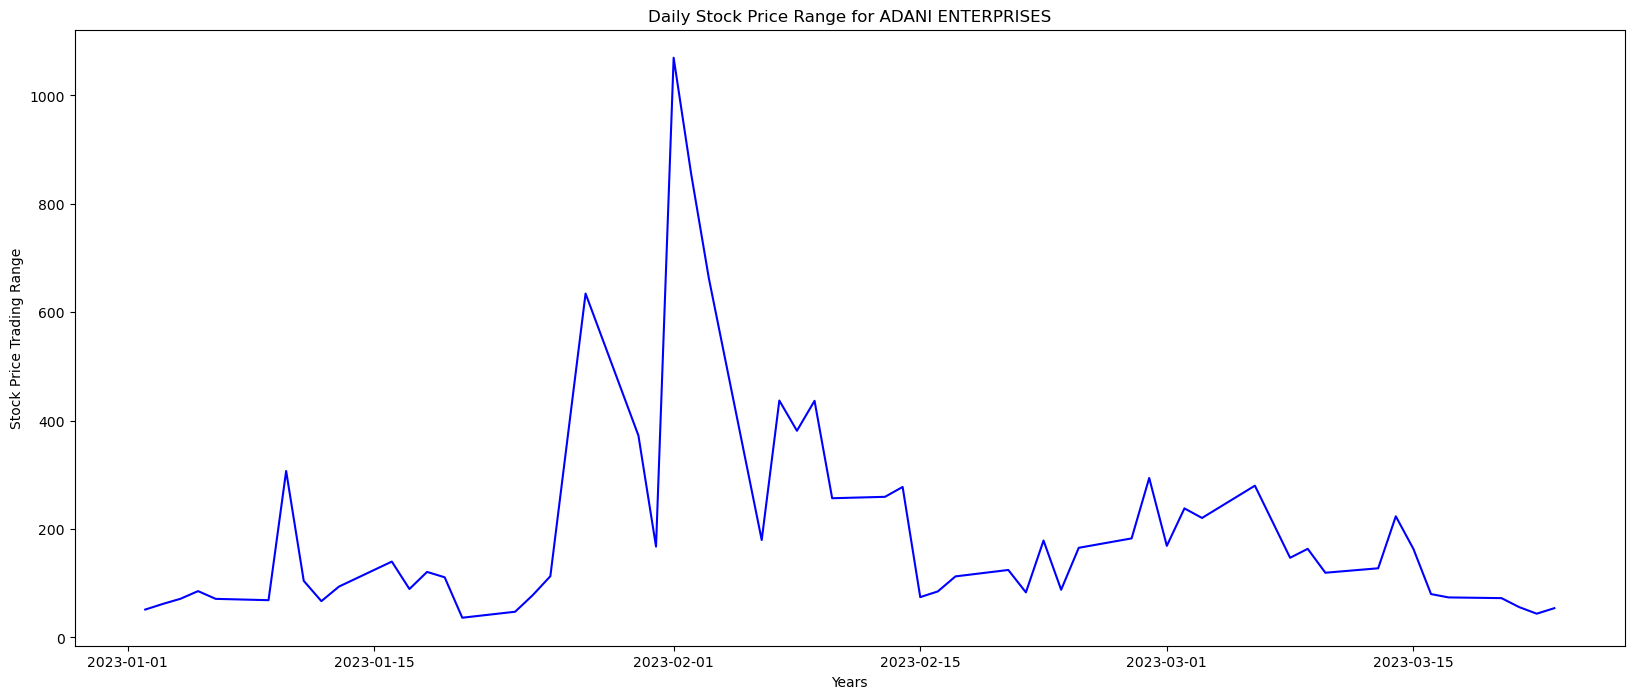

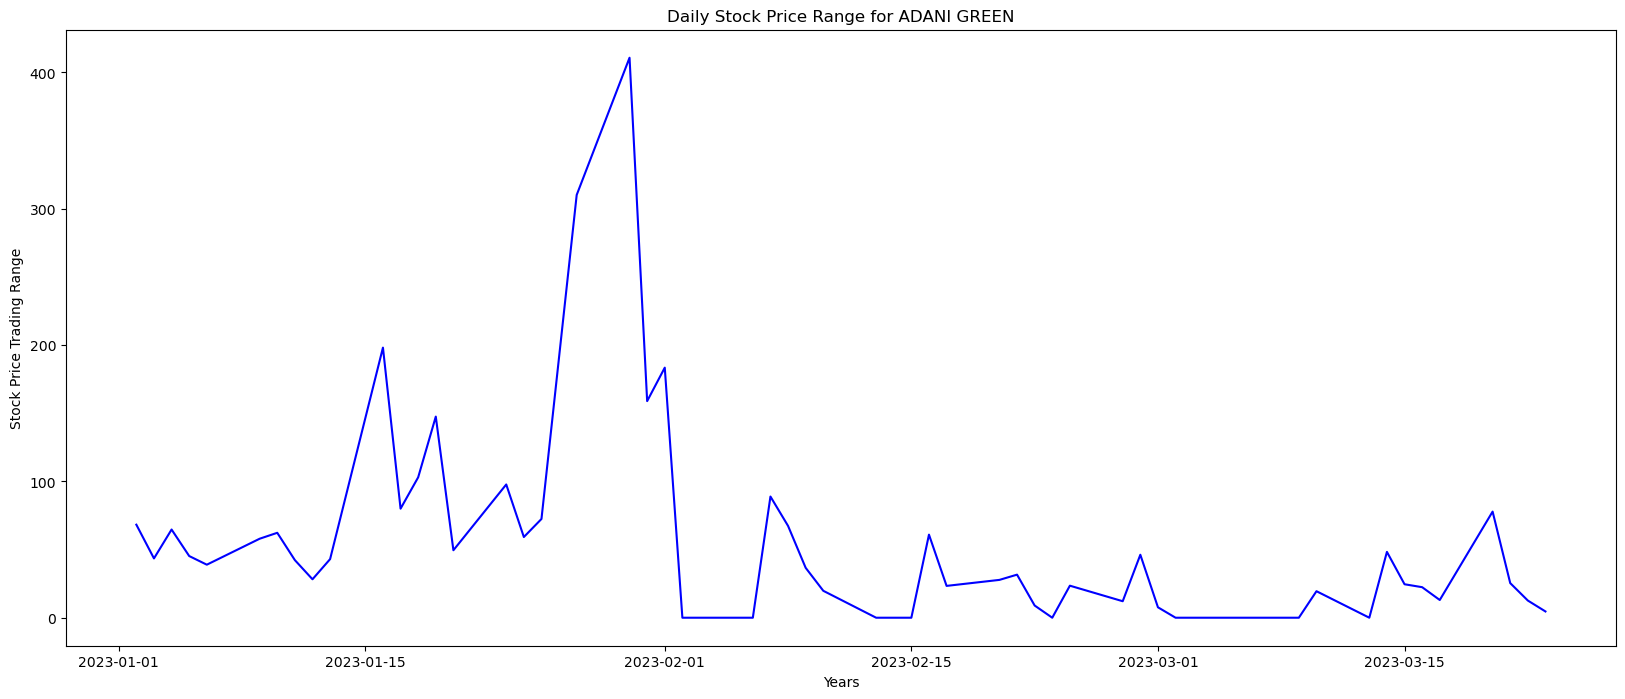

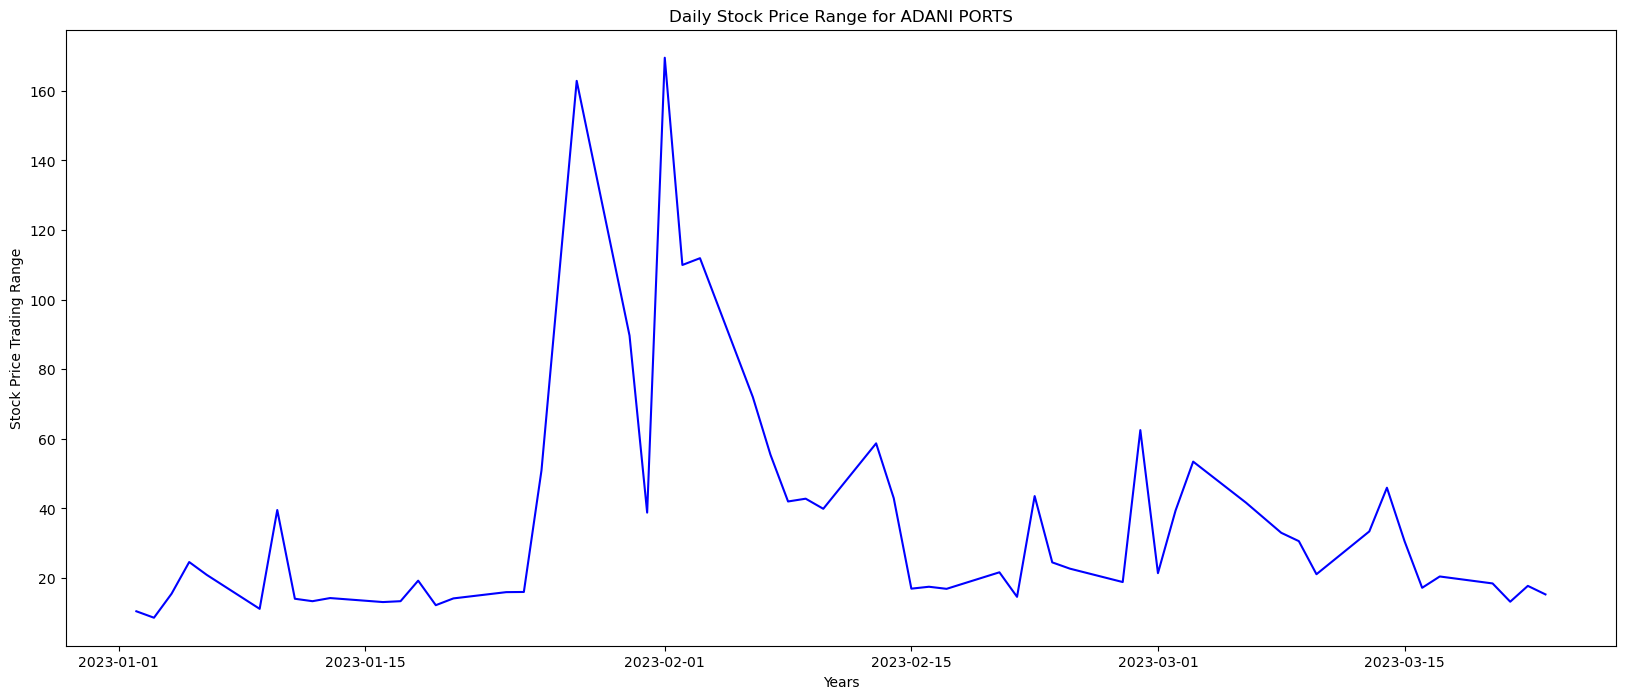

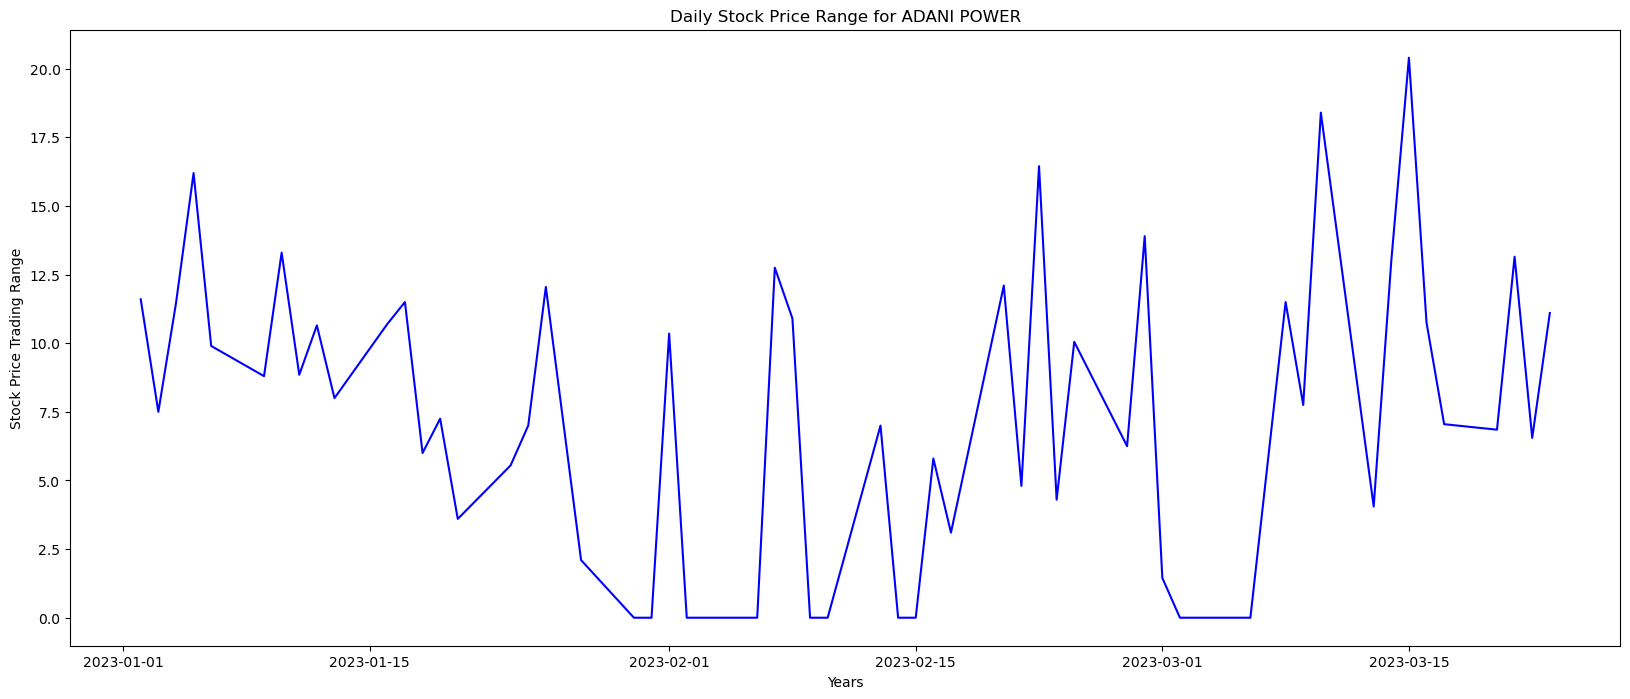

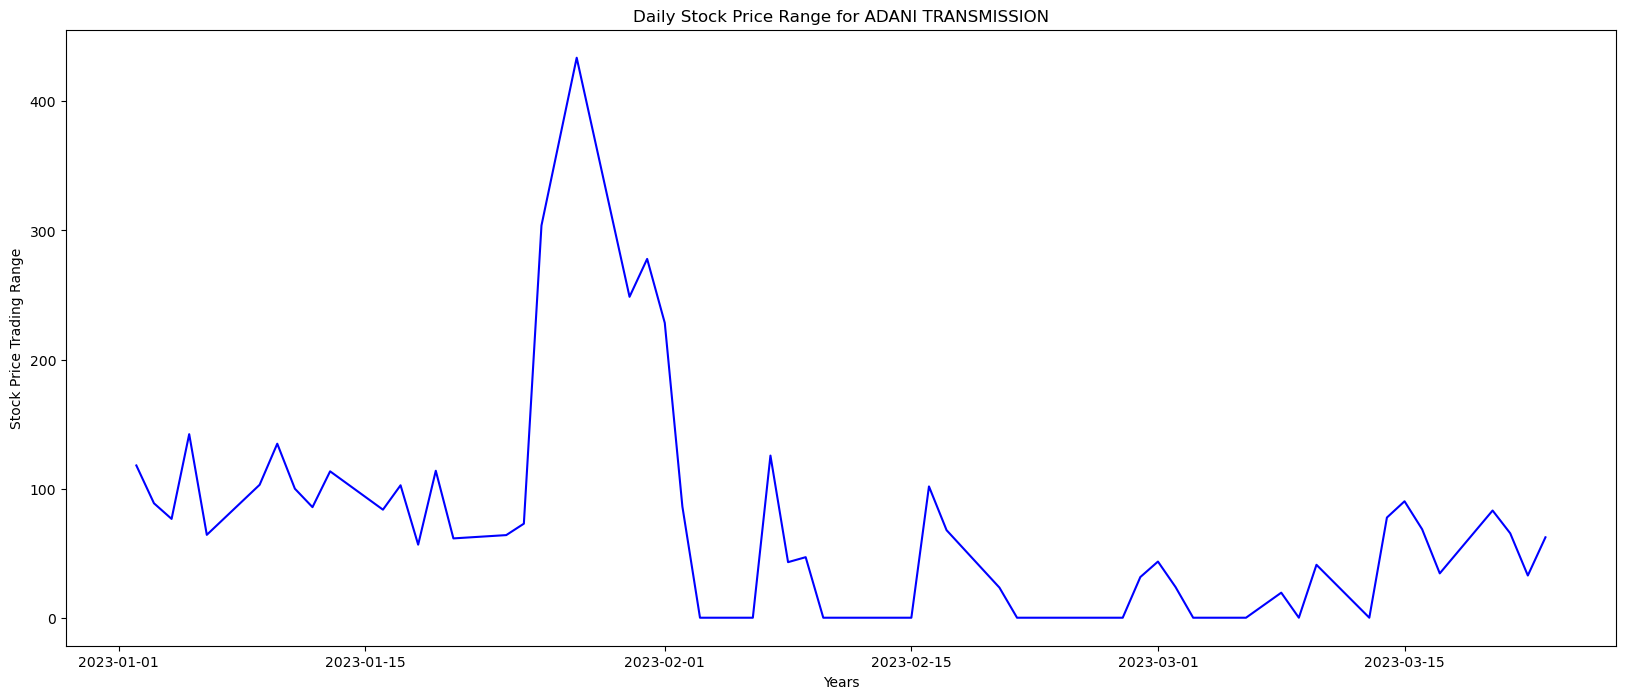

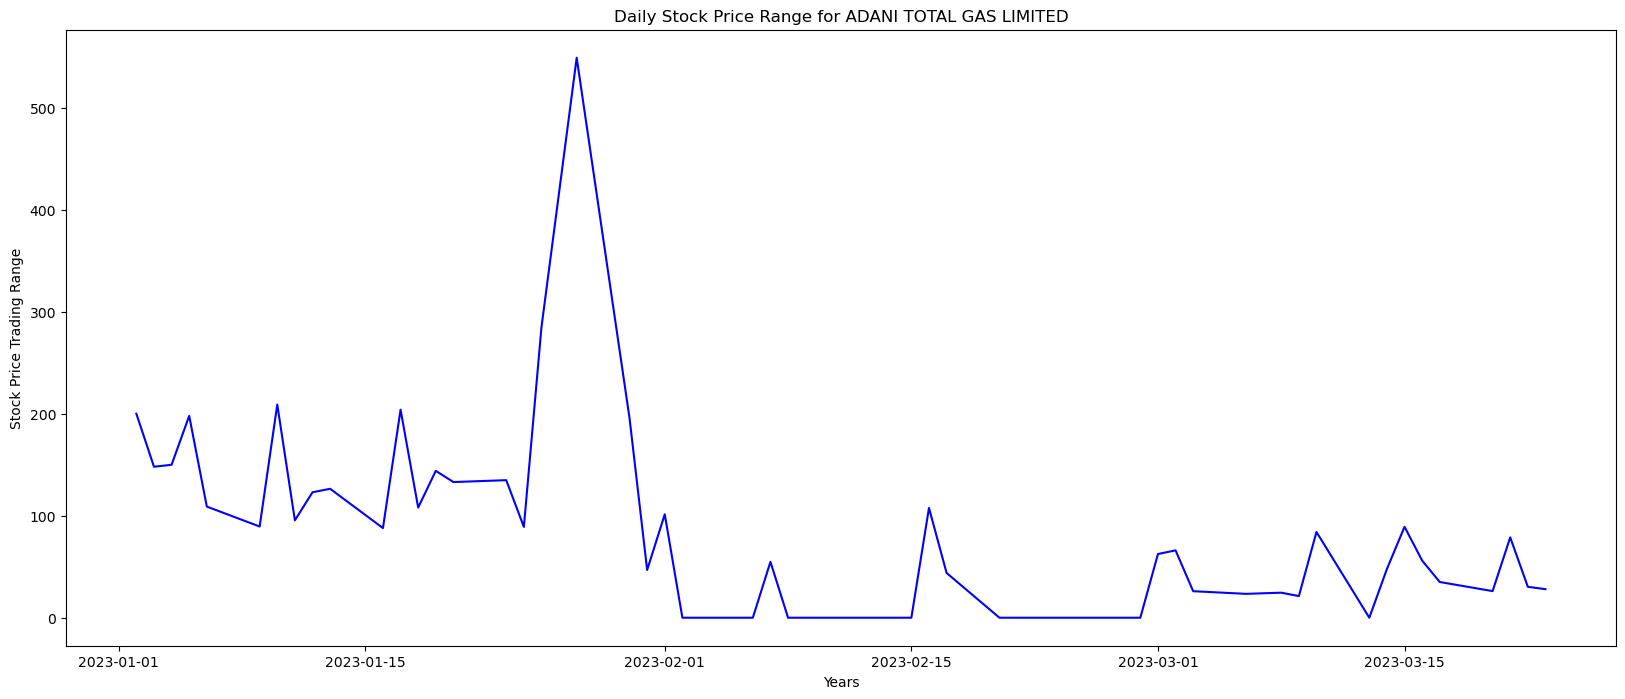

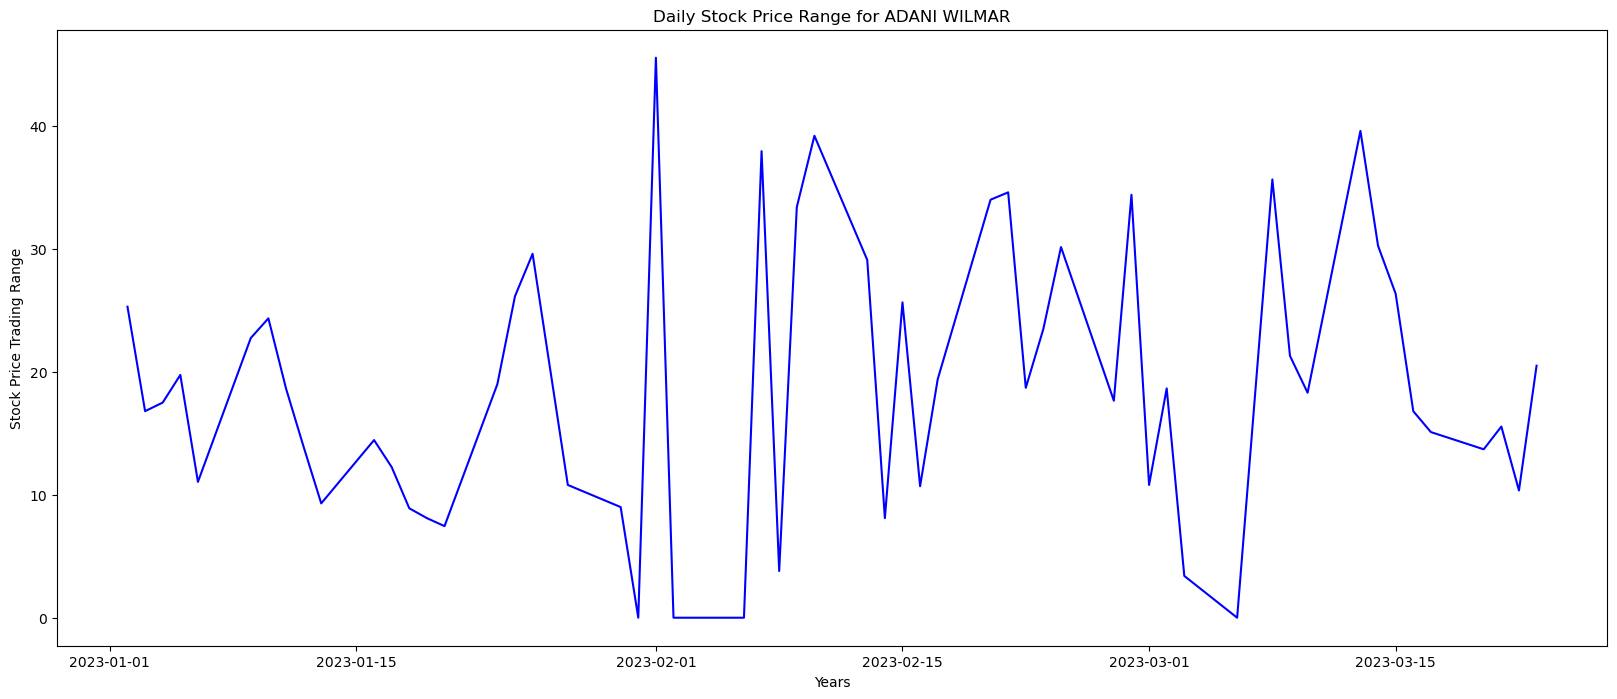

In [32]:
high_low(df1,'ADANI ENTERPRISES')
high_low(df2,'ADANI GREEN')
high_low(df3,'ADANI PORTS')
high_low(df4,'ADANI POWER')
high_low(df5,'ADANI TRANSMISSION')
high_low(df6,'ADANI TOTAL GAS LIMITED')
high_low(df7,'ADANI WILMAR')

**DAILY FLUCTUATIONS**

In [33]:
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [34]:
def compare_hcl(df,name):
    fig=px.line(df,x='Date',y=['close','HIGH','LOW'],
            template='plotly_dark',
            color_discrete_sequence=['red','orange','blue'],
            title='{} Stock Price Over Time for'.format(name)
               )
    fig.show()

In [35]:
compare_hcl(df1,'ADANI ENTERPRISES')
compare_hcl(df2,'ADANI GREEN')
compare_hcl(df3,'ADANI PORTS')
compare_hcl(df4,'ADANI POWER')
compare_hcl(df5,'ADANI TRANSMISSION')
compare_hcl(df6,'ADANI TOTAL GAS LIMITED')
compare_hcl(df7,'ADANI WILMAR')

In [36]:
df1.head()

Date series     OPEN     HIGH      LOW  PREV. CLOSE  \
Company                                                                       
ADANI ENTERPRISES 2023-03-23     EQ  1794.00  1834.00  1780.00      1815.40   
ADANI ENTERPRISES 2023-03-22     EQ  1834.00  1850.00  1806.15      1824.25   
ADANI ENTERPRISES 2023-03-21     EQ  1836.95  1861.00  1804.95      1804.95   
ADANI ENTERPRISES 2023-03-20     EQ  1837.00  1849.95  1777.40      1876.55   
ADANI ENTERPRISES 2023-03-17     EQ  1901.00  1918.85  1845.00      1843.80   

                       ltp    close     vwap   52W H    52W L   VOLUME  \
Company                                                                  
ADANI ENTERPRISES  1800.00  1794.00  1806.17  4190.0  1017.45  4108804   
ADANI ENTERPRISES  1809.35  1815.40  1825.77  4190.0  1017.45  3248124   
ADANI ENTERPRISES  1821.50  1824.25  1829.30  4190.0  1017.45  4094018   
ADANI ENTERPRISES  1812.00  1804.95  1805.76  4190.0  1017.45  5168139   
ADANI ENTERPRISES  1874.00  1876.55  1870.80  4190.0  1017.45  5969594   

                          VALUE  No of trades  Daily Range  
Company                                                     
ADANI ENTERPRISES  7.421203e+09        169920        54.00  
ADANI ENTERPRISES  5.930336e+09        130781        43.85  
ADANI ENTERPRISES  7.489200e+09        158108        56.05  
ADANI ENTERPRISES  9.332430e+09        227261        72.55  
ADANI ENTERPRISES  1.116794e+10        263971        73.85

**Analysing the Daily Returns on Stock**

In [37]:
def daily_returns(df,cmp_name):
    df['Daily Return'] = df['close'].pct_change() 
    
    plt.figure(figsize=(20, 10)) 
    df['Daily Return'].hist(bins=40)
    plt.xlabel('Daily Return')
    plt.title('Dialy Returns On '+cmp_name)
    plt.show()

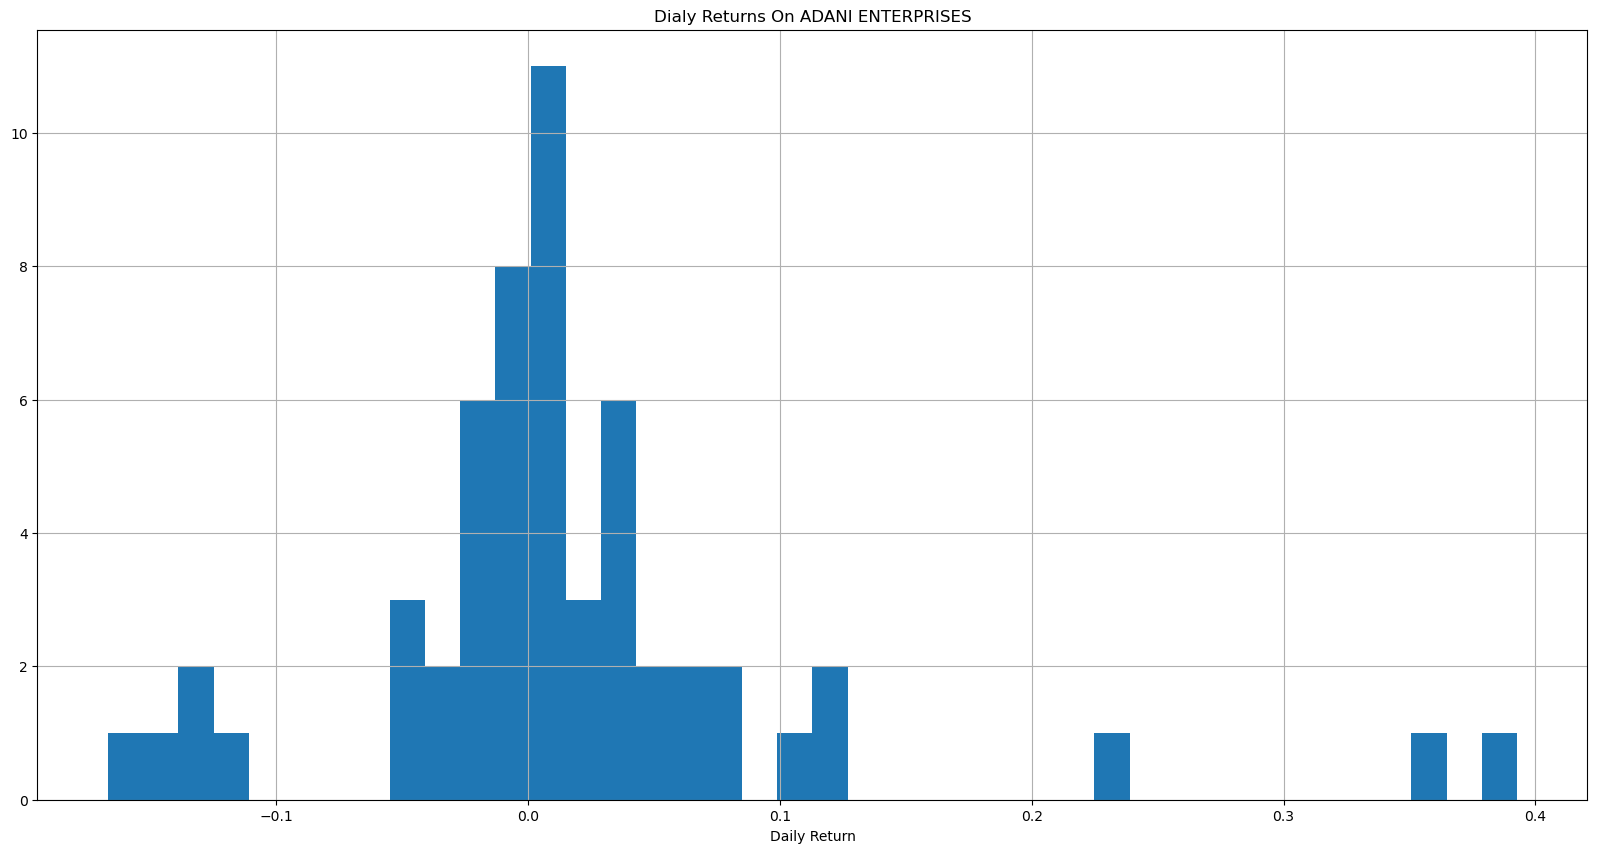

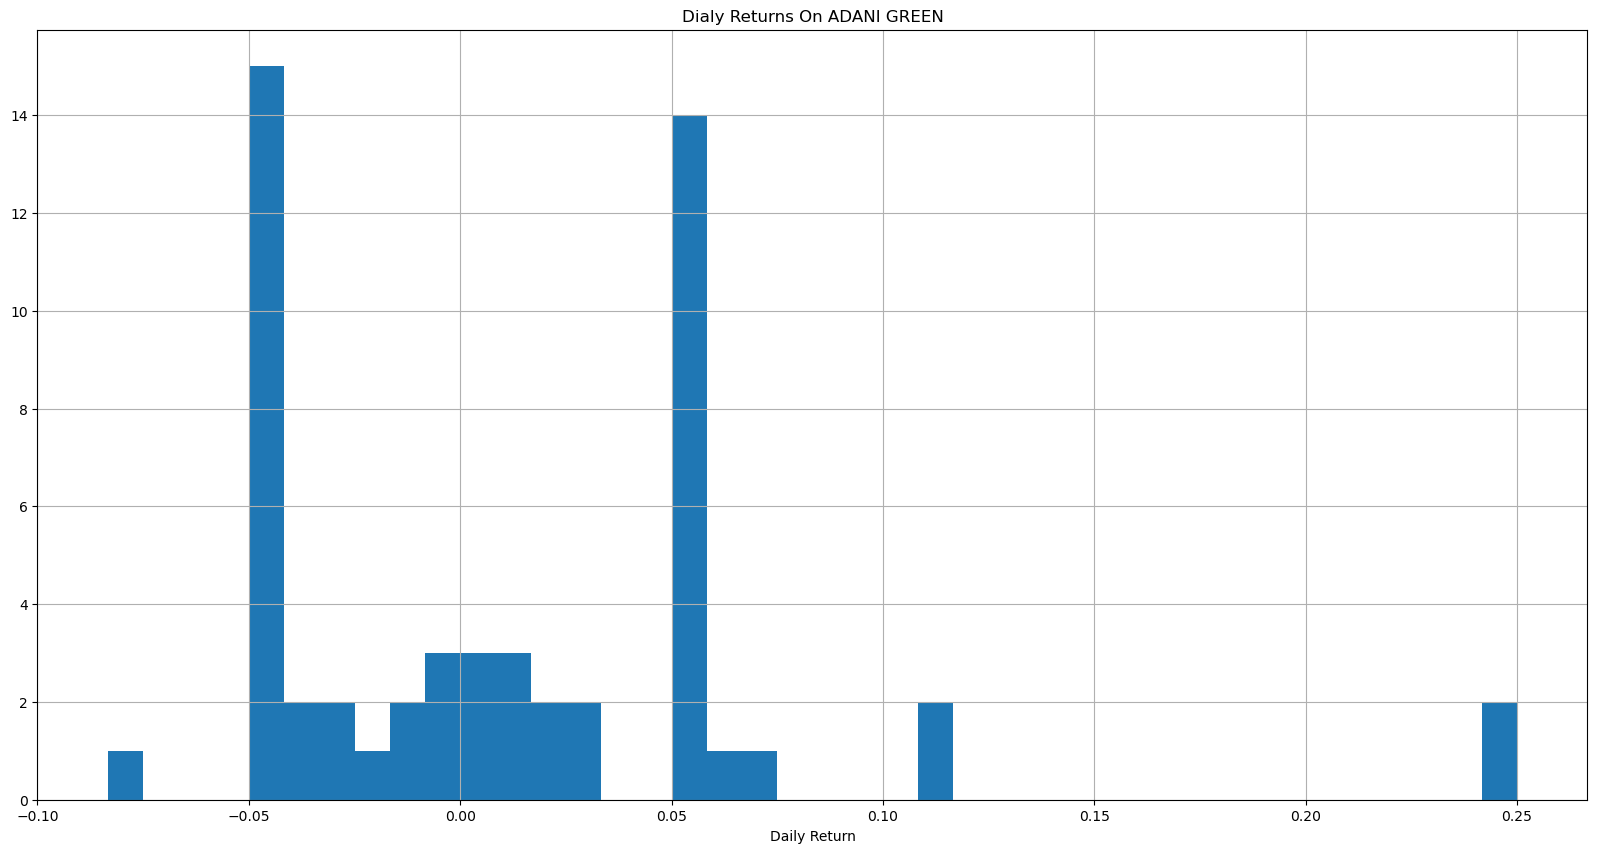

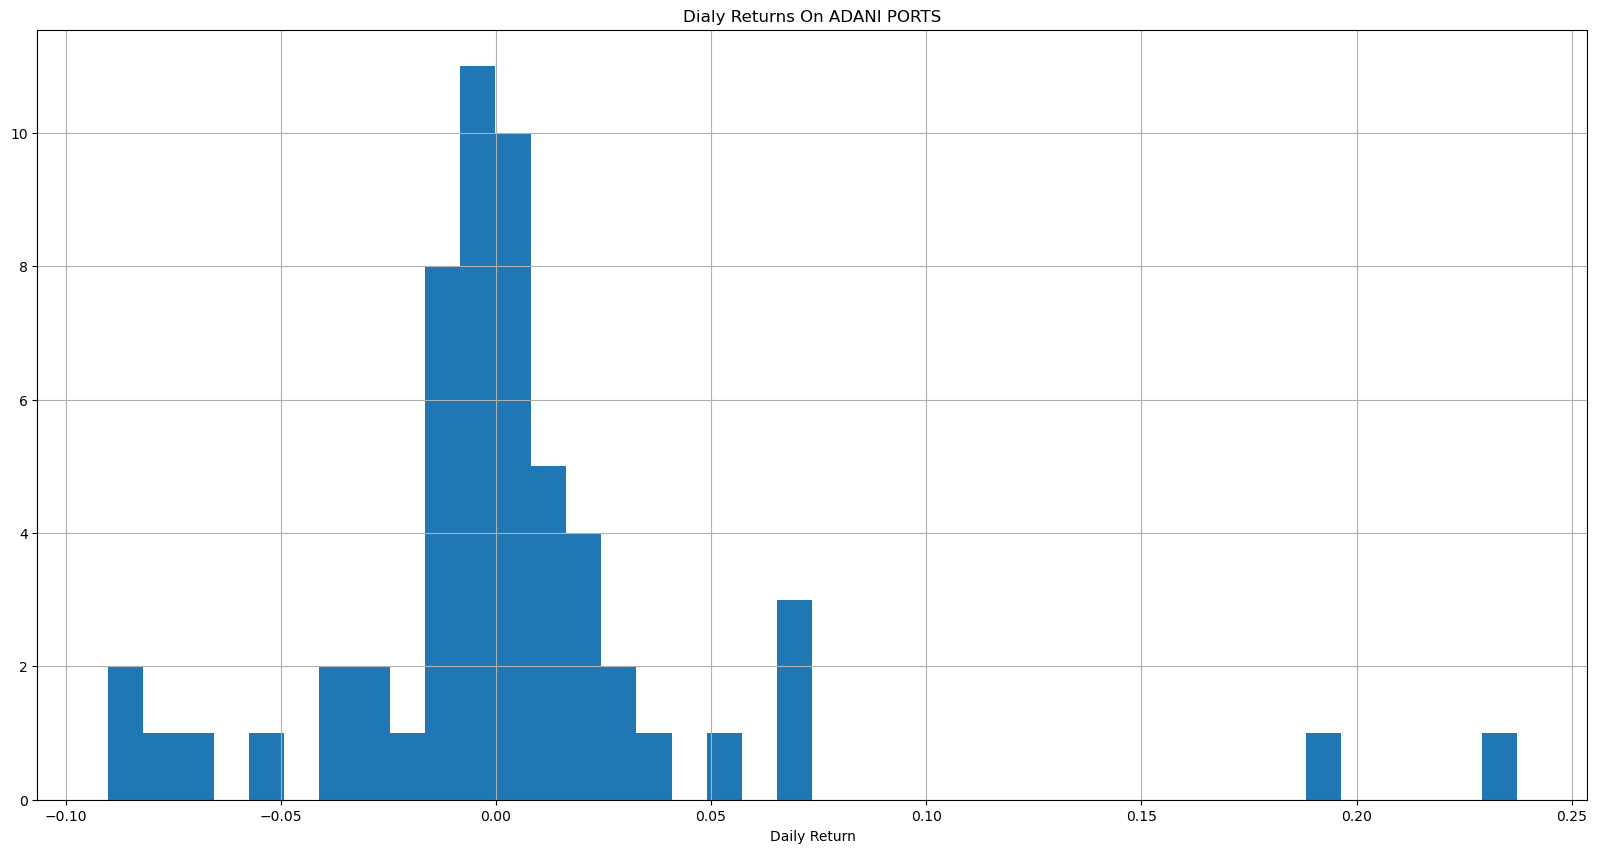

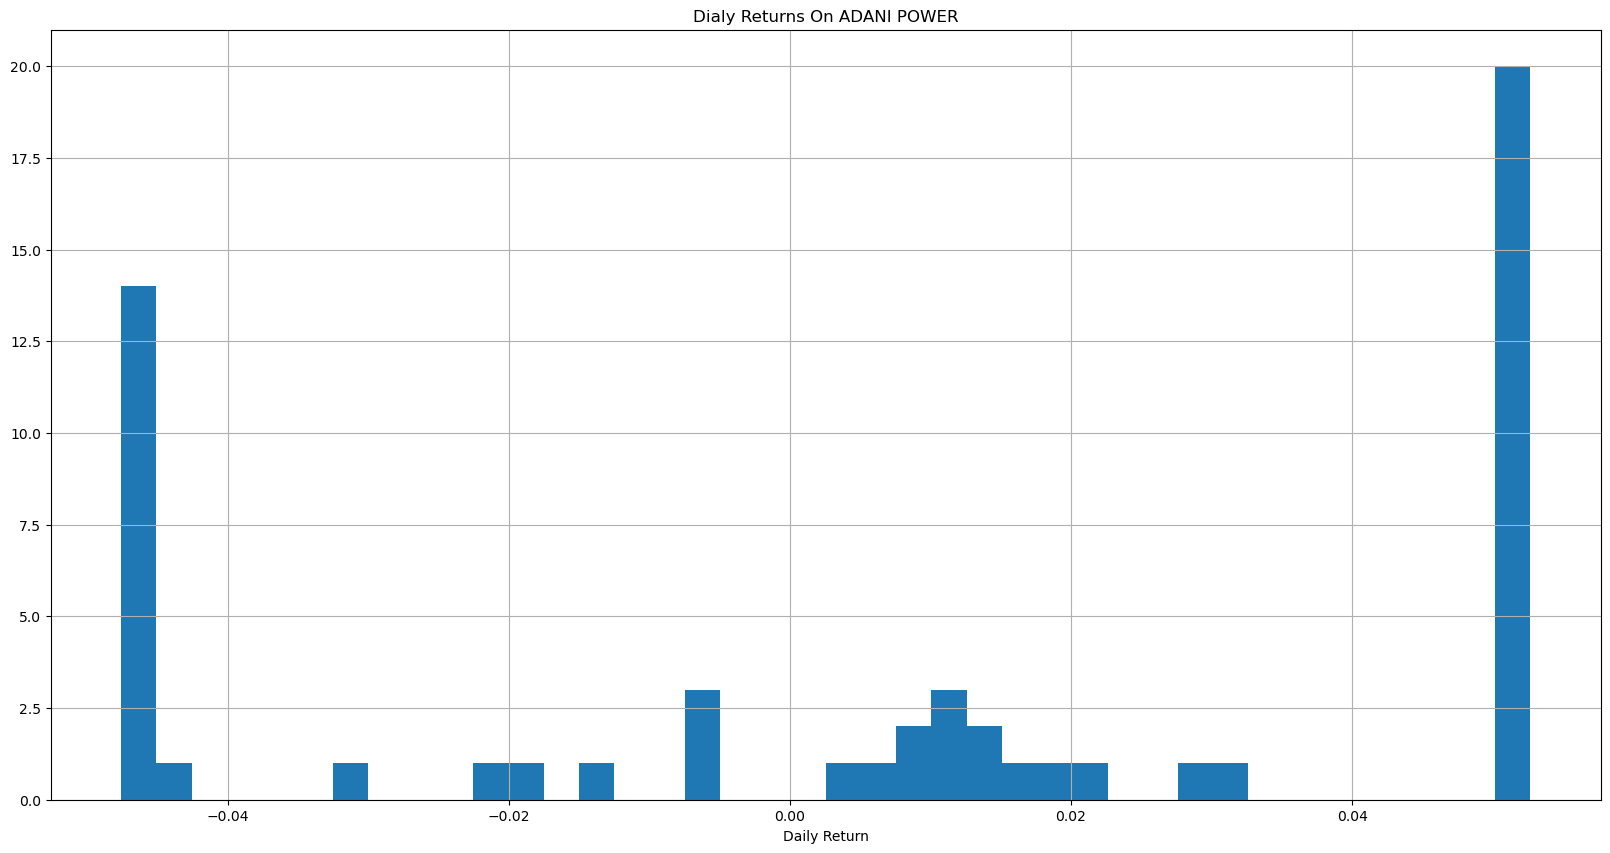

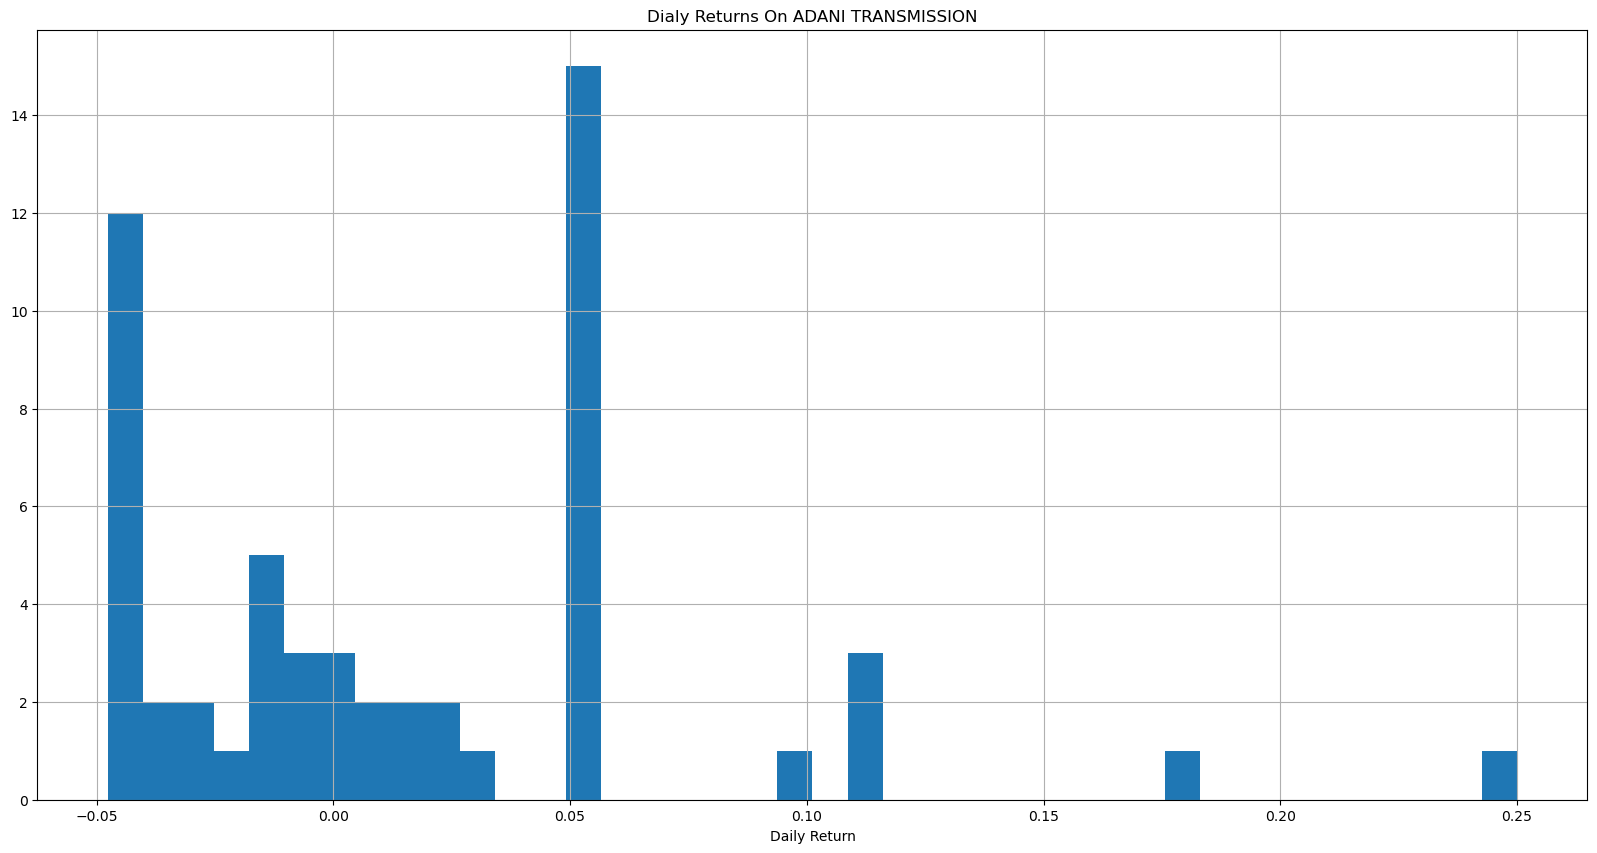

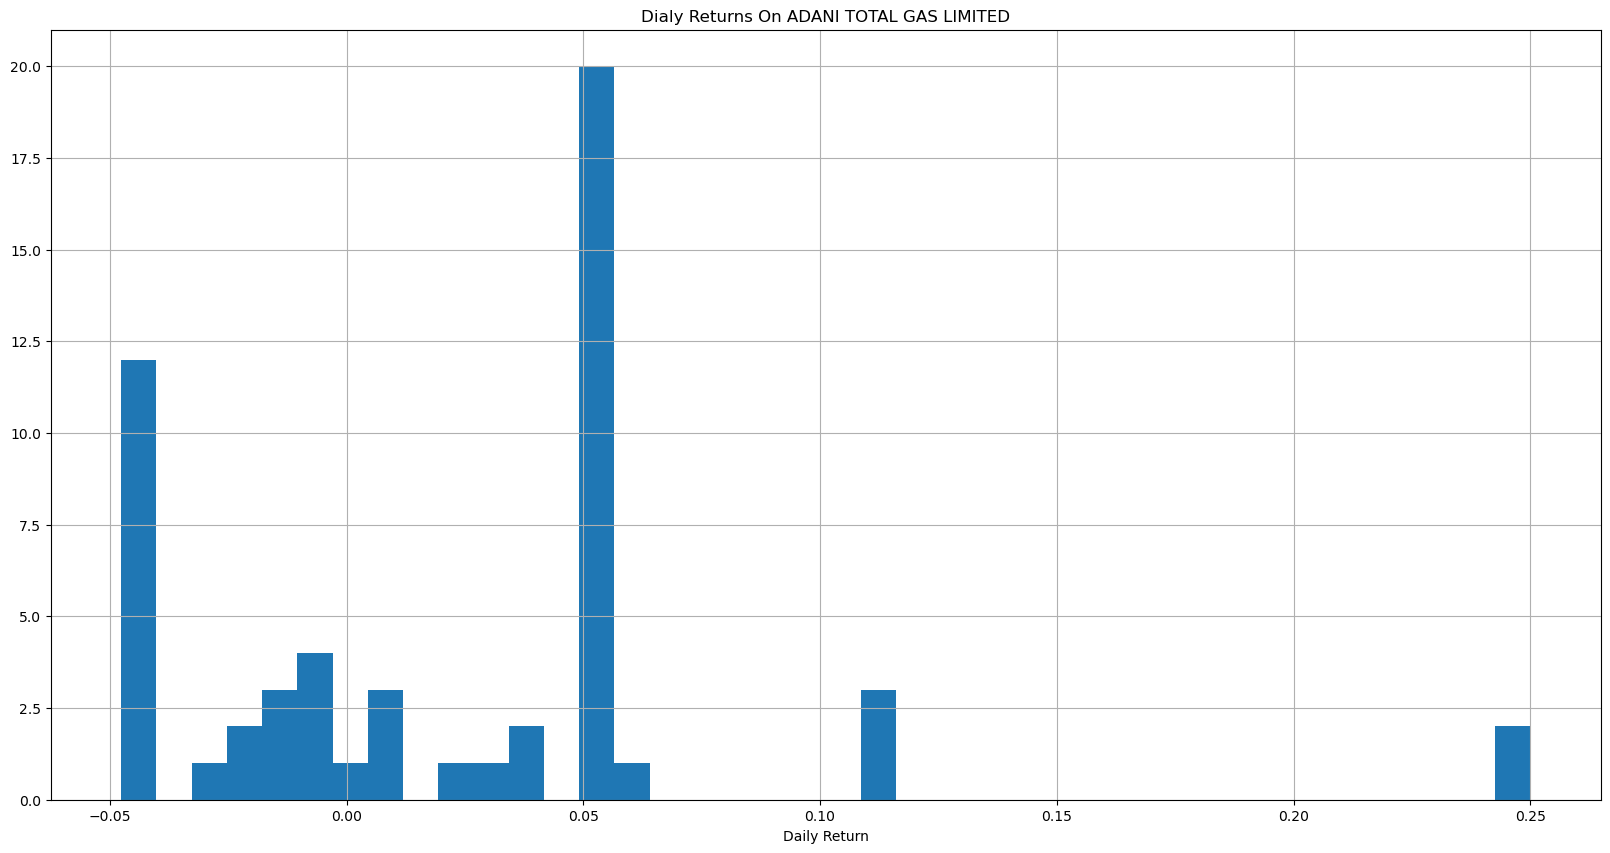

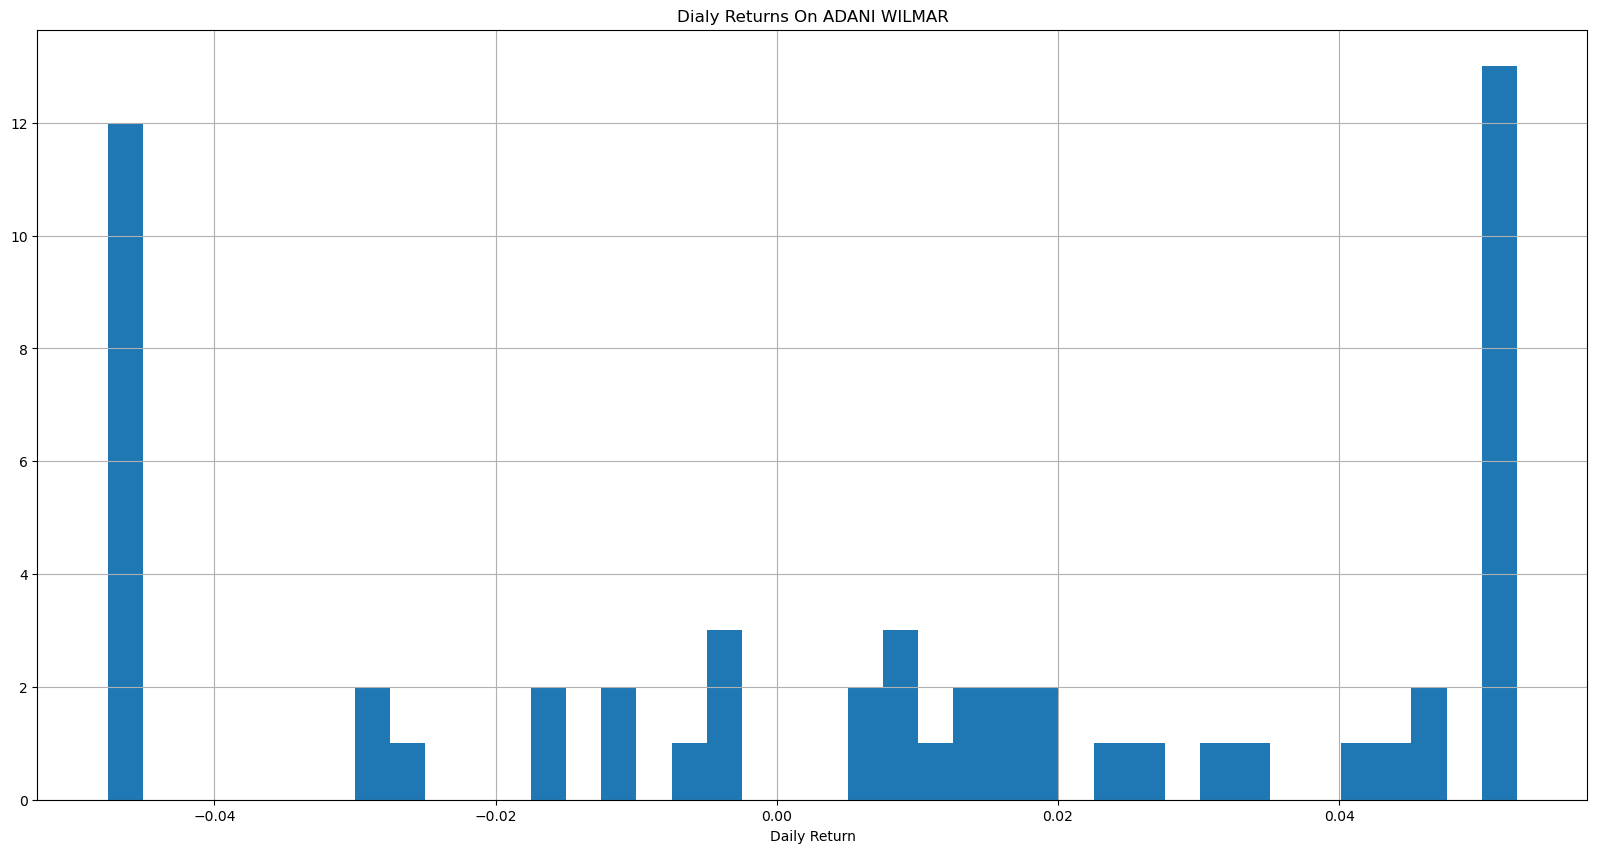

In [38]:
daily_returns(df1,'ADANI ENTERPRISES')
daily_returns(df2,'ADANI GREEN')
daily_returns(df3,'ADANI PORTS')
daily_returns(df4,'ADANI POWER')
daily_returns(df5,'ADANI TRANSMISSION')
daily_returns(df6,'ADANI TOTAL GAS LIMITED')
daily_returns(df7,'ADANI WILMAR')

In [39]:
def daily_exch(df,name):

    fig=px.histogram(df,x='Date',y='No of trades',
                     template='plotly_dark',
                     nbins=53,
                     color_discrete_sequence=['rgb(229,134,6)'],
                     title='{} Volume (Transactions)'.format(name))
    fig.show()  
    

In [40]:
daily_exch(df1,'ADANI ENTERPRISES')
daily_exch(df2,'ADANI GREEN')
daily_exch(df3,'ADANI PORTS')
daily_exch(df4,'ADANI POWER')
daily_exch(df5,'ADANI TRANSMISSION')
daily_exch(df6,'ADANI TOTAL GAS LIMITED')
daily_exch(df7,'ADANI WILMAR')

**Analysing change in the turnover**

In [41]:
def val_change(df,name):
    fig=px.line(df,x='Date',y='VALUE',
                     template='plotly_dark',
                     color_discrete_sequence=['plum'],
                     title='{} Turnover Over Time'.format(name)
               )
    fig.show()

In [42]:
val_change(df1,'ADANI ENTERPRISES')
val_change(df2,'ADANI GREEN')
val_change(df3,'ADANI PORTS')
val_change(df4,'ADANI POWER')
val_change(df5,'ADANI TRANSMISSION')
val_change(df6,'ADANI TOTAL GAS LIMITED')
val_change(df7,'ADANI WILMAR')

**Comparing Stock Prices of ADANI Group Companies**

In [43]:
def new_df(ptype):
    dfs=['ADANI ENTERPRISES','ADANI GREEN','ADANI PORTS','ADANI POWER',
         'ADANI TRANSMISSION','ADANI TOTAL GAS LIMTED','ADANI WILMAR']
    dict={}
    ds=[df1,df2,df3,df4,df5,df6,df7]
    for i in dfs:
        dict[i]=0
    for i in range(len(dfs)):
        dict[dfs[i]]=ds[i][ptype].mean()
    df=pd.DataFrame(dict,index=['value'])
    df_n = df.T
    df_n.index.names=['Company']
    
    #df_n['serial']=[0,1,2,3,4,5,6]
    
    #df_n.set_index("serial", drop=False, inplace = True)
    #df_n[df_n.columns[0]].rename('Company',inplace=True)
    return df_n

In [44]:
df_open=new_df('OPEN')
df_close=new_df('close')
df_high=new_df('HIGH')
df_low=new_df('LOW')
df_vol=new_df('No of trades')

In [45]:
df_open

value
Company                            
ADANI ENTERPRISES       2442.472807
ADANI GREEN             1138.111404
ADANI PORTS              670.522414
ADANI POWER              213.350000
ADANI TRANSMISSION      1562.172807
ADANI TOTAL GAS LIMTED  1964.493860
ADANI WILMAR             470.638596

In [46]:
df_close

value
Company                            
ADANI ENTERPRISES       2401.454386
ADANI GREEN             1127.583333
ADANI PORTS              665.356897
ADANI POWER              212.738596
ADANI TRANSMISSION      1557.320175
ADANI TOTAL GAS LIMTED  1952.692105
ADANI WILMAR             467.806140

In [47]:
df_high

value
Company                            
ADANI ENTERPRISES       2511.117544
ADANI GREEN             1162.738596
ADANI PORTS              684.631034
ADANI POWER              216.835088
ADANI TRANSMISSION      1595.598246
ADANI TOTAL GAS LIMTED  1997.289474
ADANI WILMAR             479.050000

In [48]:
df_low

value
Company                            
ADANI ENTERPRISES       2312.362281
ADANI GREEN             1108.914035
ADANI PORTS              648.113793
ADANI POWER              209.435965
ADANI TRANSMISSION      1521.180702
ADANI TOTAL GAS LIMTED  1919.543860
ADANI WILMAR             460.327193

In [49]:
df_vol

value
Company                              
ADANI ENTERPRISES       440808.105263
ADANI GREEN              96292.122807
ADANI PORTS             267303.724138
ADANI POWER              75103.473684
ADANI TRANSMISSION       43115.245614
ADANI TOTAL GAS LIMTED   34984.982456
ADANI WILMAR             63106.438596

In [50]:
df_open.columns

Index(['value'], dtype='object')

In [51]:
def compare_(df,name):
    fig=px.histogram(df,x=df.index,y=['value'],
                     template='plotly_dark',
                     nbins=53,
                     color_discrete_sequence=['lavenderblush'],
                     title='comparison of '+name+' for Adani Group Companies'
                     )
    fig.show()


In [52]:
compare_(df_open,'opening price')
compare_(df_close,'closing price')
compare_(df_high,'peak price')
compare_(df_low,'lowest price')
compare_(df_vol,'trade volume')


In [53]:
def compare(price_type):
    plt.figure(figsize=(20,15))
   
    plt.plot(df1['Date'],df1[price_type], label = 'ADANI ENTERPRISES')
    plt.plot(df2['Date'], df2[price_type], label = "ADANI GREEN")
    plt.plot(df3['Date'],df3[price_type], label = "ADANI PORTS")
    plt.plot(df4['Date'], df4[price_type], label = "ADANI POWER")
    plt.plot(df5['Date'],df5[price_type], label = "ADANI TRANSMISSION")
    plt.plot(df6['Date'],df6[price_type], label = "ADANI TOTAL GAS LIMITED")
    plt.plot(df7['Date'],df7[price_type], label = "ADANI WILMAR")
    plt.legend()  
    plt.xlabel("Date")
    plt.ylabel(price_type+" Price") 
    plt.title(price_type +" Price Comparison of AGC")
    plt.show()

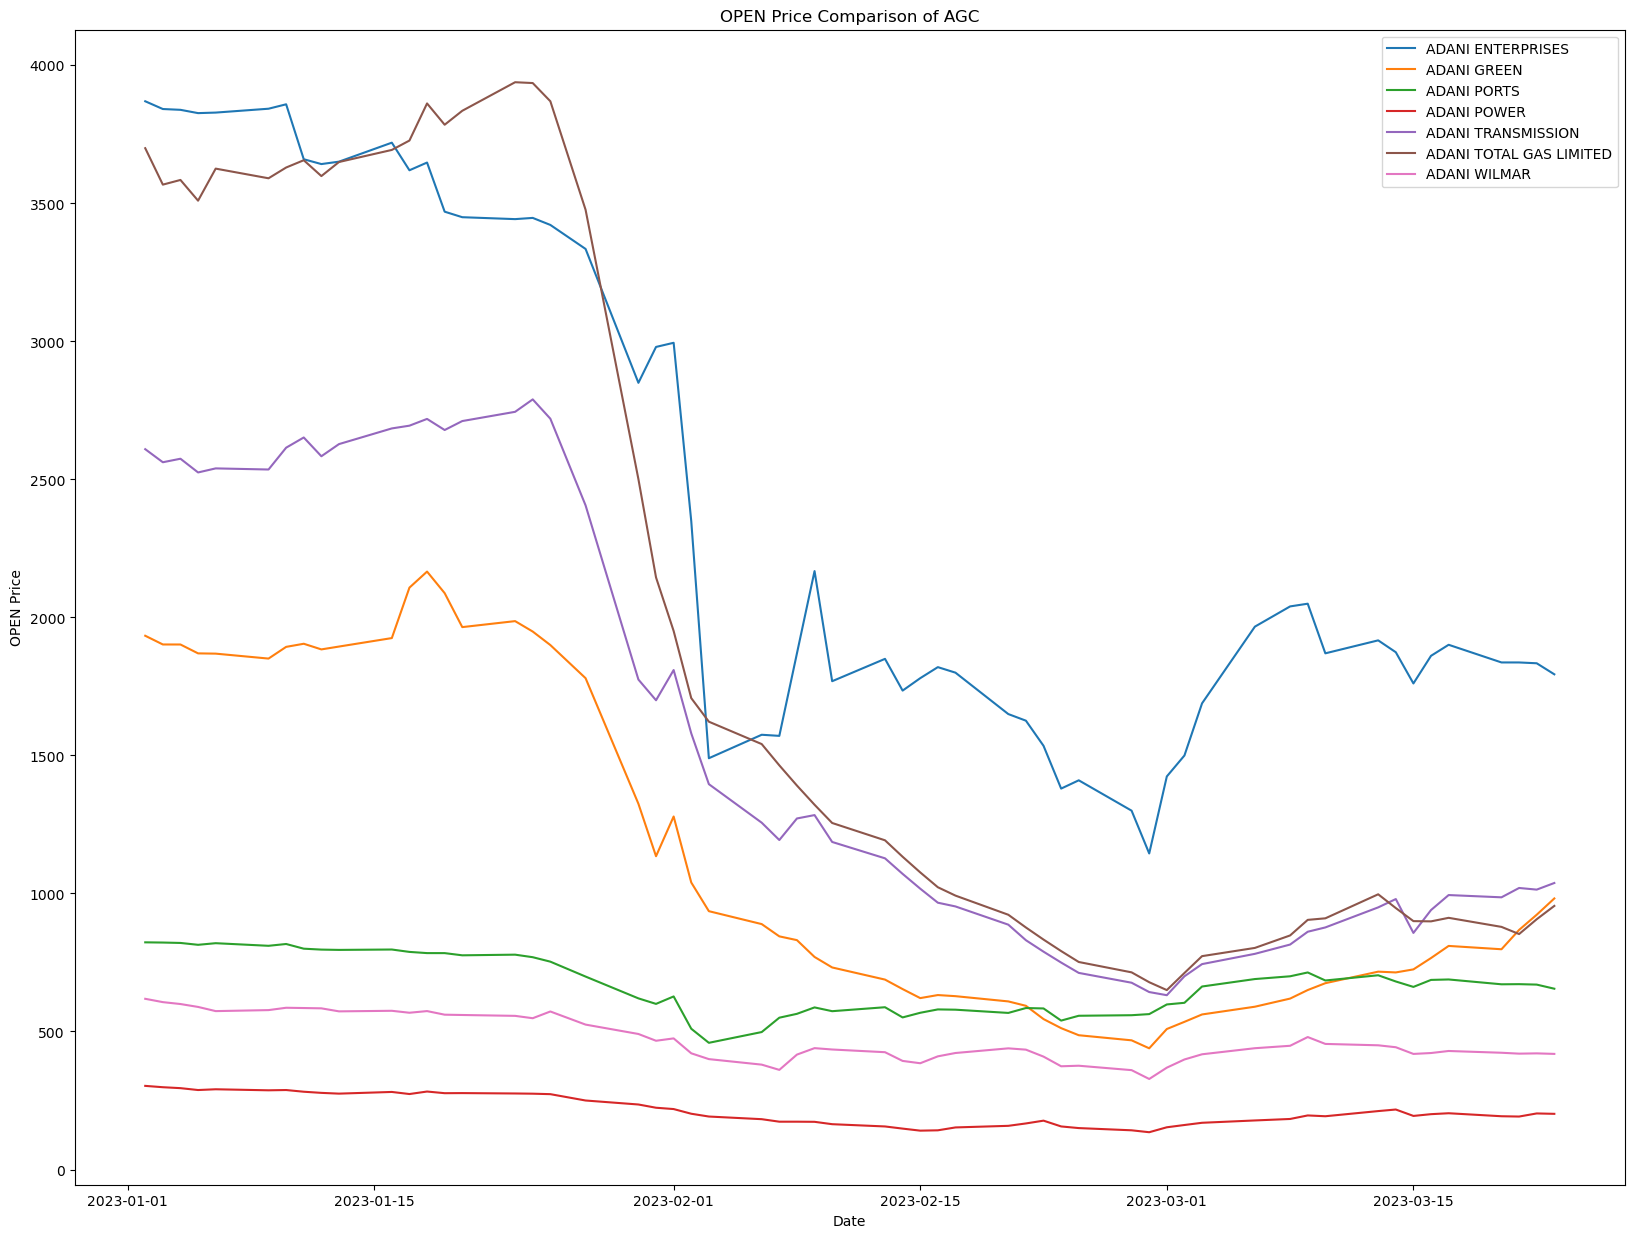

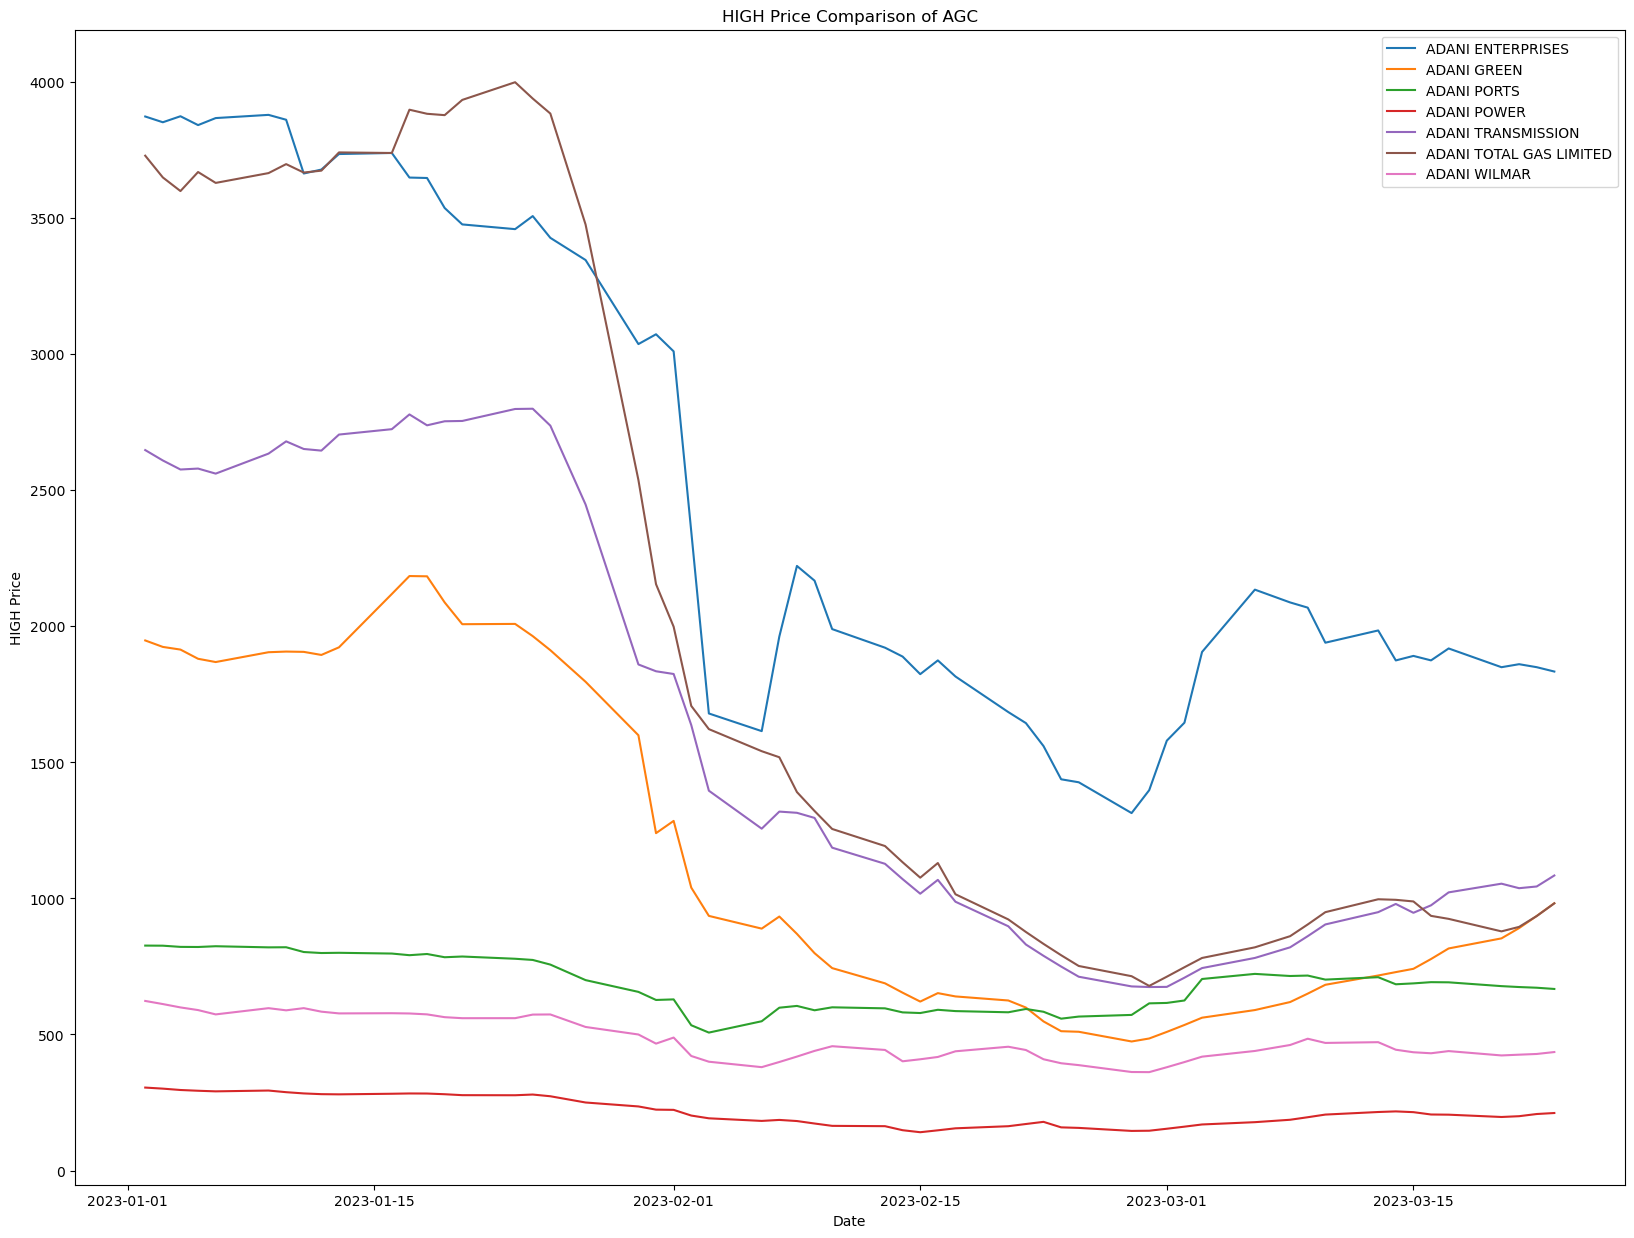

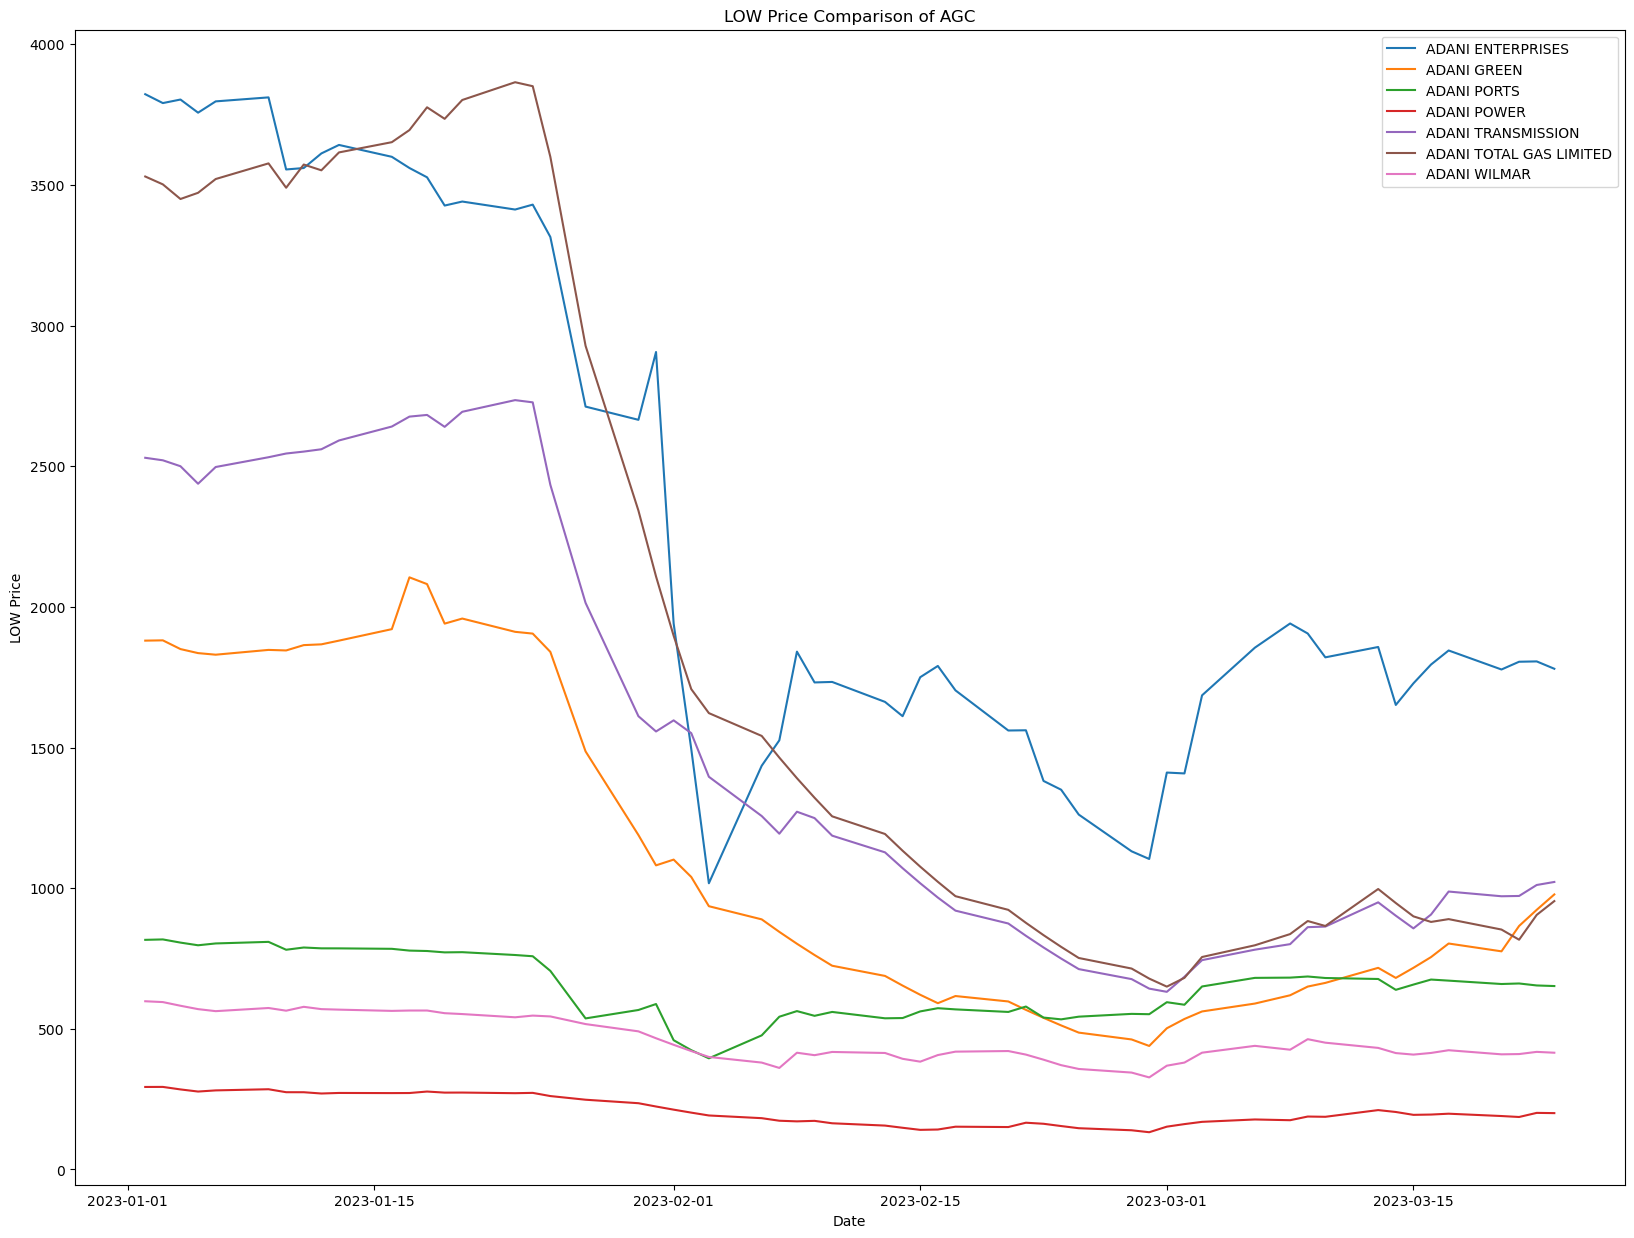

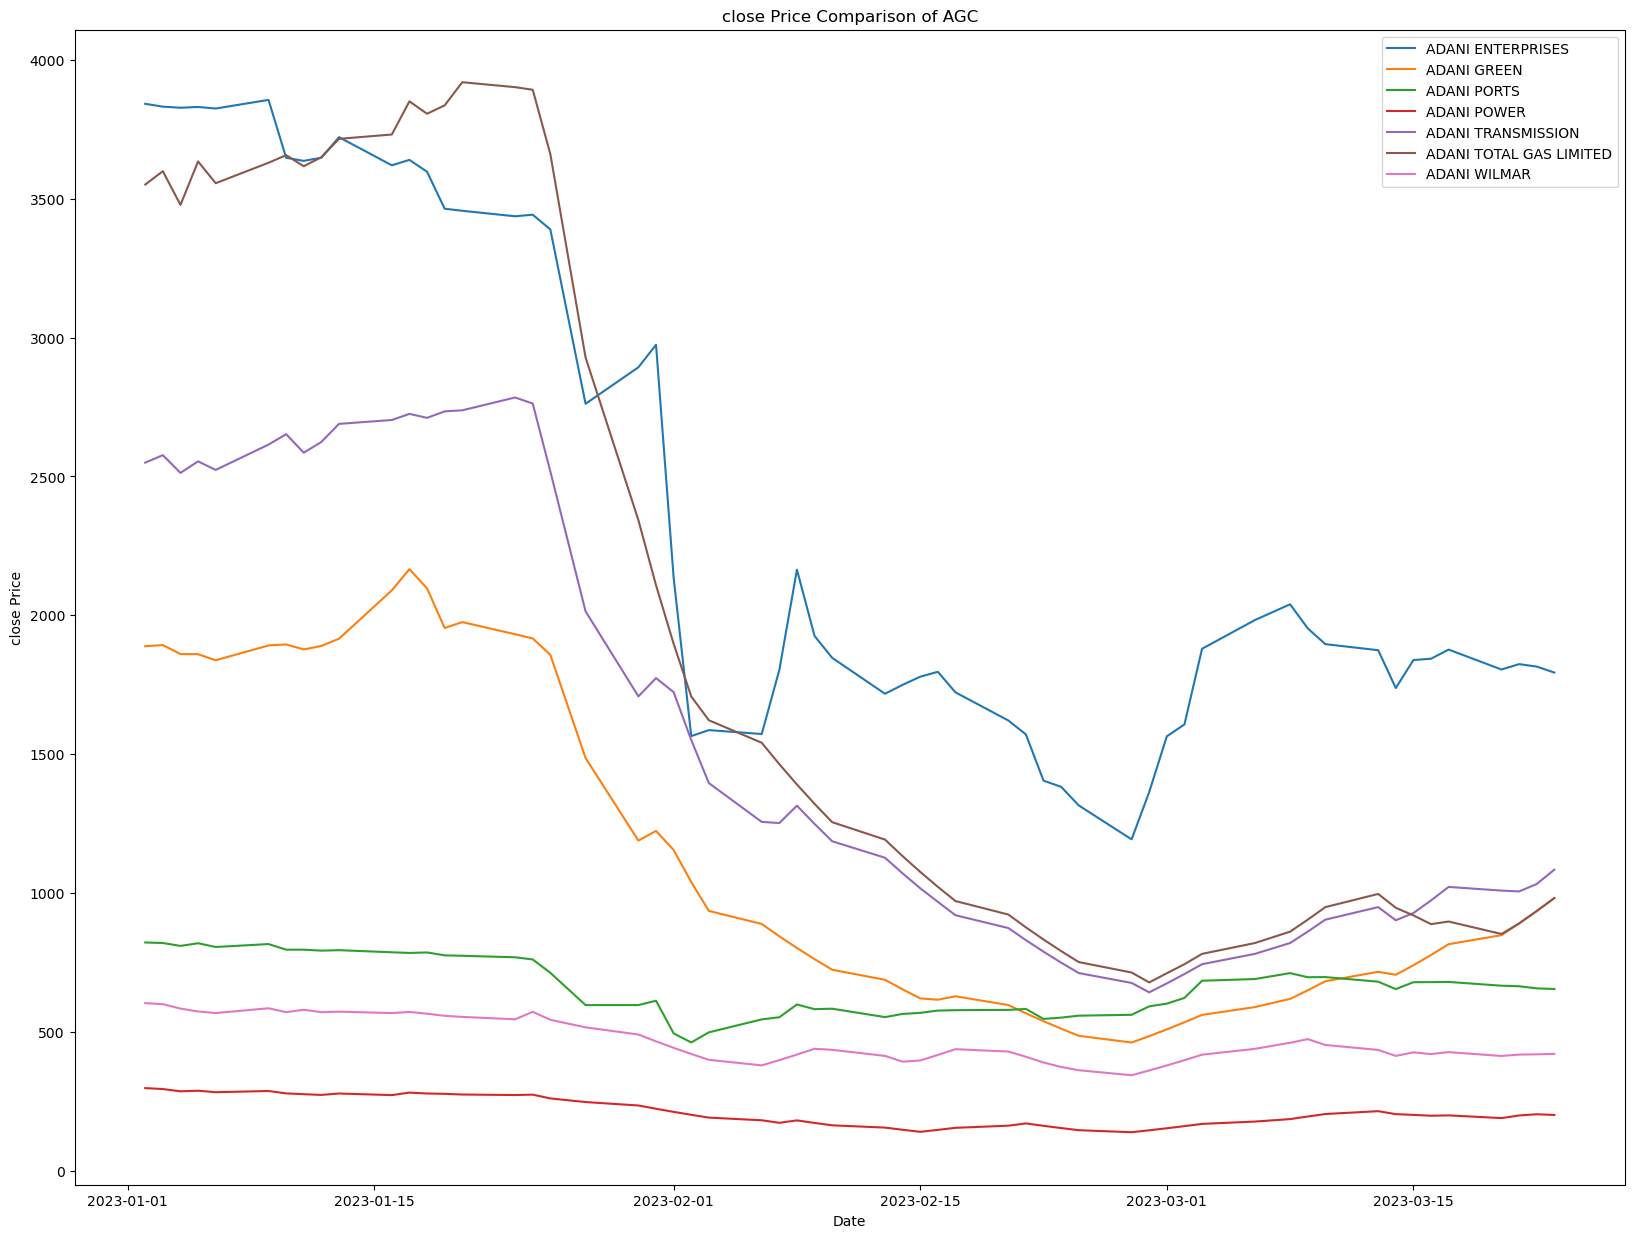

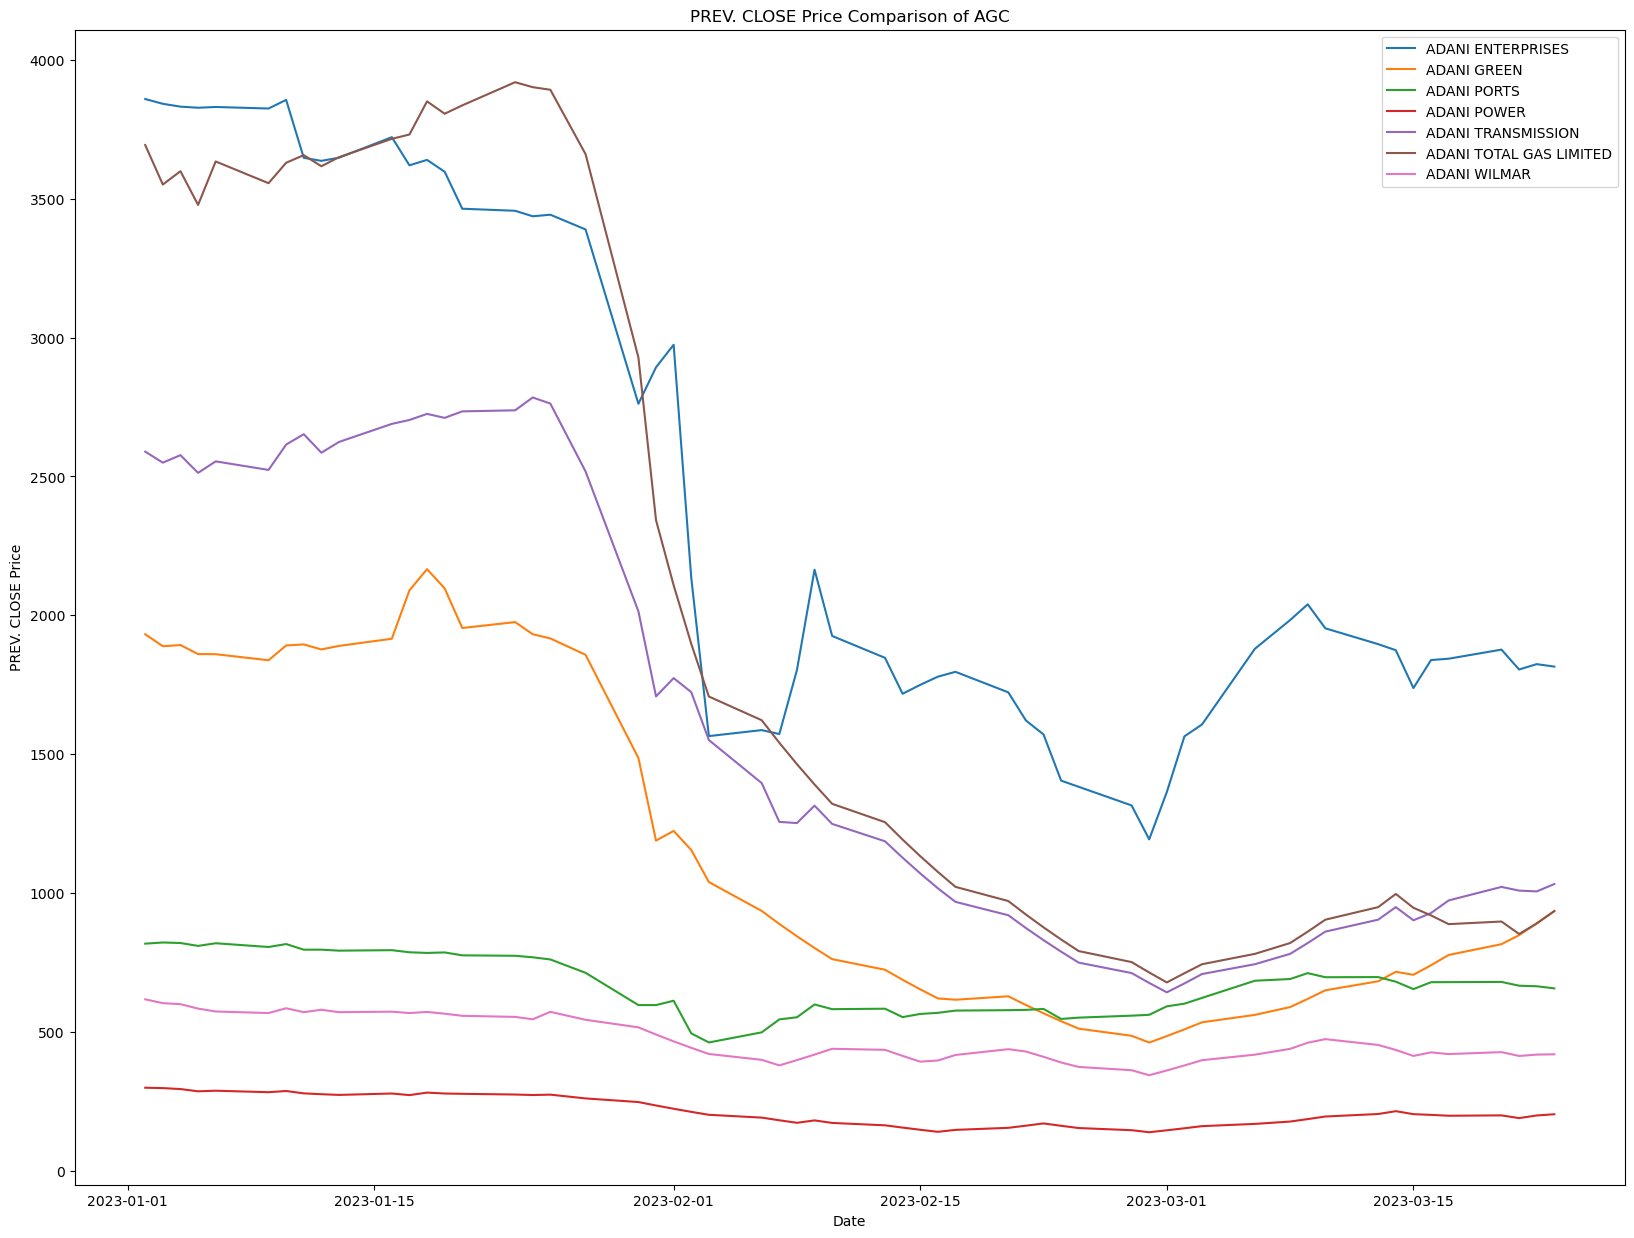

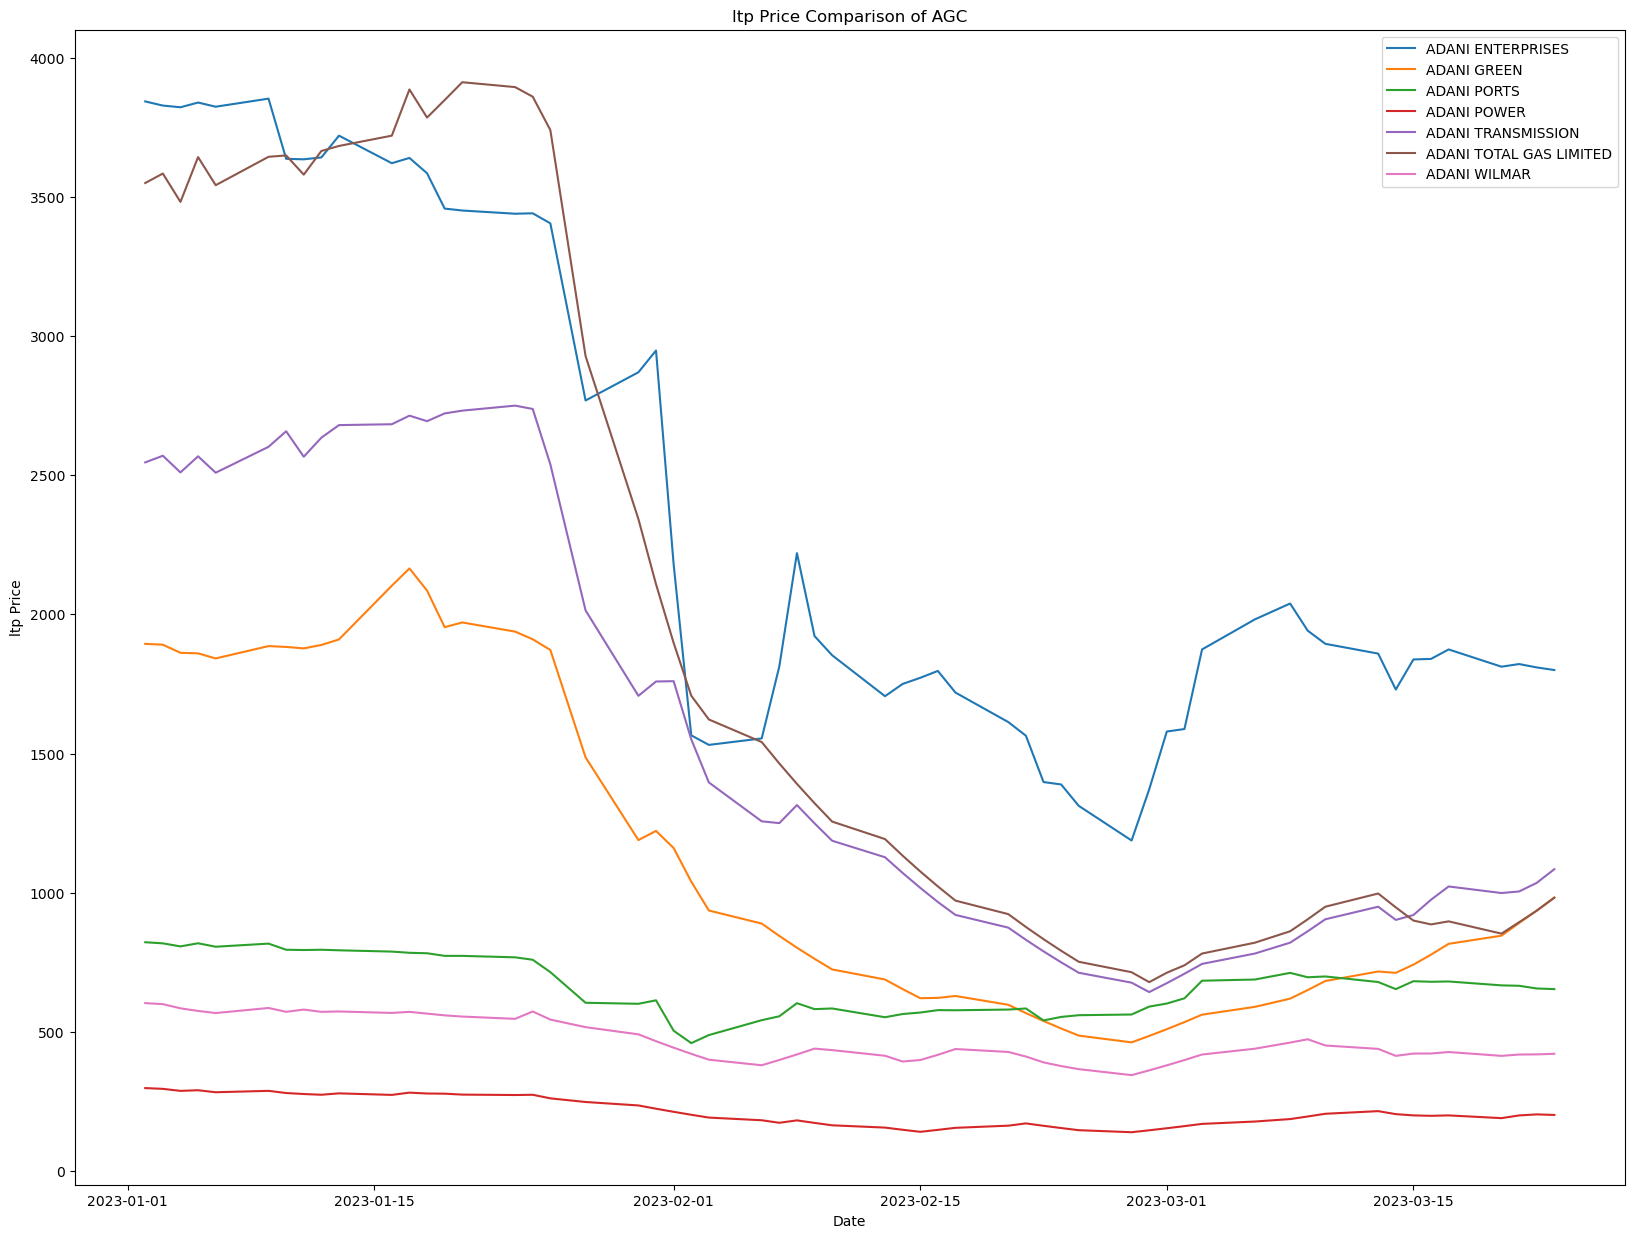

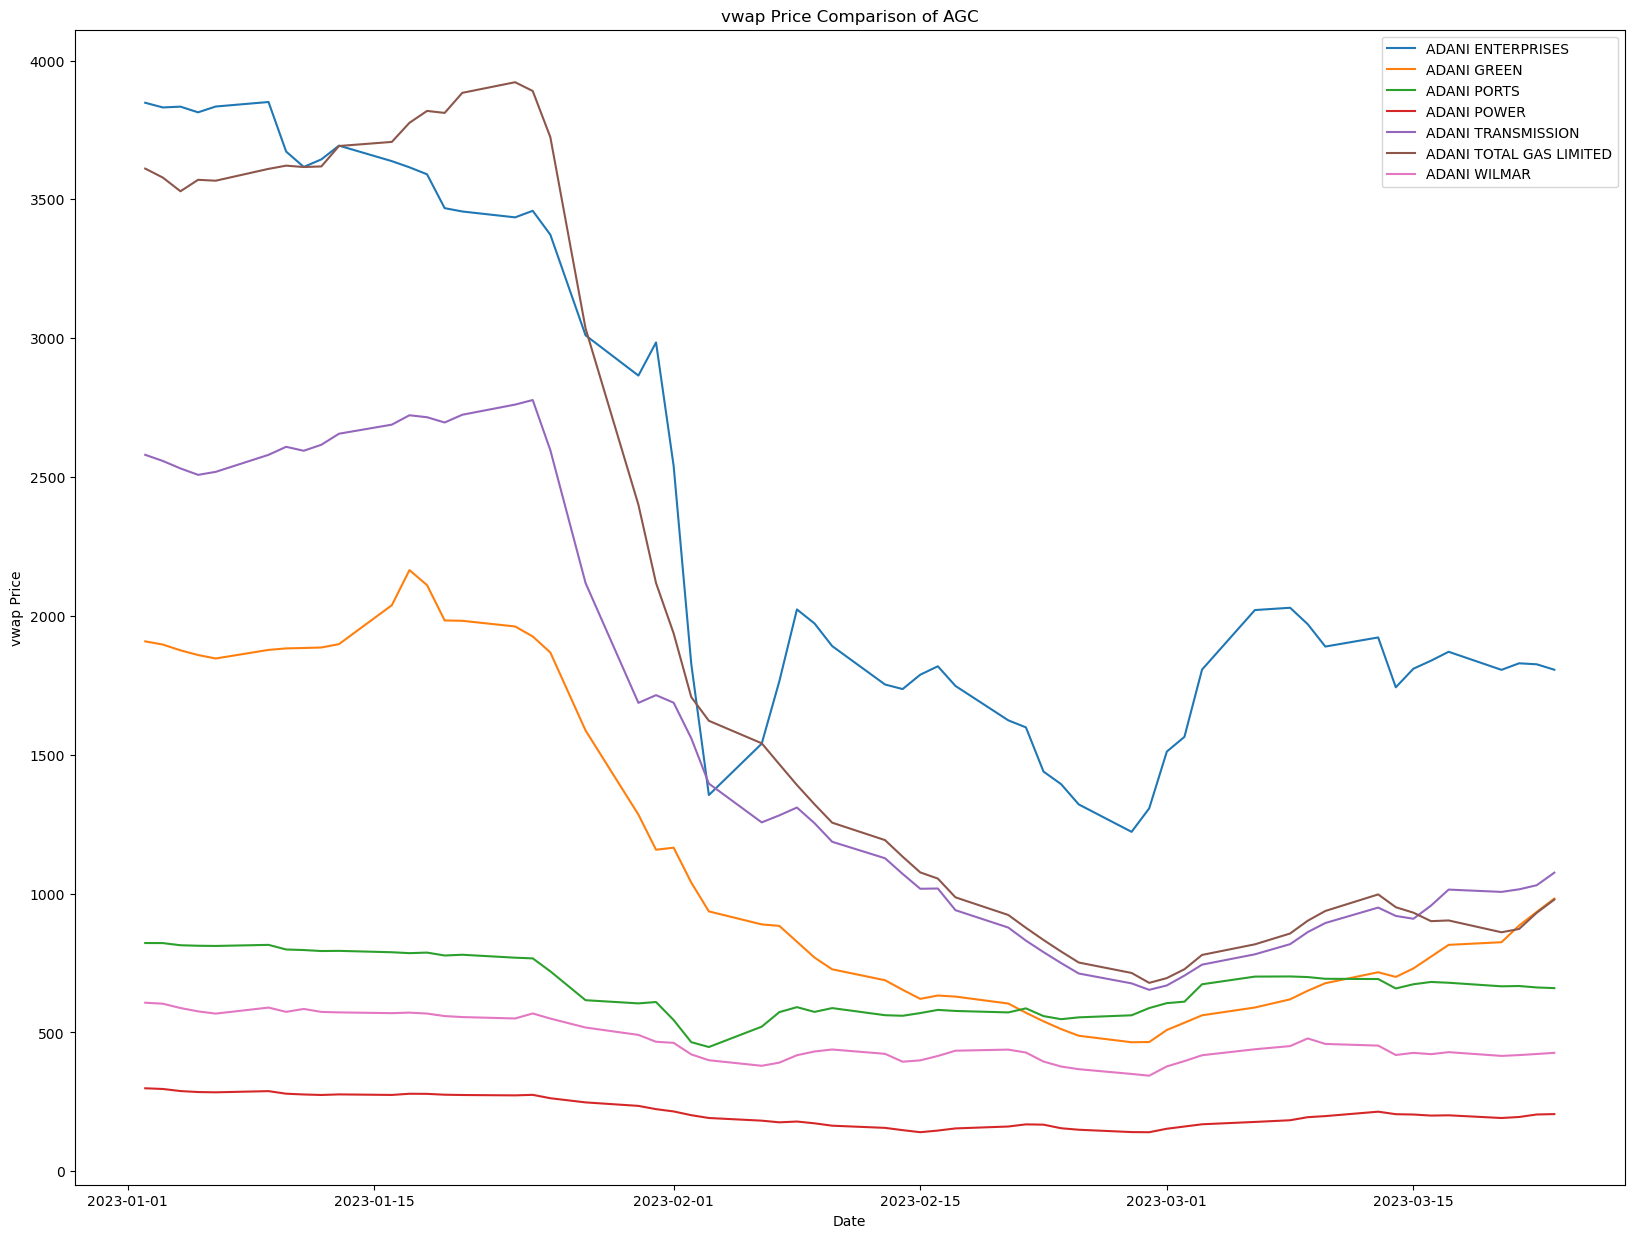

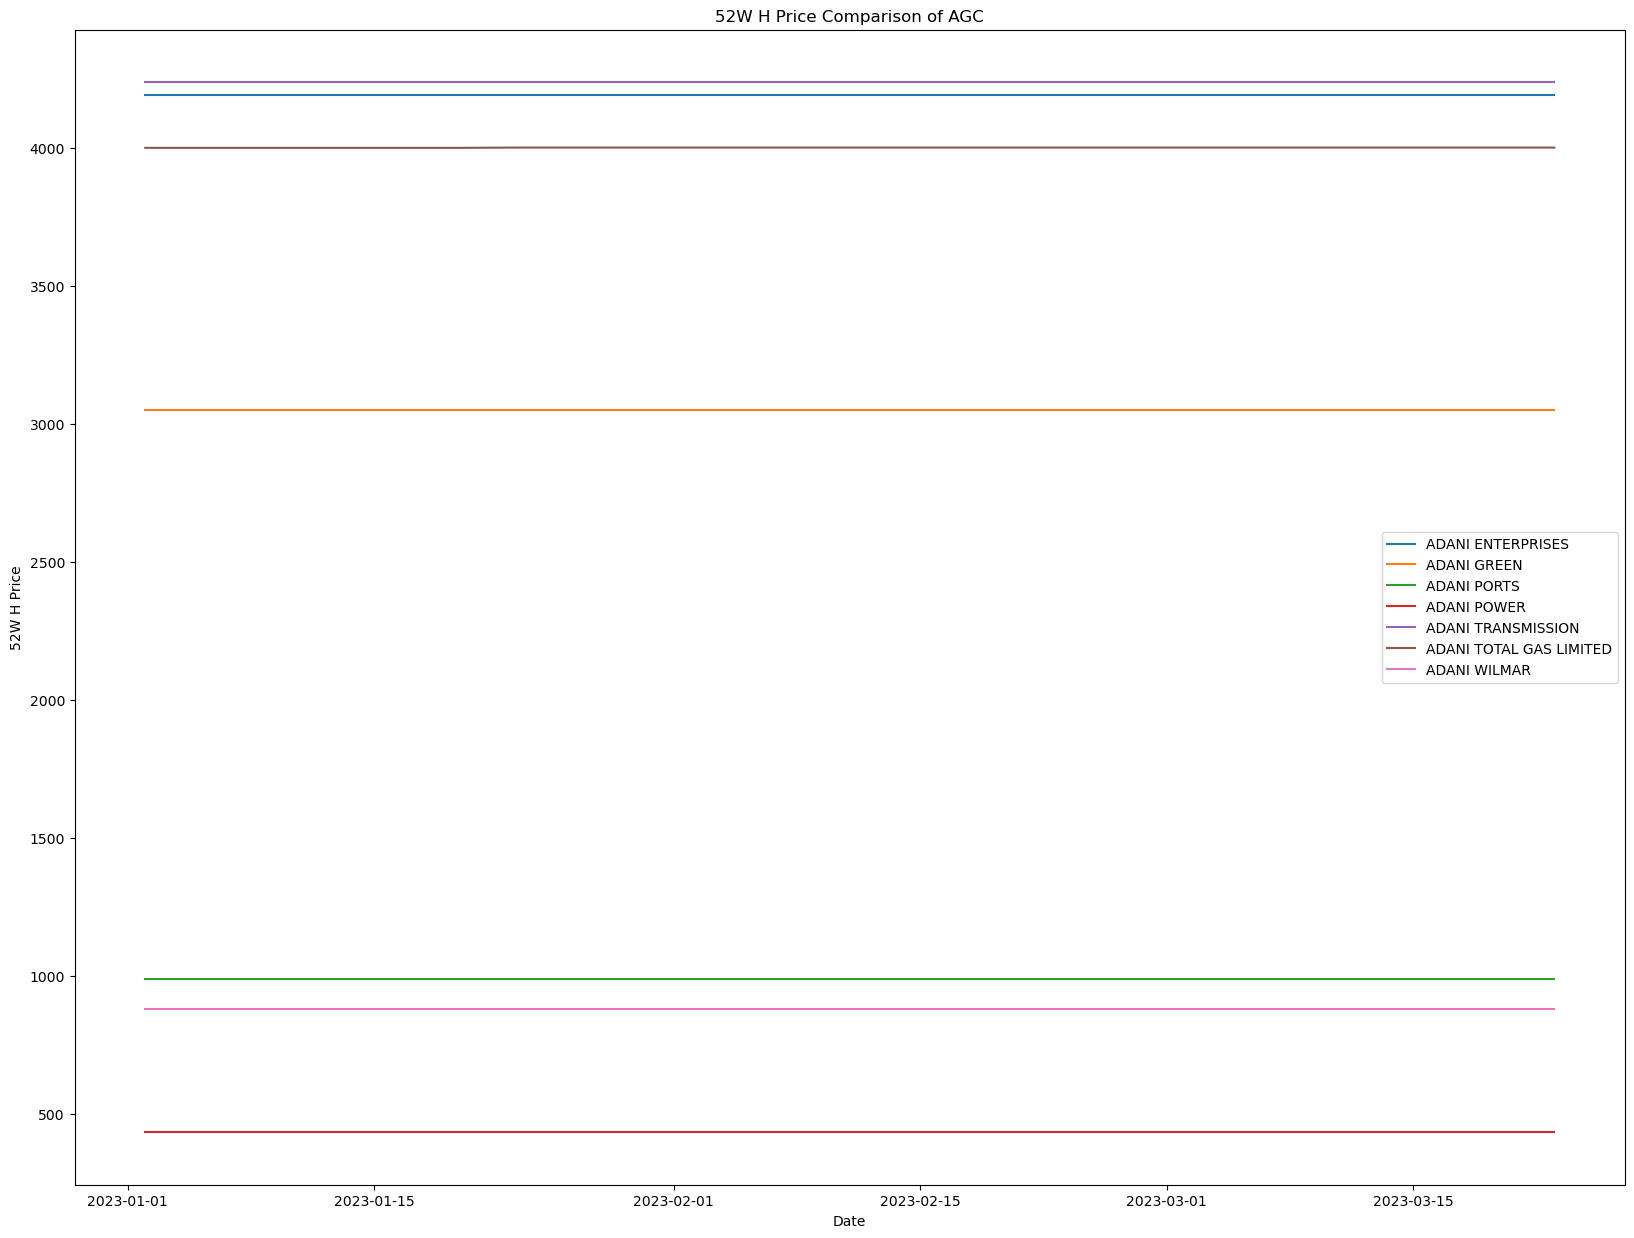

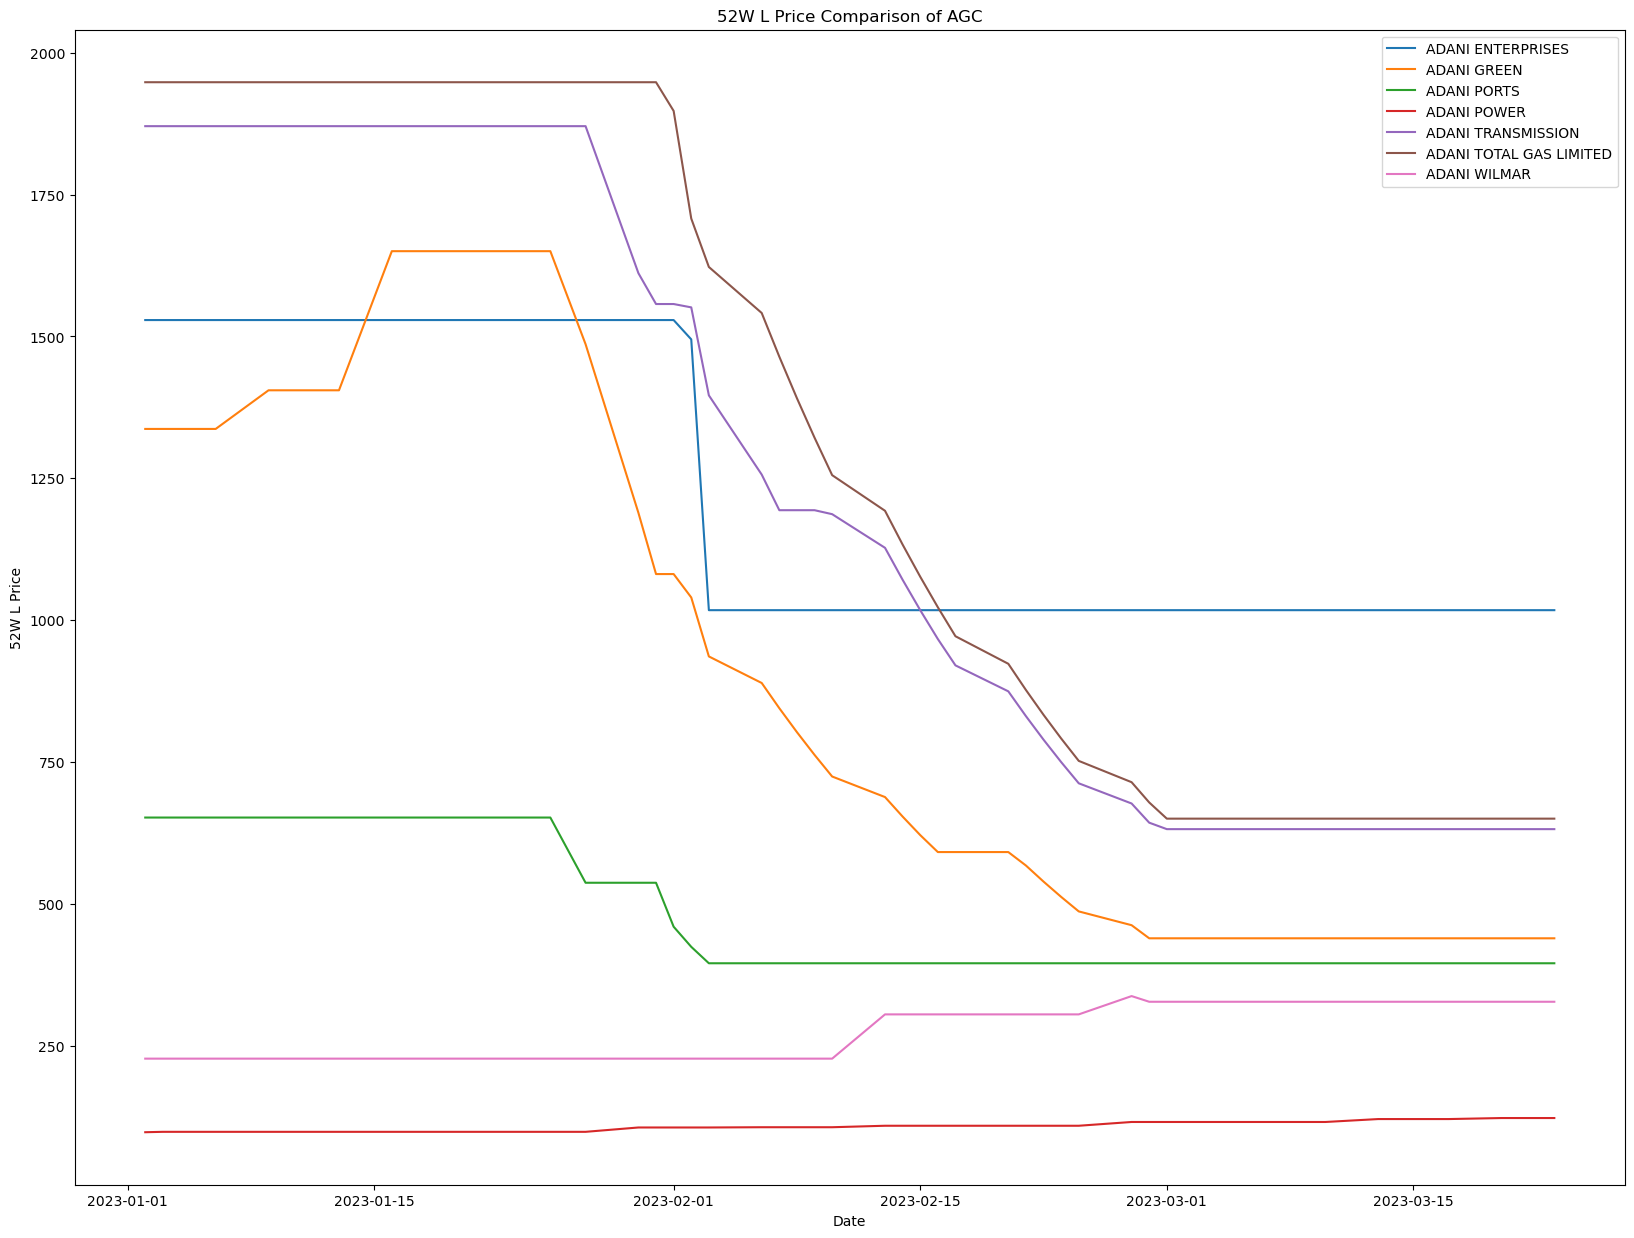

In [54]:
for p in plist:
    compare(p)

If this was helpful, please Upvote :D